# Start Pooling

In [50]:
#import general packages
import numpy as np
import dill
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#import climada stuff
from climada.entity.impact_funcs import trop_cyclone, impact_func_set
from climada.util.api_client import Client
from climada.engine import ImpactCalc

%load_ext autoreload
%autoreload 2
import exposures as ex
import n_fct_t_rl_thm_ll as bond_fct
import grider as grd
import impact as cimp
import bound_prot_dam as bpd
import prem_ibrd as prib
import haz_int_grd as hig
import set_nominal as snom
import calc_premium as cp
import simulate_bond as sb
import alt_pay_opt as apo
import simulate_multi_cty_bond as smcb
client = Client()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define Countries and Variables for Cat Bond Development

In [51]:
#choose storm basin to load
#The STORM basins are: 'EP','NA','NI','SI','SP','WP'
#basins = ['NA','SI']

#choose country
country_1 = 174
country_2 = 659
countries = [str(country_1), str(country_2)]

#minimum damage to be protected per grid cell calculated using return period
lower_rp = 100

#number of simulated years
r = 10000
#number of Monte-Carlo simulations
num_simulations = 10001 - 3


#set risk free rate, either single value or array
rf_rate = 0.01

#set sharpe ratio to beat
requ_sharpe_ratio = 0.5

#set the maximum amount to be protected
prot_share_arr = np.arange(0.01, 0.21, 0.01) #protected share of total exposure

## Designe Single Country Bonds
### Define Cat Bond function

### Design Cat Bond for Country 1

STORM basin of country:  SI
----------------------Loading Exposure----------------------


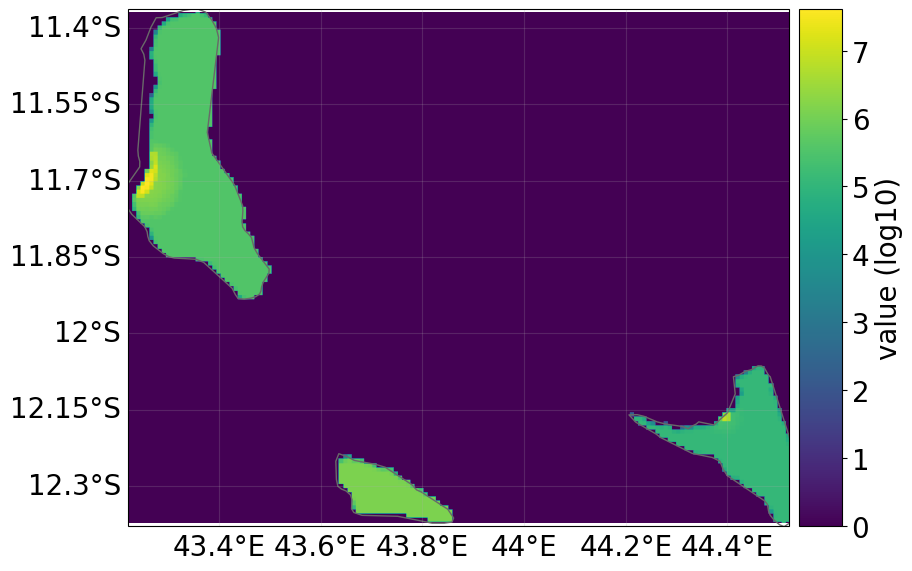

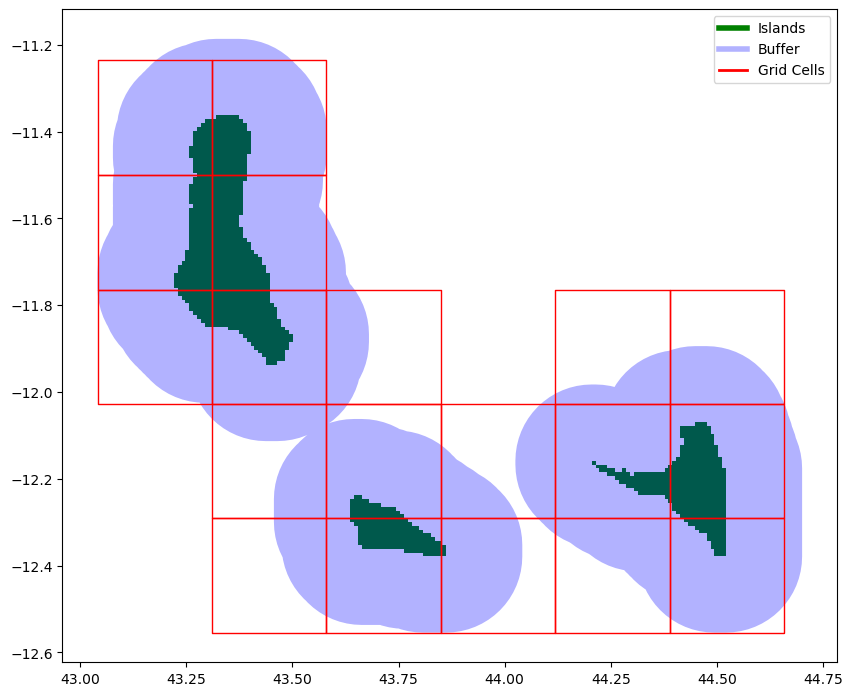

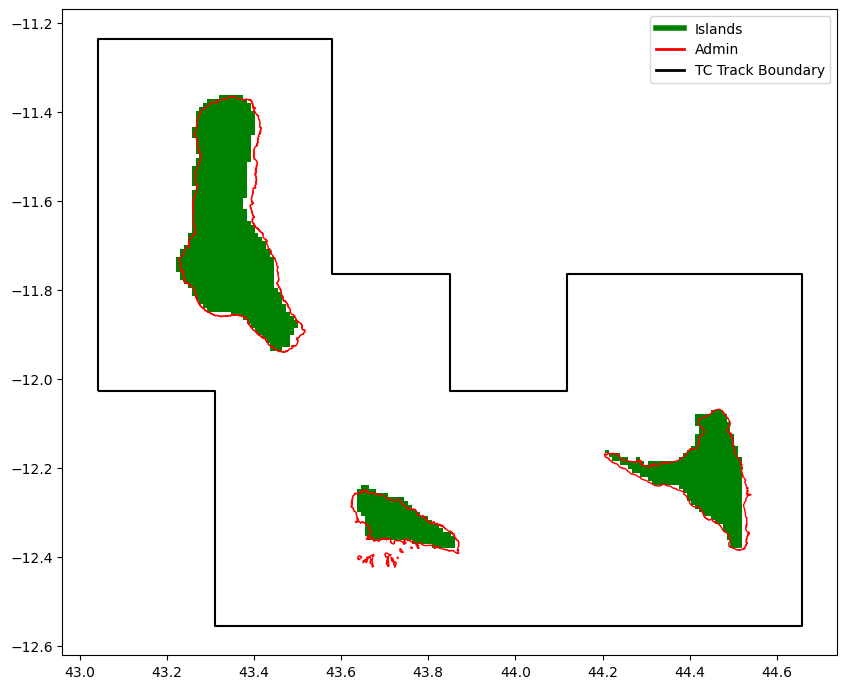

----------------------Loading Hazard----------------------
Number of tracks in SI basin: 229


c:\Users\kaibe\Documents\ETH_Zurich\Thesis\Code\impact.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


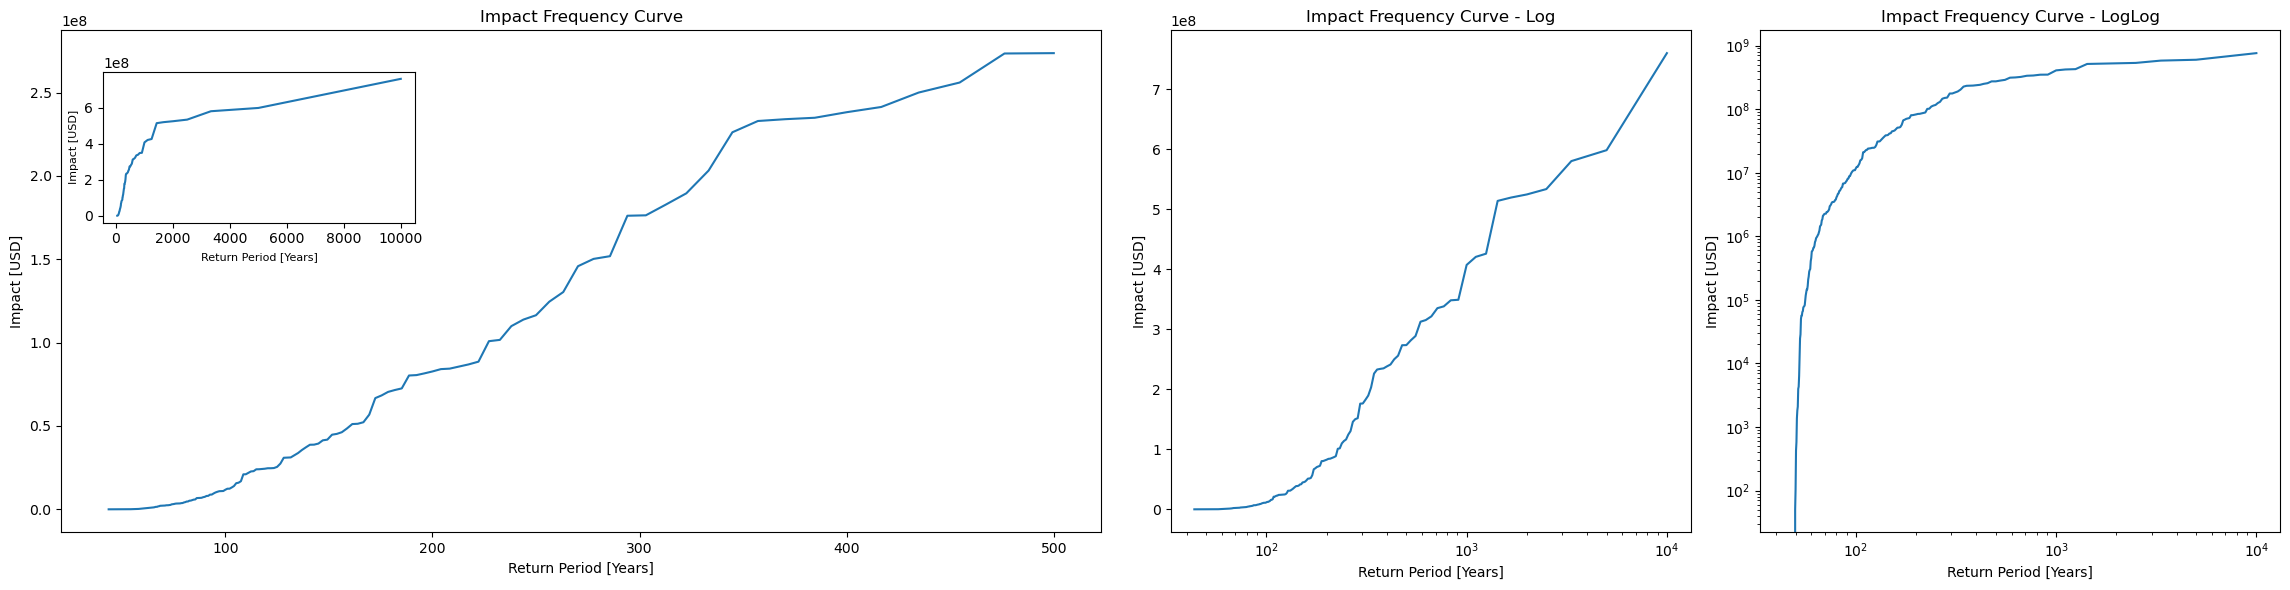

The principal of the cat bond is: 12250391.966109099
Principal as percentage of GDP: 0.01
{0: (30.0, 45.0), 1: (30.0, 45.00000713533815), 2: (30.0, 45.0)}


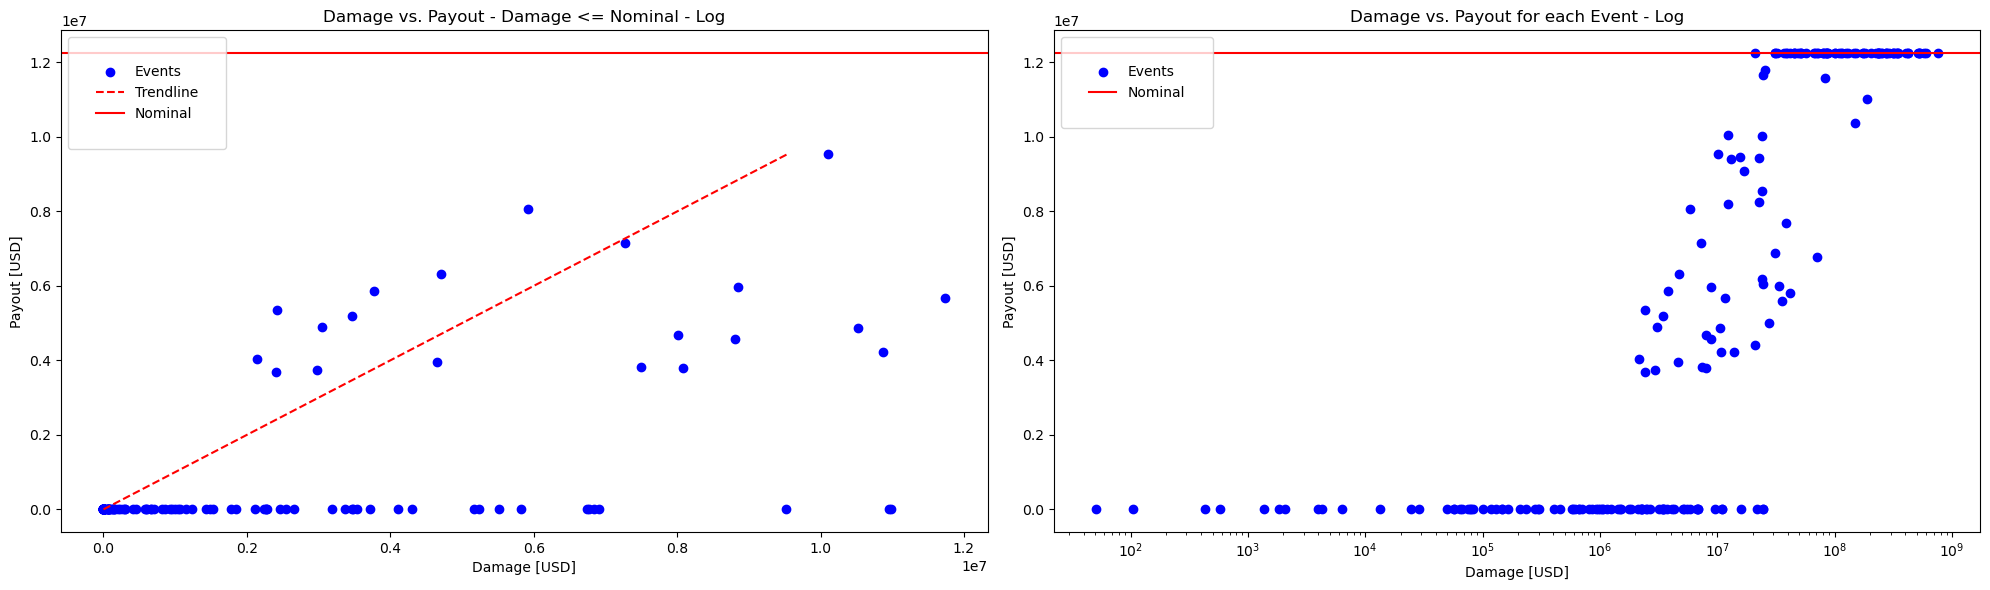

Expected Loss = 0.009488831180886866
Attachment Probability = 0.011402280456091218
The principal of the cat bond is: 24500783.932218198
Principal as percentage of GDP: 0.02
{0: (30.093122509303697, 53.838394945601756), 1: (30.0, 45.00000713533815), 2: (30.0, 45.0)}


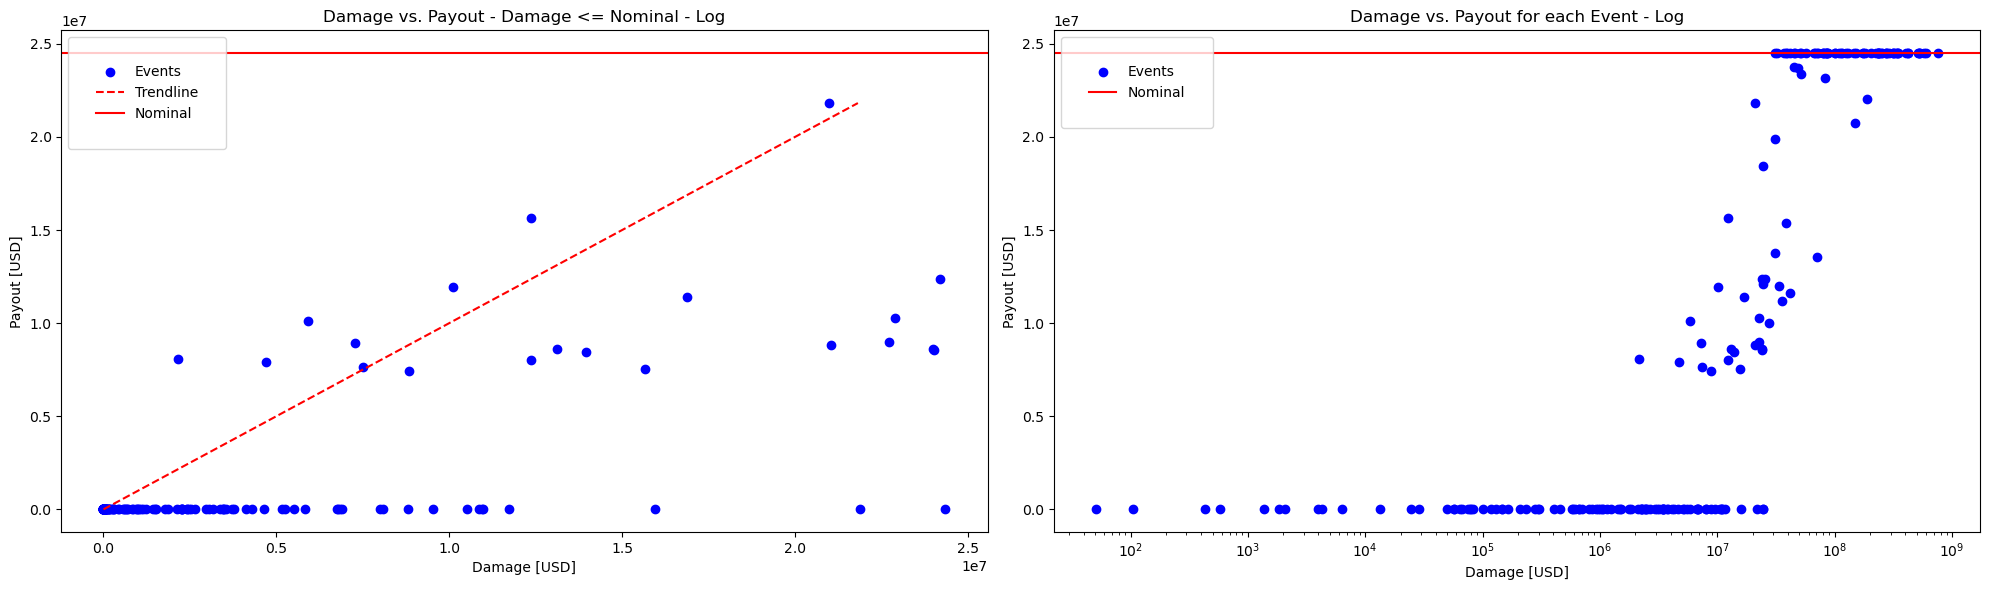

Expected Loss = 0.008494530058718868
Attachment Probability = 0.010202040408081616
The principal of the cat bond is: 36751175.8983273
Principal as percentage of GDP: 0.03
{0: (31.56304015338586, 59.55713230789854), 1: (30.0, 45.00000713533815), 2: (30.0, 45.0)}


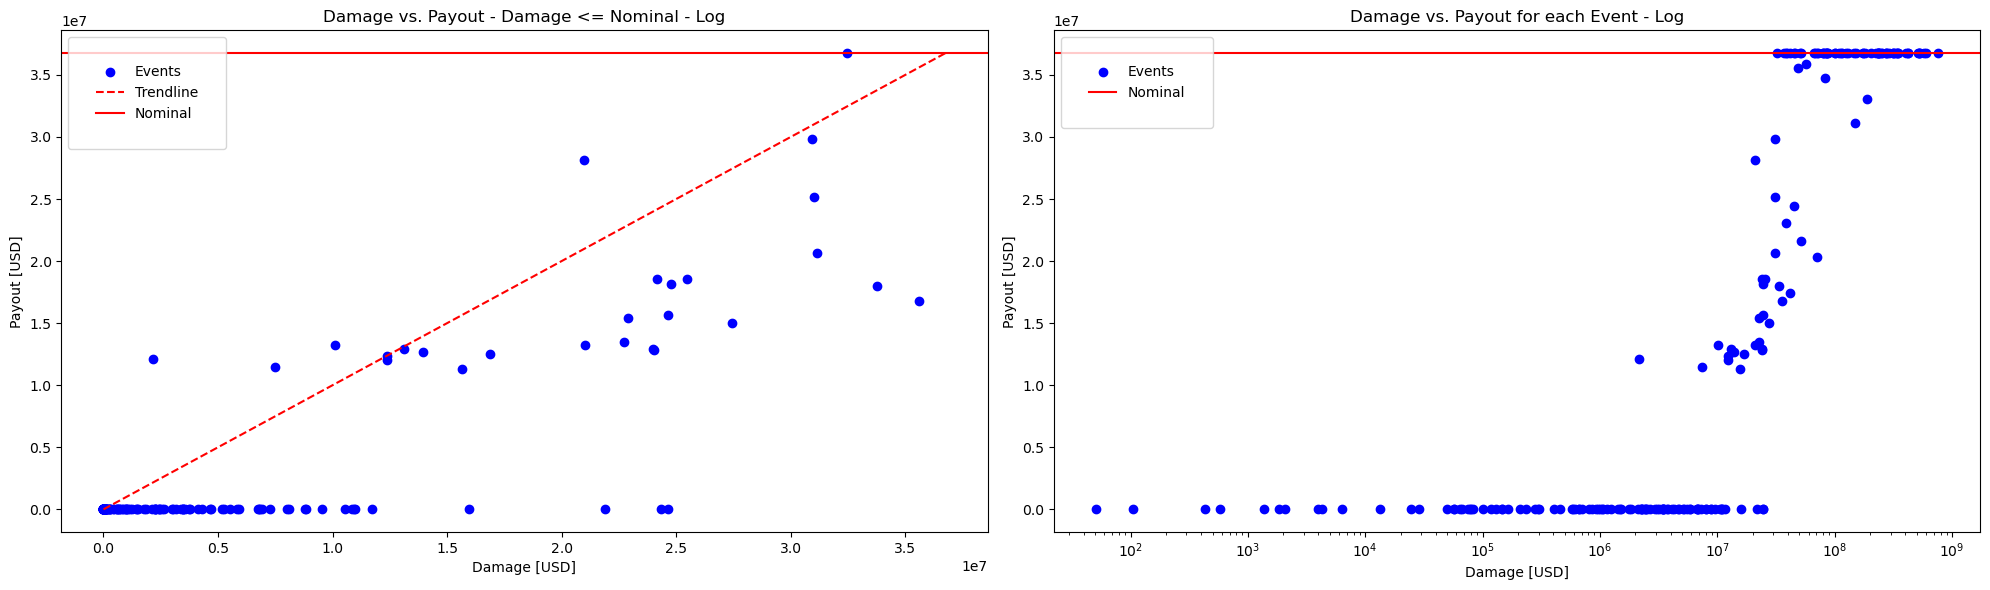

Expected Loss = 0.008152629164915215
Attachment Probability = 0.009801960392078415
The principal of the cat bond is: 49001567.864436395
Principal as percentage of GDP: 0.04
{0: (33.39788633804507, 63.08434964046566), 1: (30.0, 45.00000713533815), 2: (30.0, 45.0)}


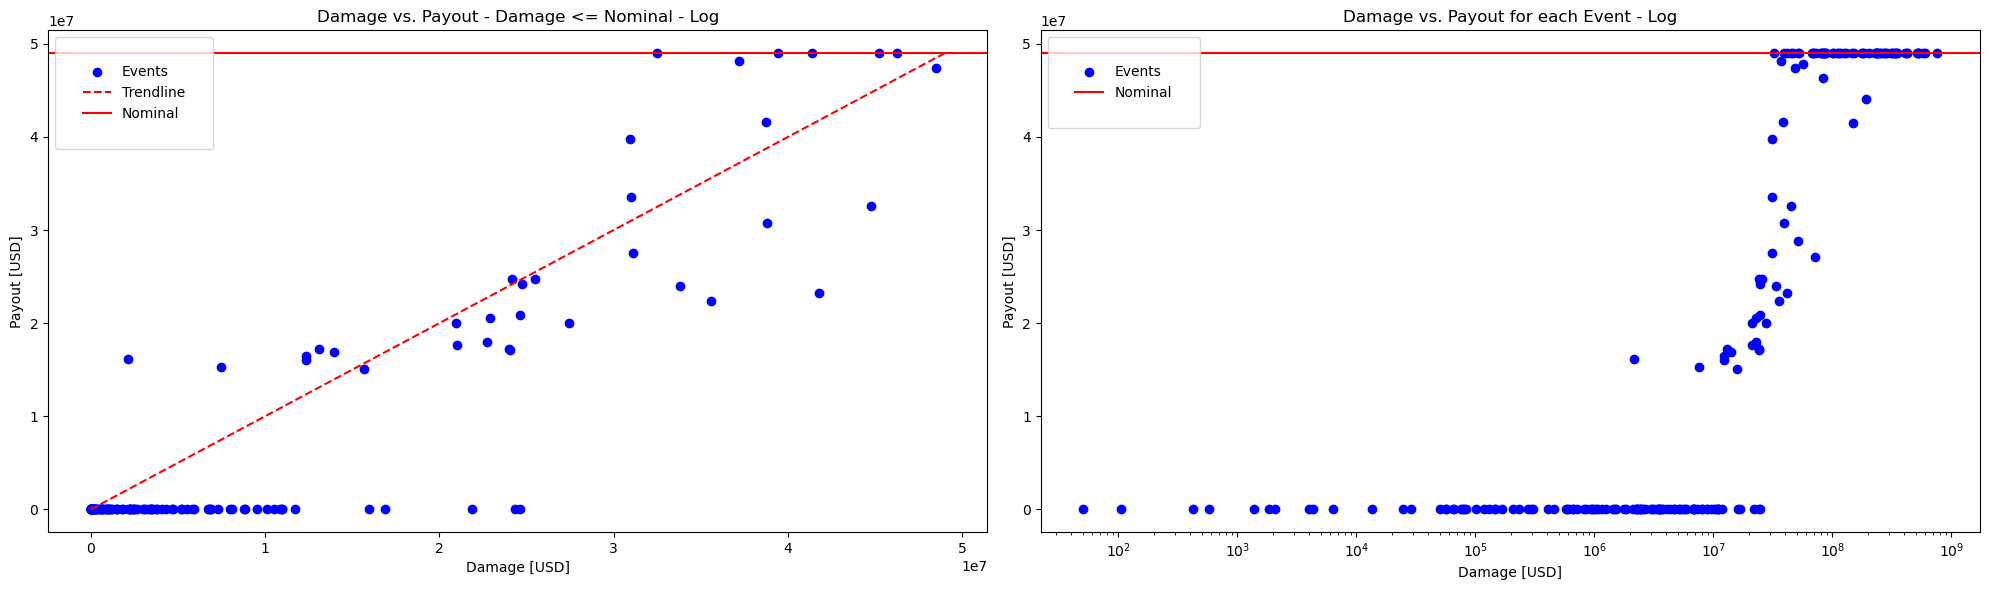

Expected Loss = 0.008029965092475196
Attachment Probability = 0.009601920384076815
The principal of the cat bond is: 61251959.8305455
Principal as percentage of GDP: 0.05
{0: (35.401104136372524, 63.312291608026456), 1: (30.0, 45.00000713533815), 2: (30.0, 45.0)}


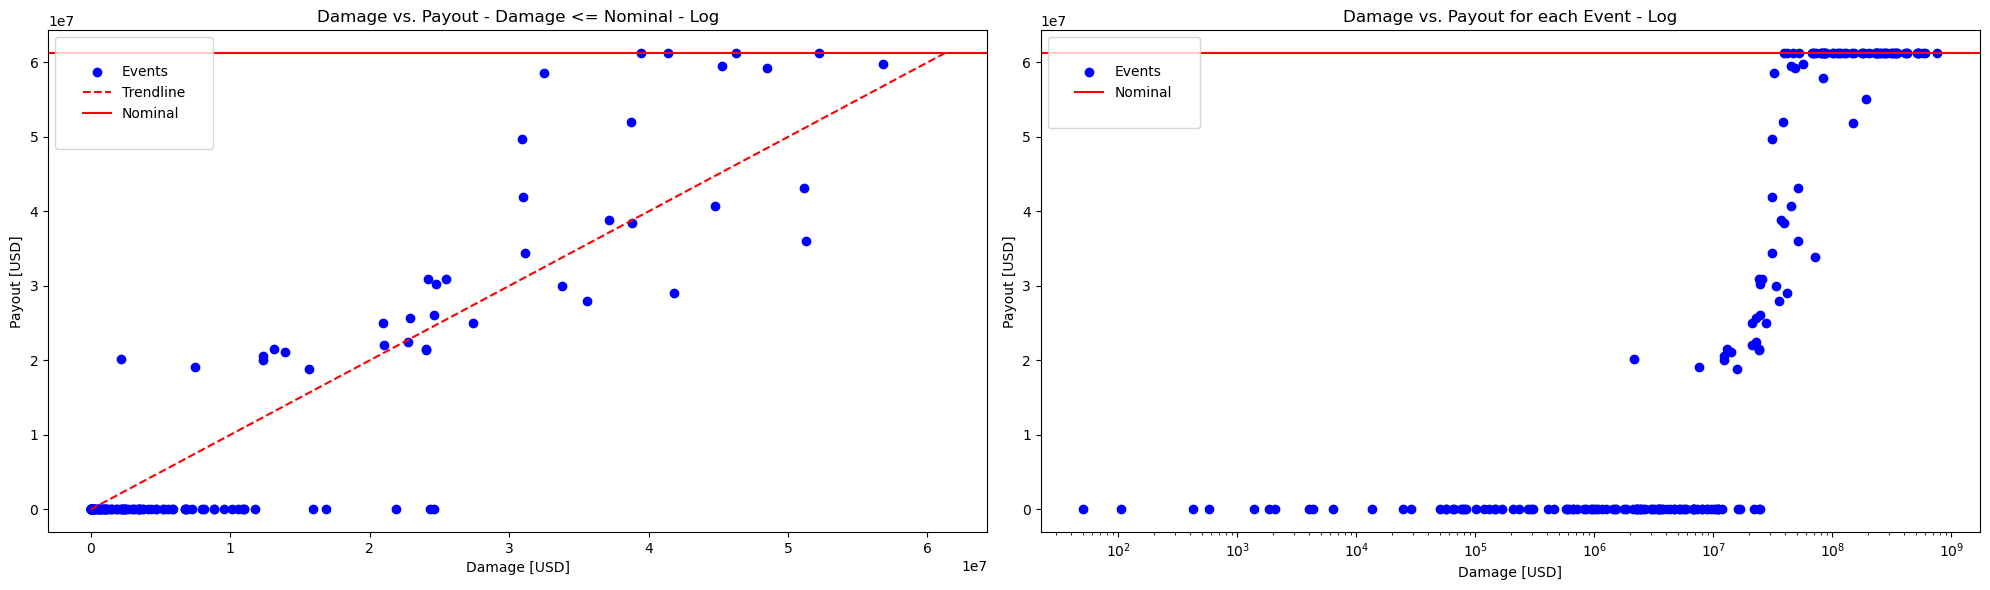

Expected Loss = 0.007958293896942676
Attachment Probability = 0.009601920384076815
The principal of the cat bond is: 73502351.7966546
Principal as percentage of GDP: 0.06
{0: (38.07341883694975, 63.961791816575015), 1: (30.0, 45.00000713533815), 2: (30.007105311616456, 46.393871661090714)}


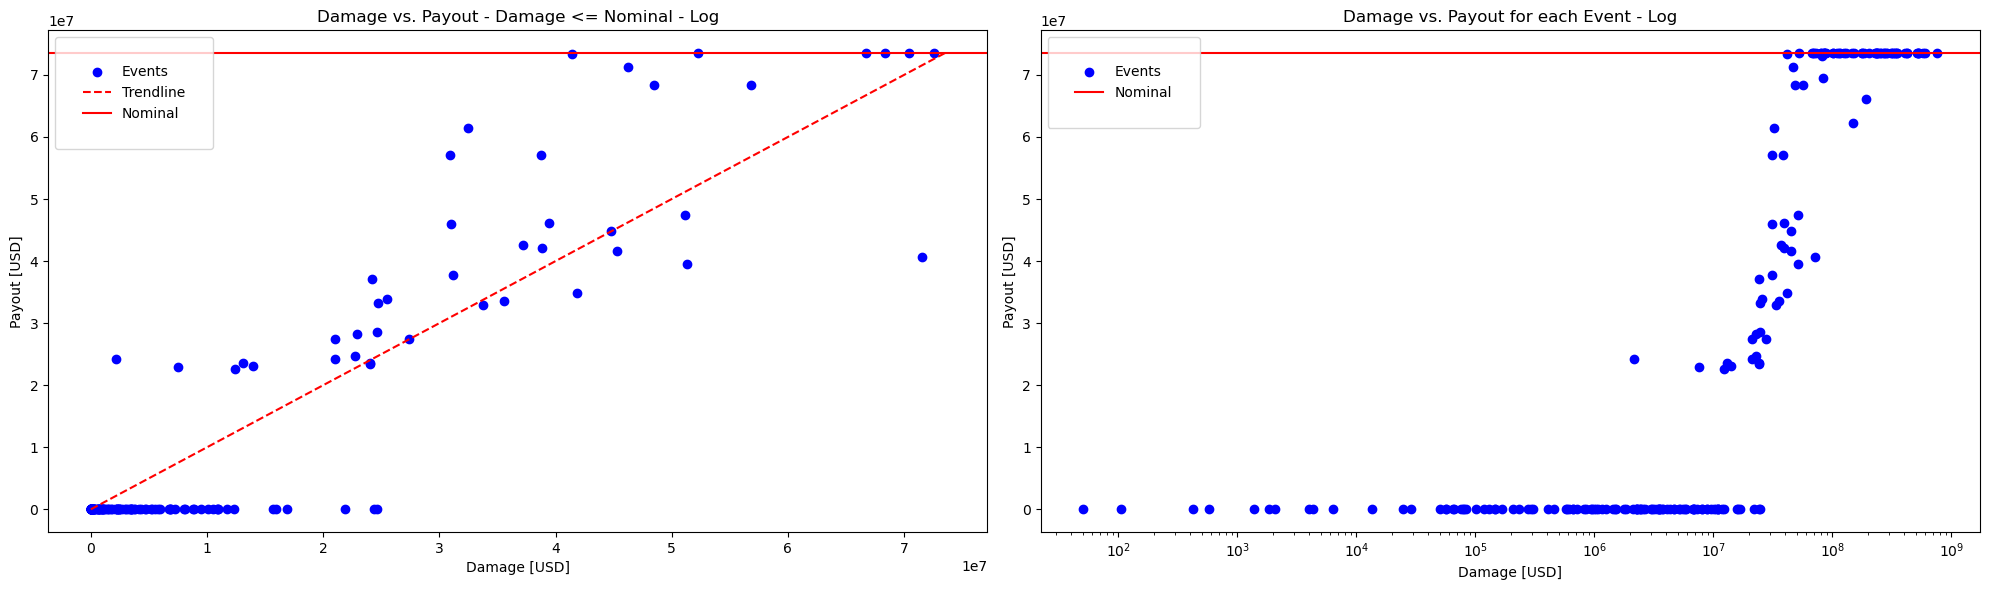

Expected Loss = 0.007695639236785101
Attachment Probability = 0.009401880376075216
The principal of the cat bond is: 85752743.7627637
Principal as percentage of GDP: 0.06999999999999999
{0: (38.84547279038264, 63.886984775765754), 1: (30.0, 45.00000713533815), 2: (30.011830339183796, 49.004536501160395)}


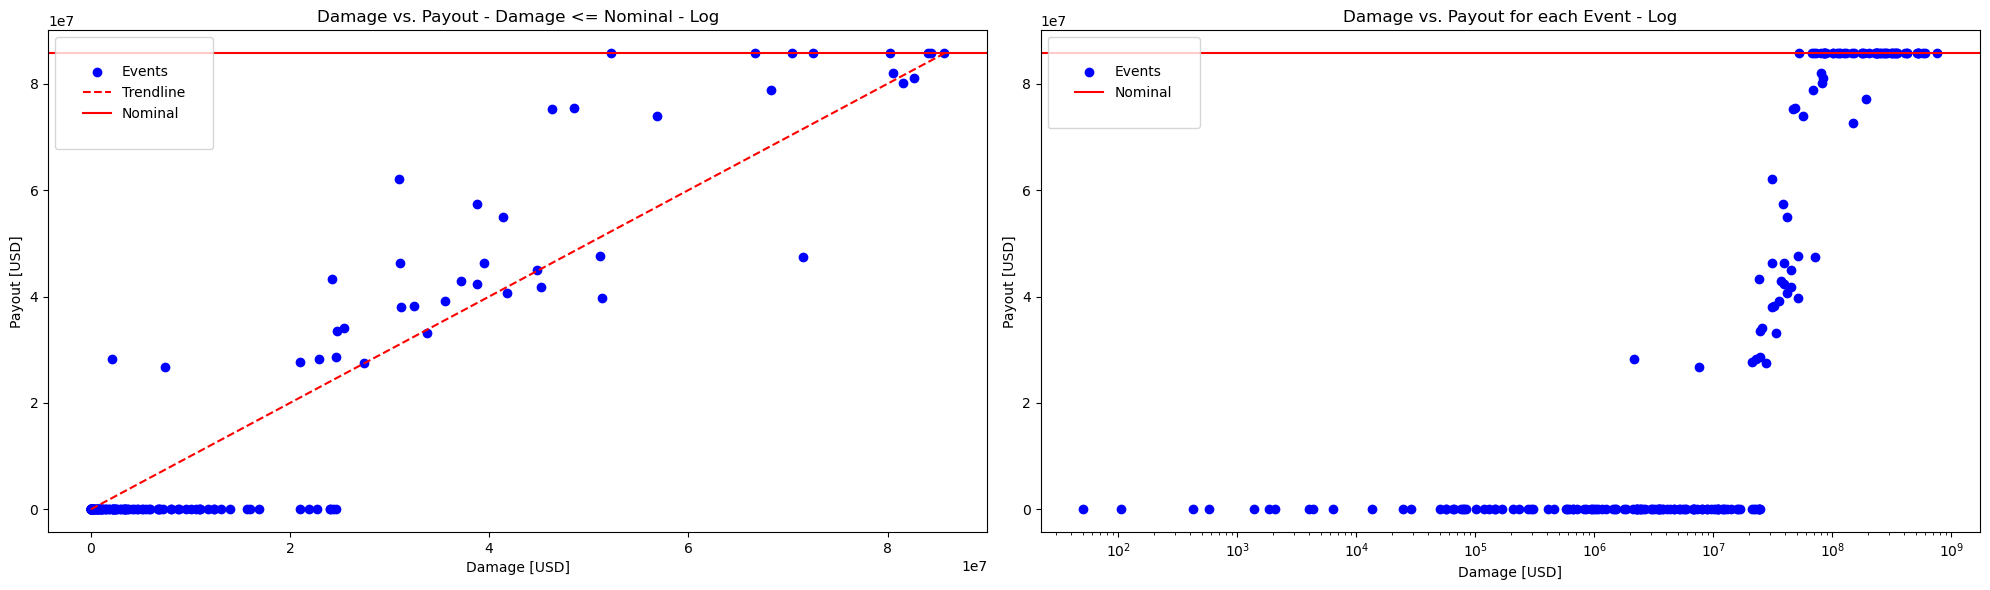

Expected Loss = 0.007228230820990504
Attachment Probability = 0.008701740348069614
The principal of the cat bond is: 98003135.72887279
Principal as percentage of GDP: 0.08
{0: (40.28734915461763, 63.883453957547324), 1: (30.0, 45.00000713533815), 2: (30.856914504123463, 50.595750553842144)}


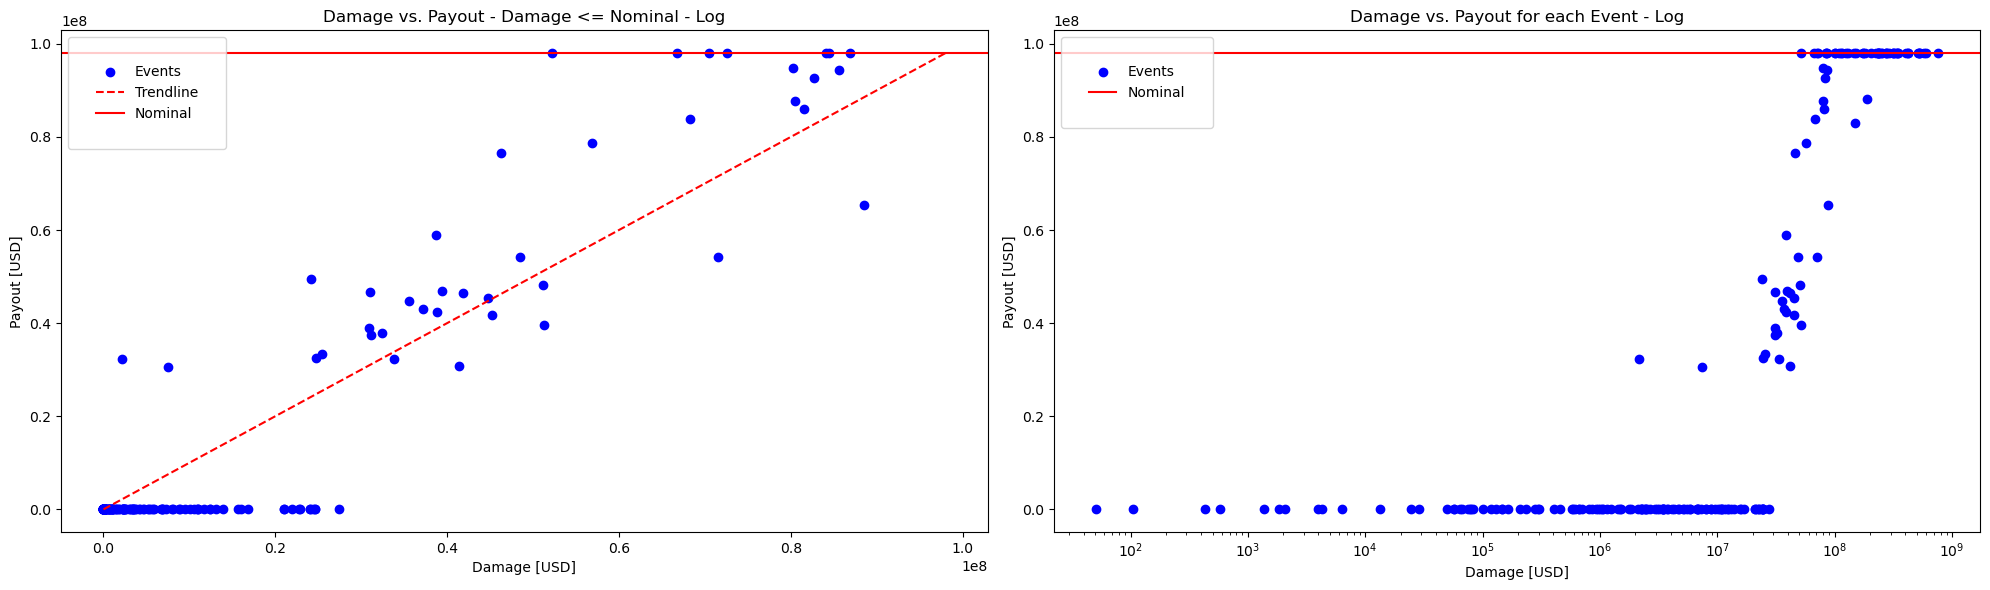

Expected Loss = 0.006838963795146917
Attachment Probability = 0.008301660332066413
The principal of the cat bond is: 110253527.69498189
Principal as percentage of GDP: 0.09
{0: (40.77314071140559, 64.43536753681154), 1: (30.0, 45.00000713533815), 2: (30.002016396141567, 53.906294992248604)}


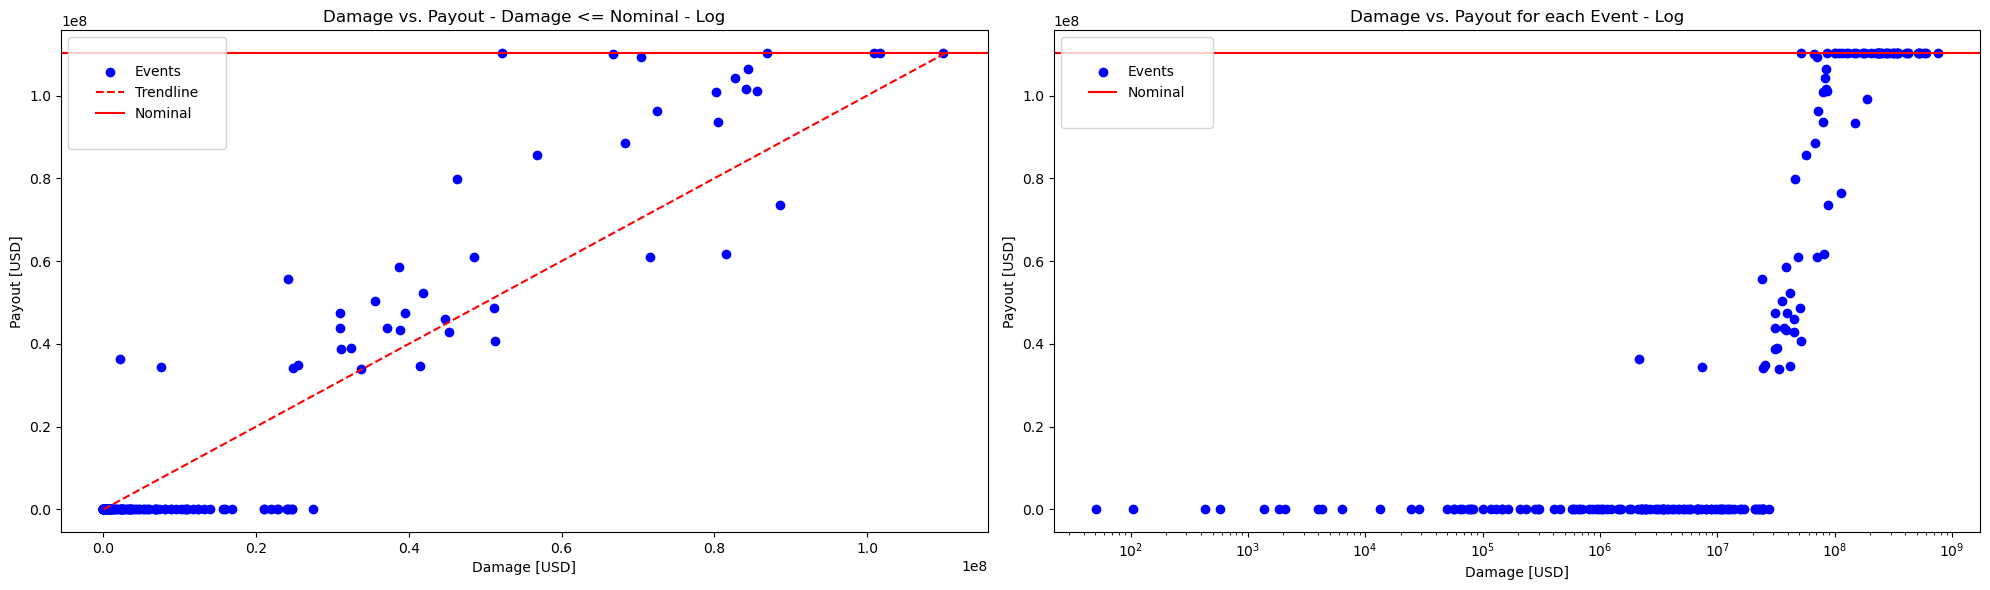

Expected Loss = 0.006669649391285369
Attachment Probability = 0.008301660332066413
The principal of the cat bond is: 122503919.66109098
Principal as percentage of GDP: 0.09999999999999999
{0: (41.72487594035428, 64.34733734428077), 1: (30.0, 45.00000713533815), 2: (30.00361889082823, 56.00254948782479)}


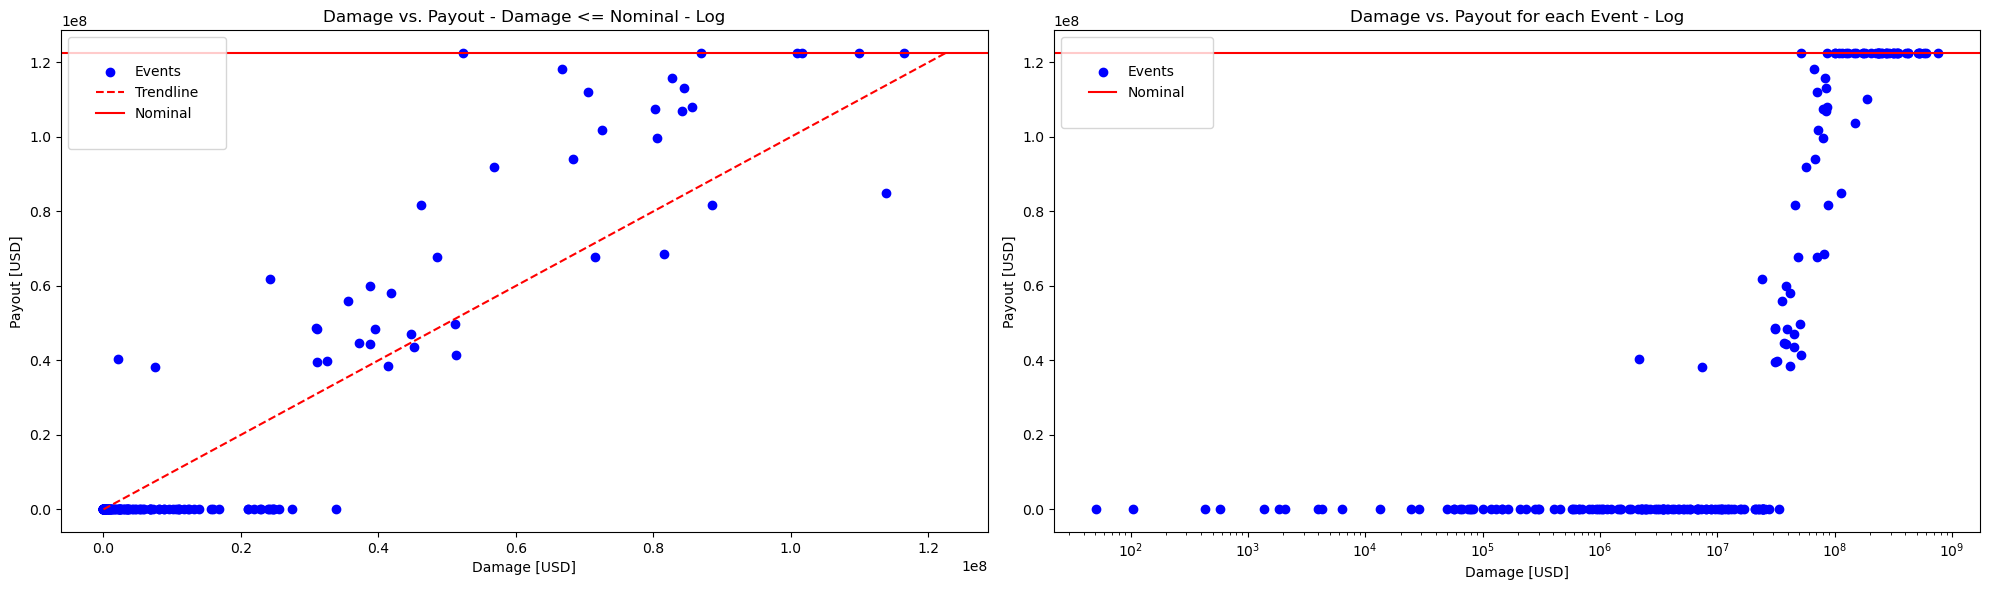

Expected Loss = 0.00649326936589277
Attachment Probability = 0.008001600320064013
The principal of the cat bond is: 134754311.6272001
Principal as percentage of GDP: 0.11
{0: (42.167281640981976, 65.17985777900202), 1: (30.0, 45.00000713533815), 2: (30.000918461040392, 58.13924689208235)}


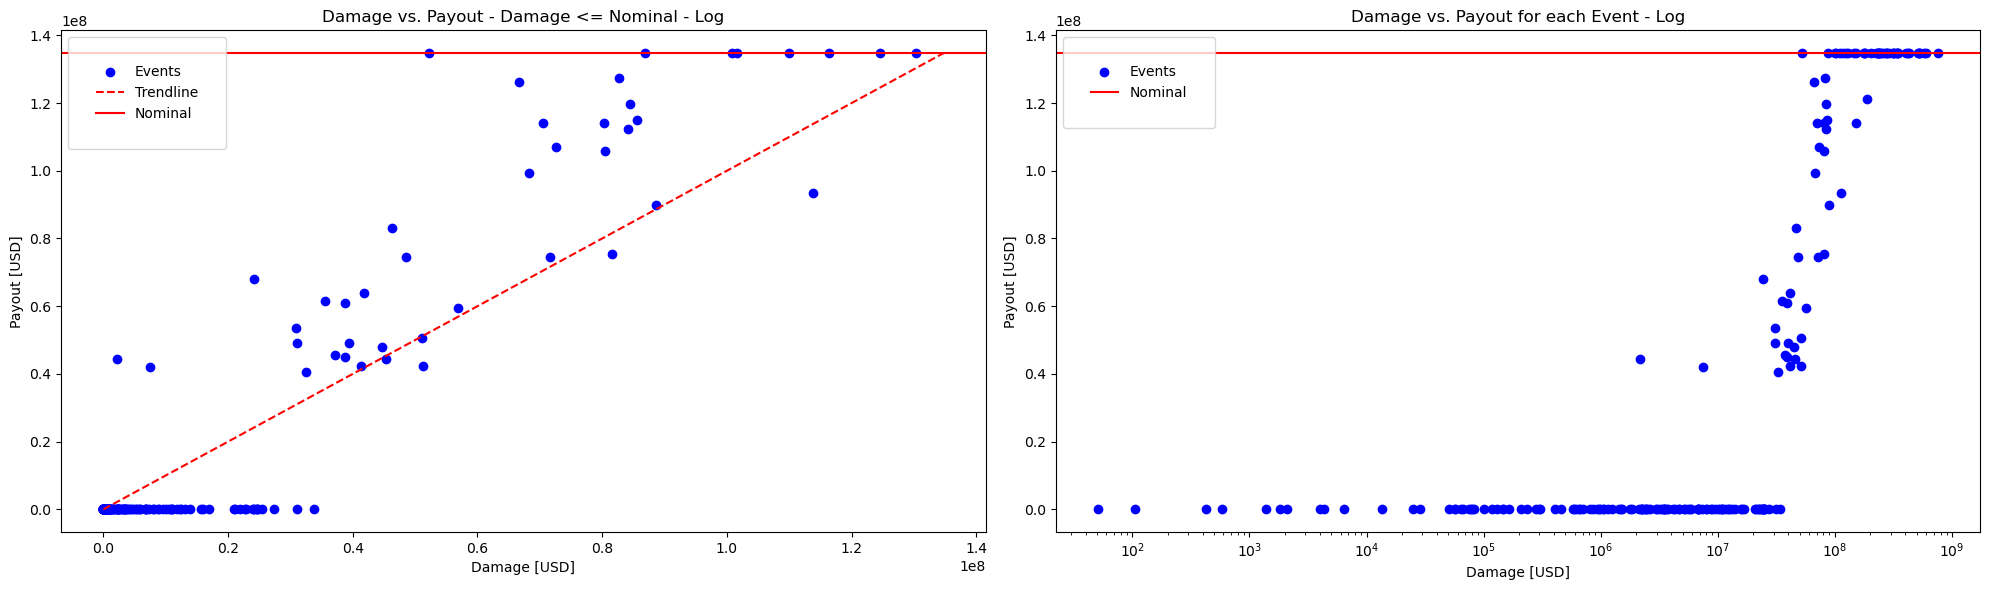

Expected Loss = 0.006362853662092487
Attachment Probability = 0.007901580316063212
The principal of the cat bond is: 147004703.5933092
Principal as percentage of GDP: 0.12
{0: (42.782955022689805, 65.24503756116412), 1: (30.0, 45.00000713533815), 2: (30.000915684516674, 59.75868097076346)}


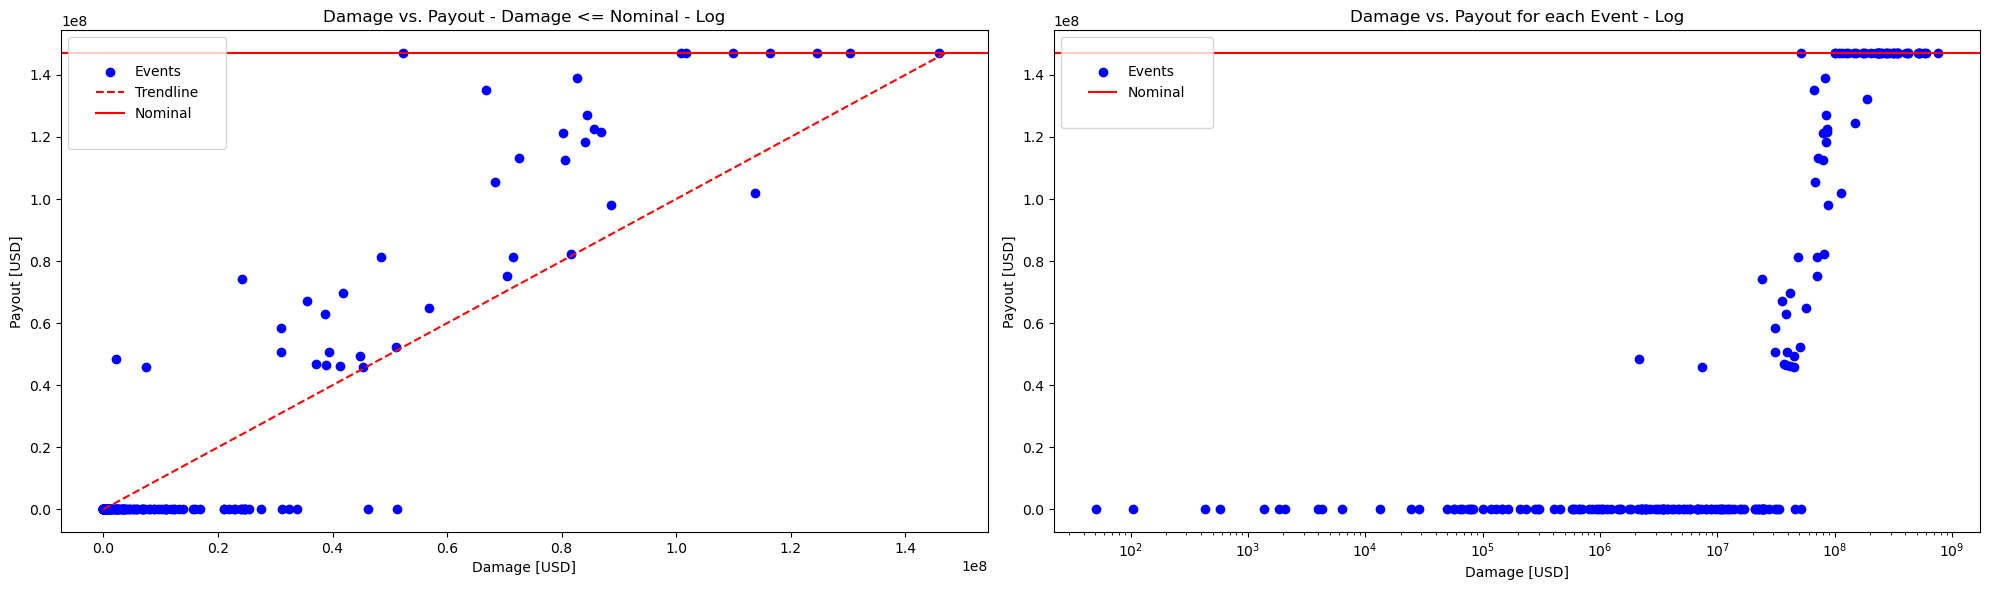

Expected Loss = 0.006155414330494503
Attachment Probability = 0.007601520304060812
The principal of the cat bond is: 159255095.5594183
Principal as percentage of GDP: 0.13
{0: (43.23976366515605, 65.904634816636), 1: (30.0, 45.00000713533815), 2: (30.781966012411548, 59.87540601312934)}


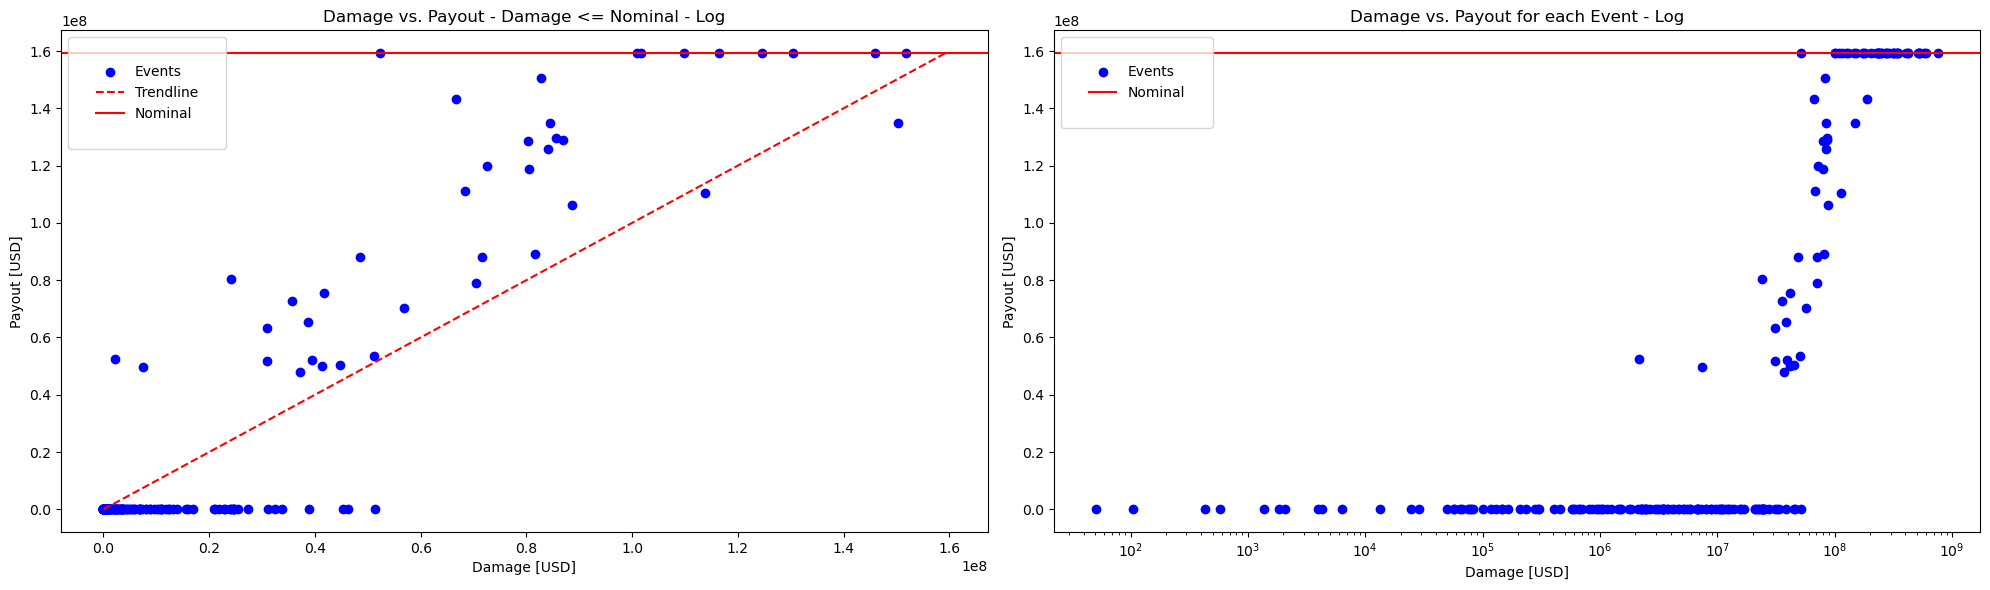

Expected Loss = 0.006063720351601653
Attachment Probability = 0.007401480296059212
The principal of the cat bond is: 171505487.52552742
Principal as percentage of GDP: 0.14
{0: (43.85137942869173, 65.78998345862412), 1: (30.0, 45.00000713533815), 2: (30.9736639773062, 61.026840368467745)}


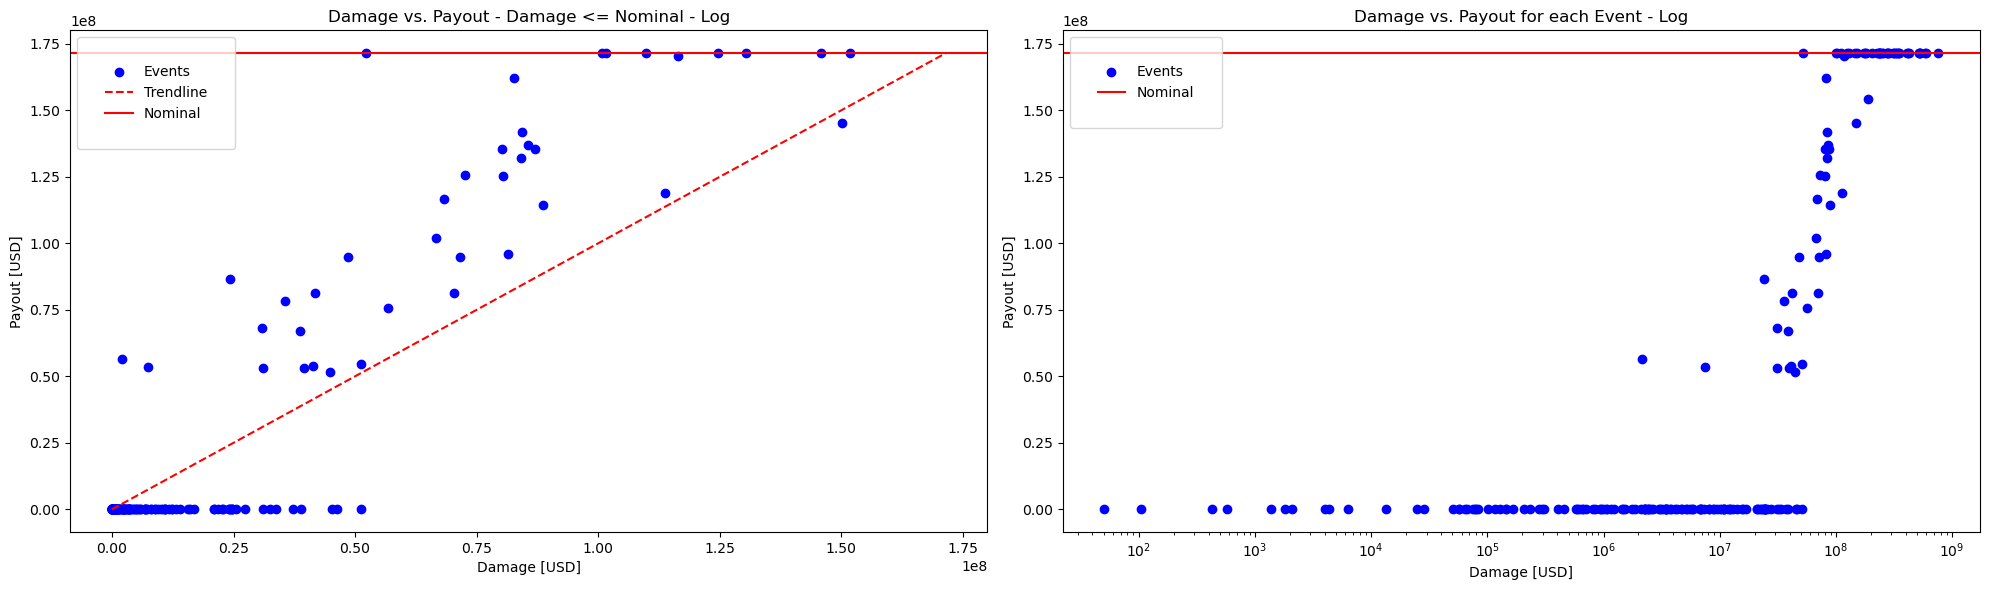

Expected Loss = 0.005977022434322785
Attachment Probability = 0.007301460292058411
The principal of the cat bond is: 183755879.4916365
Principal as percentage of GDP: 0.15000000000000002
{0: (44.76666037998644, 65.27193460839025), 1: (30.0, 45.00000713533815), 2: (31.326933117533116, 61.17807277454065)}


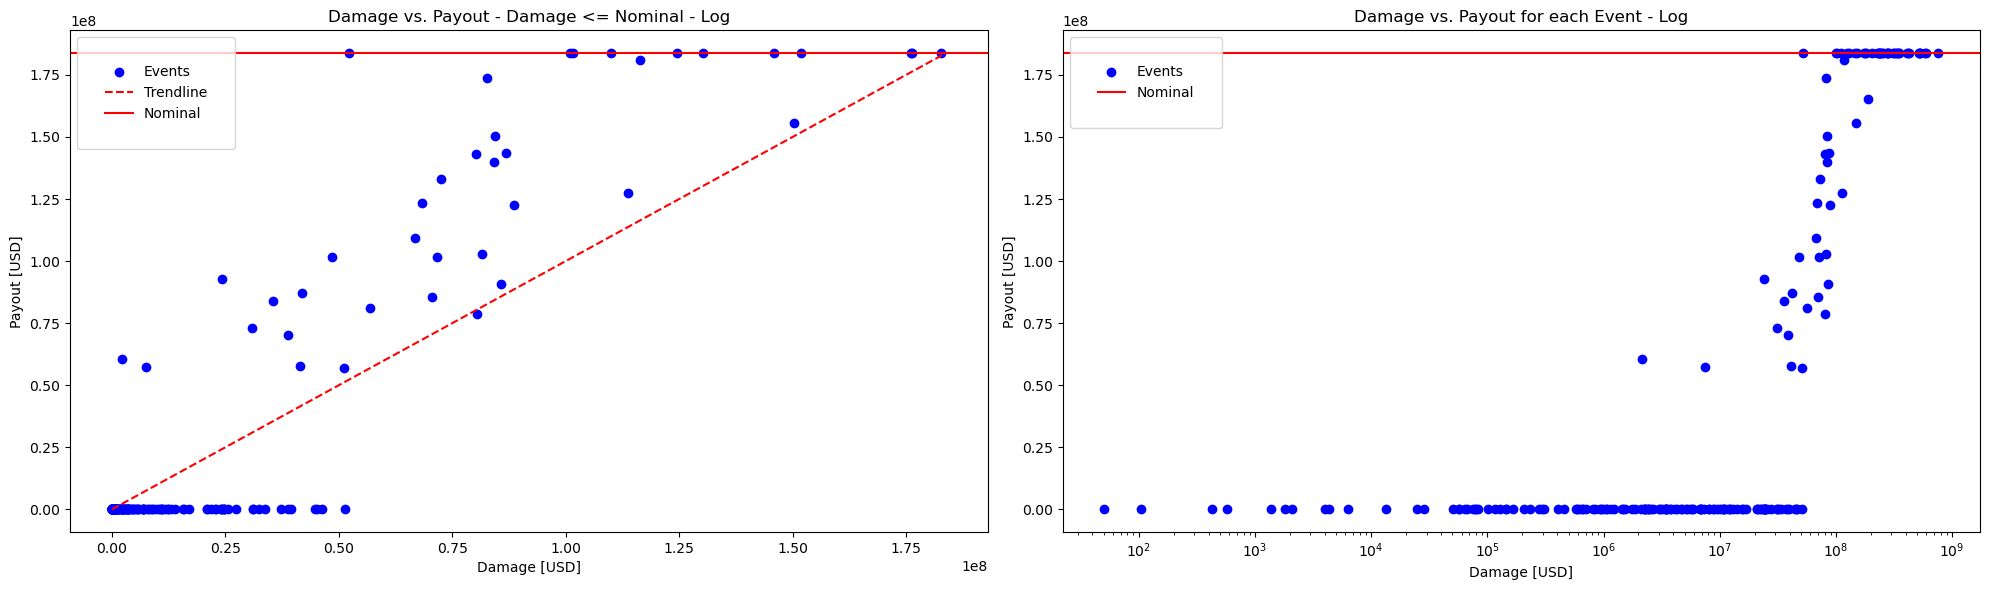

Expected Loss = 0.005815297364608938
Attachment Probability = 0.007001400280056011
The principal of the cat bond is: 196006271.45774558
Principal as percentage of GDP: 0.16
{0: (44.28108377140889, 67.03968913238549), 1: (30.208921304502226, 45.208921304502226), 2: (31.620998595772974, 61.45945038904015)}


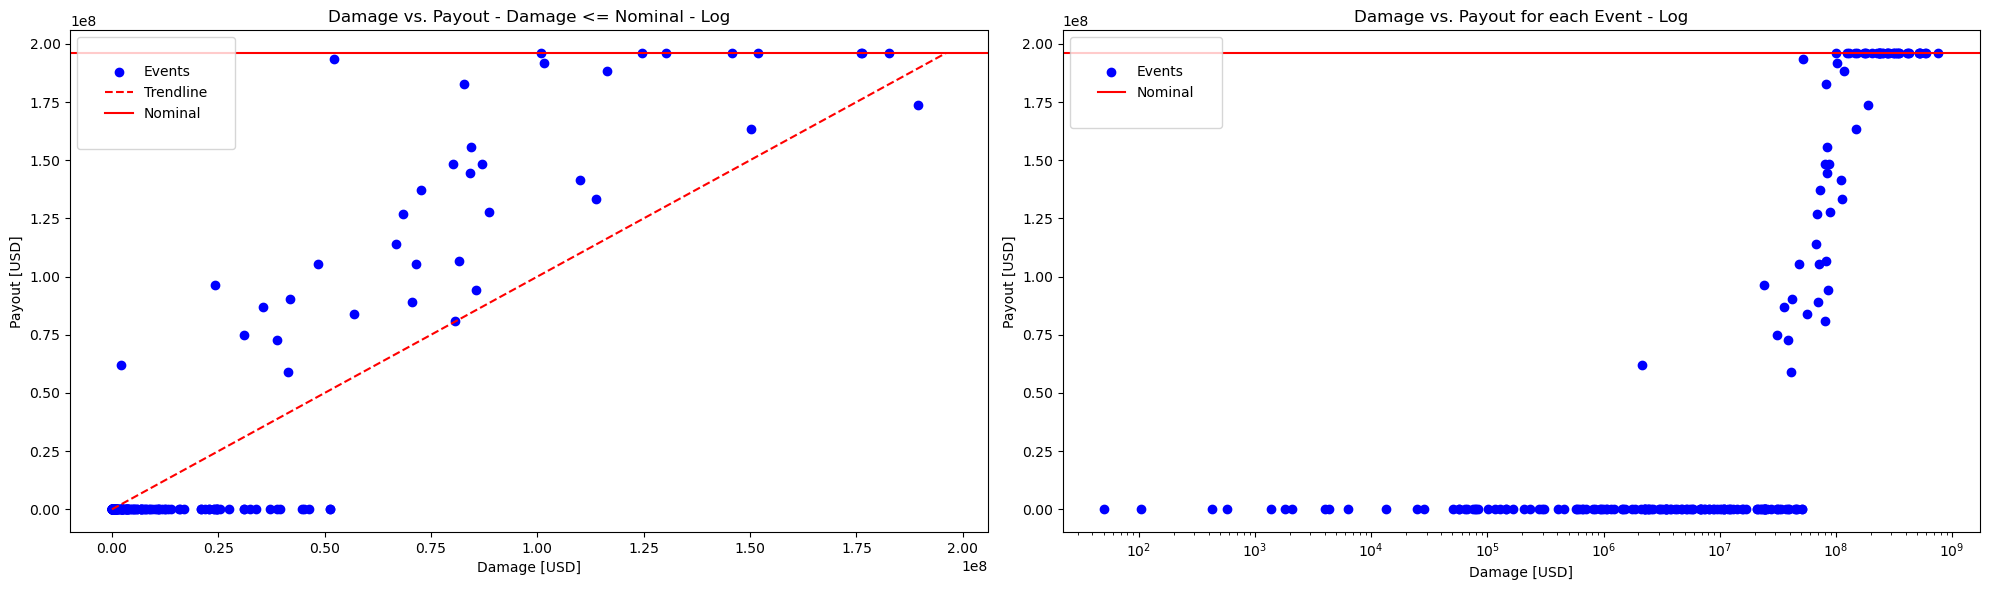

Expected Loss = 0.0056782464131482704
Attachment Probability = 0.0068013602720544105
The principal of the cat bond is: 208256663.4238547
Principal as percentage of GDP: 0.17
{0: (44.93679086418052, 67.53479517303339), 1: (30.000344108964452, 46.78673666358774), 2: (32.746568277429056, 60.983589810826516)}


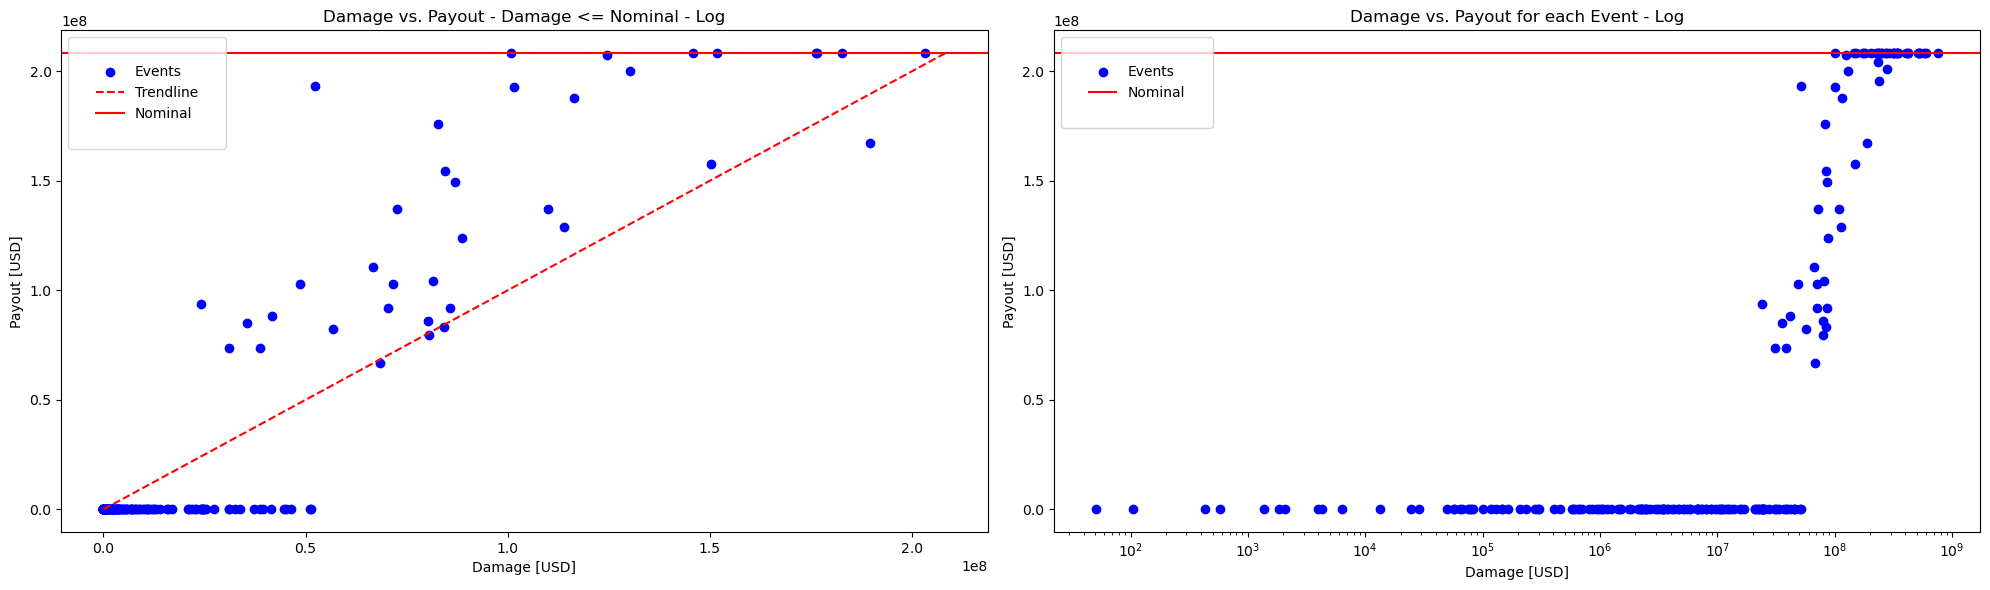

Expected Loss = 0.005380712773129681
Attachment Probability = 0.006601320264052811
The principal of the cat bond is: 220507055.3899638
Principal as percentage of GDP: 0.18000000000000002
{0: (44.82914837937827, 68.24187715519793), 1: (30.07827134244654, 47.76956217158376), 2: (32.29143667265109, 63.18131938169491)}


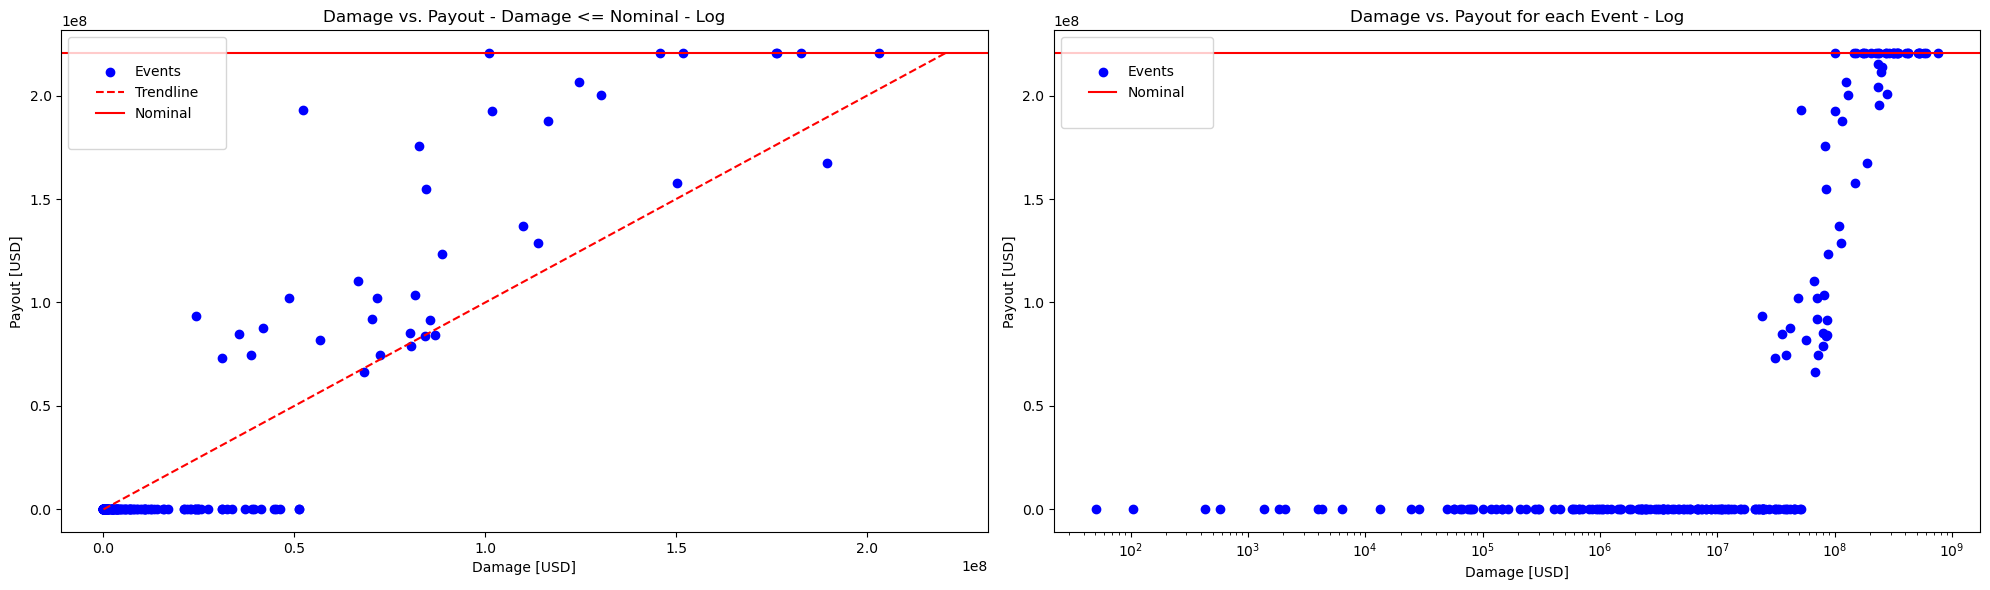

Expected Loss = 0.005193721955760024
Attachment Probability = 0.006601320264052811
The principal of the cat bond is: 232757447.3560729
Principal as percentage of GDP: 0.19
{0: (45.24539425678333, 68.18329189116592), 1: (29.999999999999996, 49.06377207048939), 2: (33.82296383364082, 62.818779730046195)}


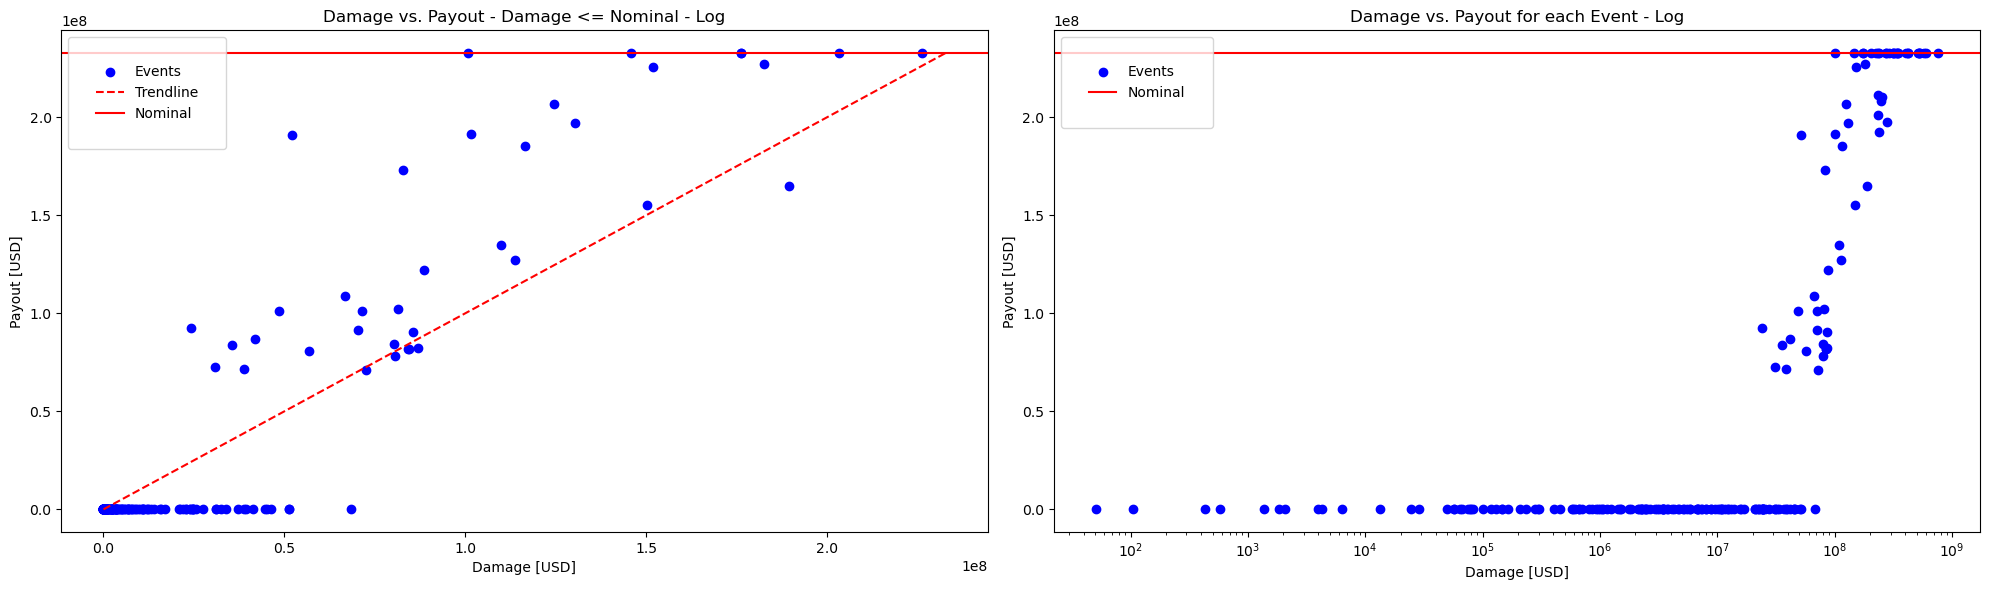

Expected Loss = 0.004986317418666526
Attachment Probability = 0.00650130026005201
The principal of the cat bond is: 245007839.322182
Principal as percentage of GDP: 0.2
{0: (45.15043498773162, 68.74782703349199), 1: (30.412682449057073, 49.959465861258494), 2: (33.89047300171187, 63.33866253201711)}


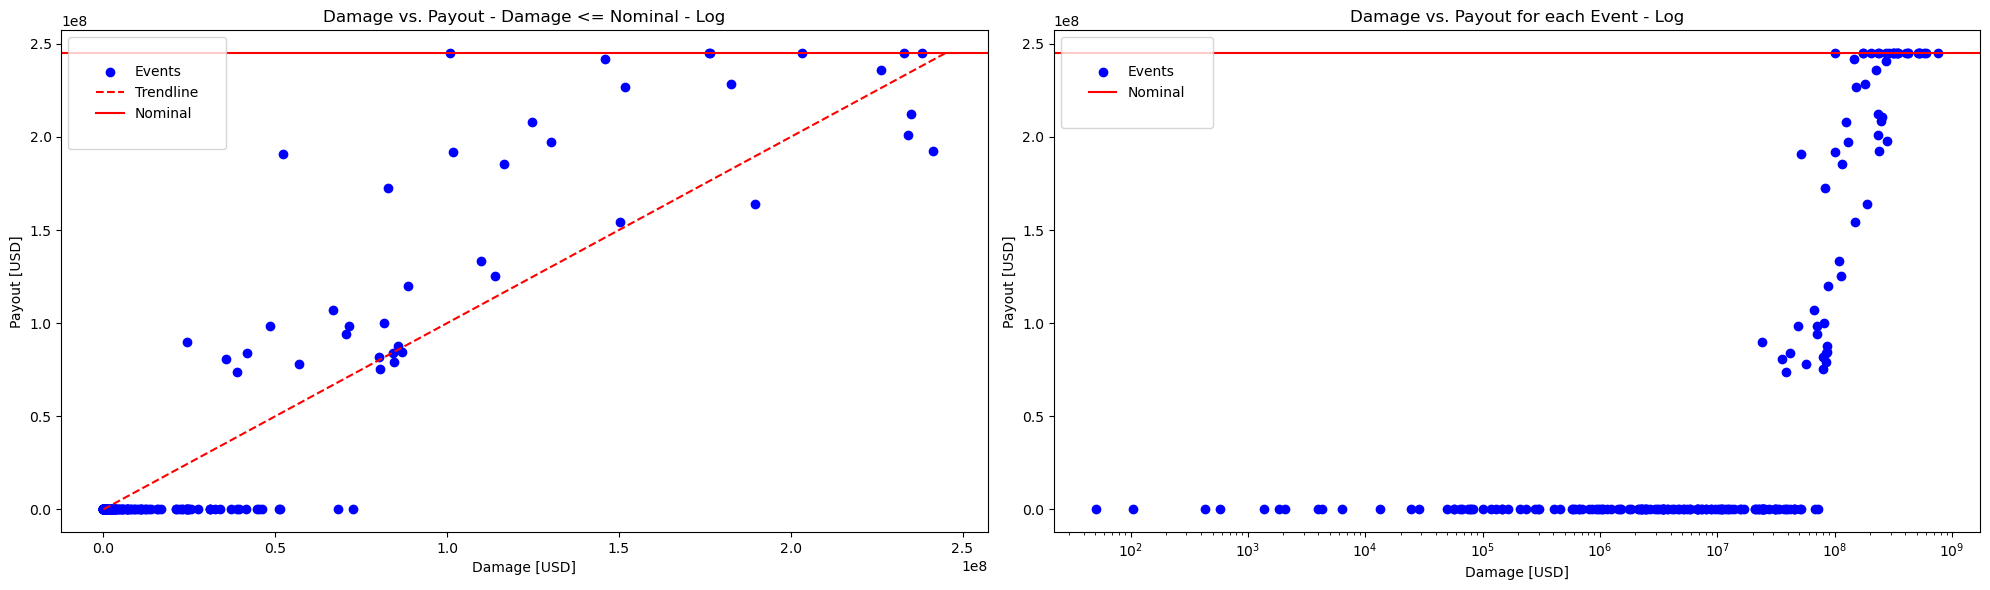

Expected Loss = 0.004801320520491577
Attachment Probability = 0.00630126025205041


In [52]:
premium_simulation_ps_c1, returns_ps_c1, premium_dic_c1, nom_arr_c1, pay_dam_df_ps_c1, es_metrics_ps_c1, int_grid_c1, imp_per_event_flt_c1, imp_admin_evt_flt_c1 = bond_fct.init_sng_cty_bond(country_1, prot_share_arr, lower_rp, rf_rate, requ_sharpe_ratio, True, True)

### Design Cat Bond for Country 2

STORM basin of country:  NA
----------------------Loading Exposure----------------------


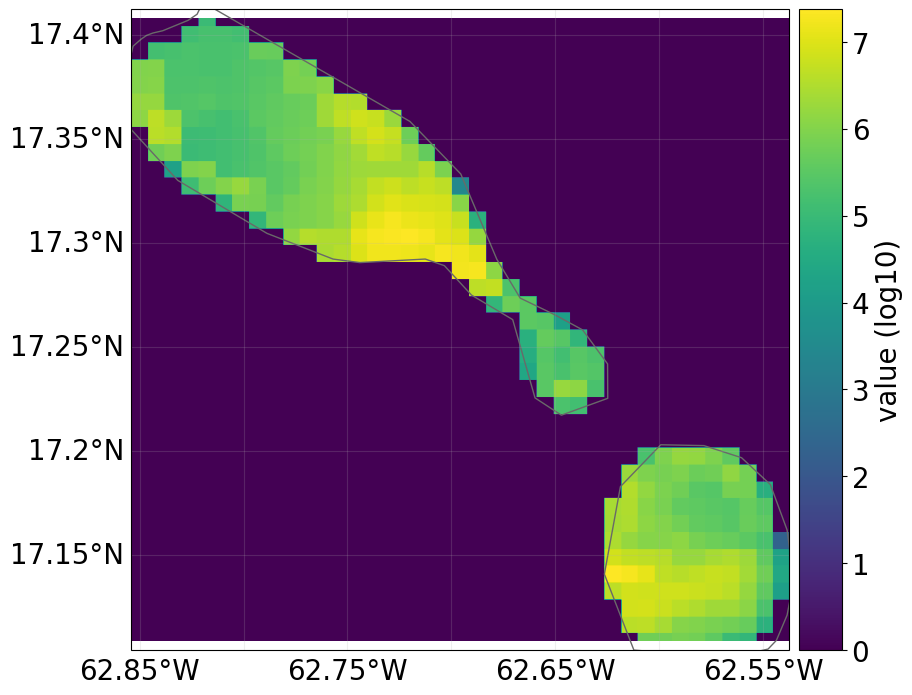

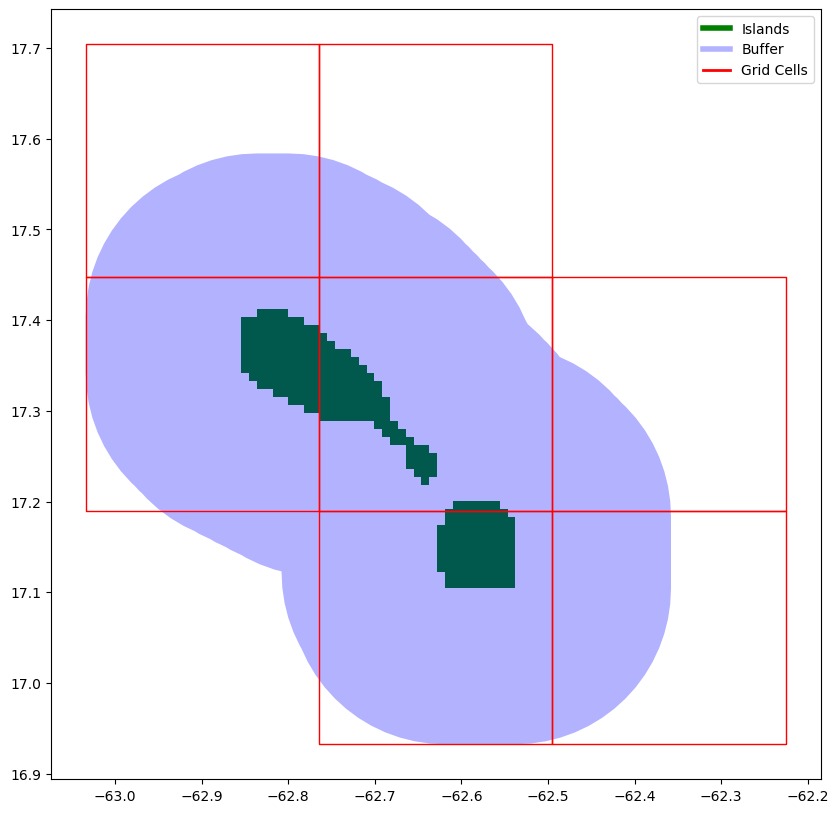

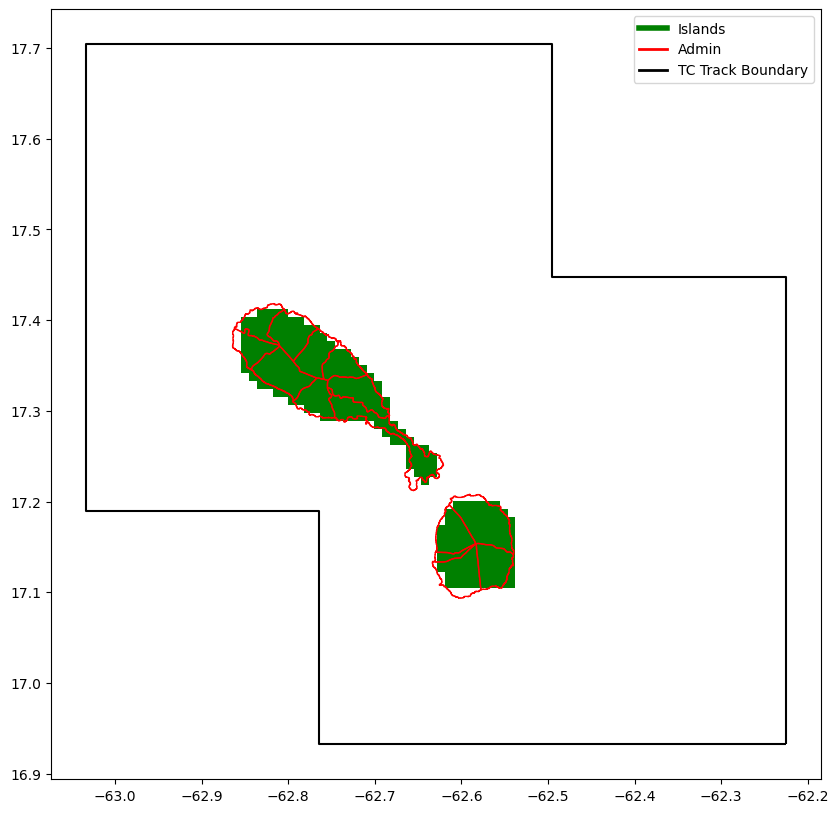

----------------------Loading Hazard----------------------
Number of tracks in NA basin: 946


c:\Users\kaibe\Documents\ETH_Zurich\Thesis\Code\impact.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


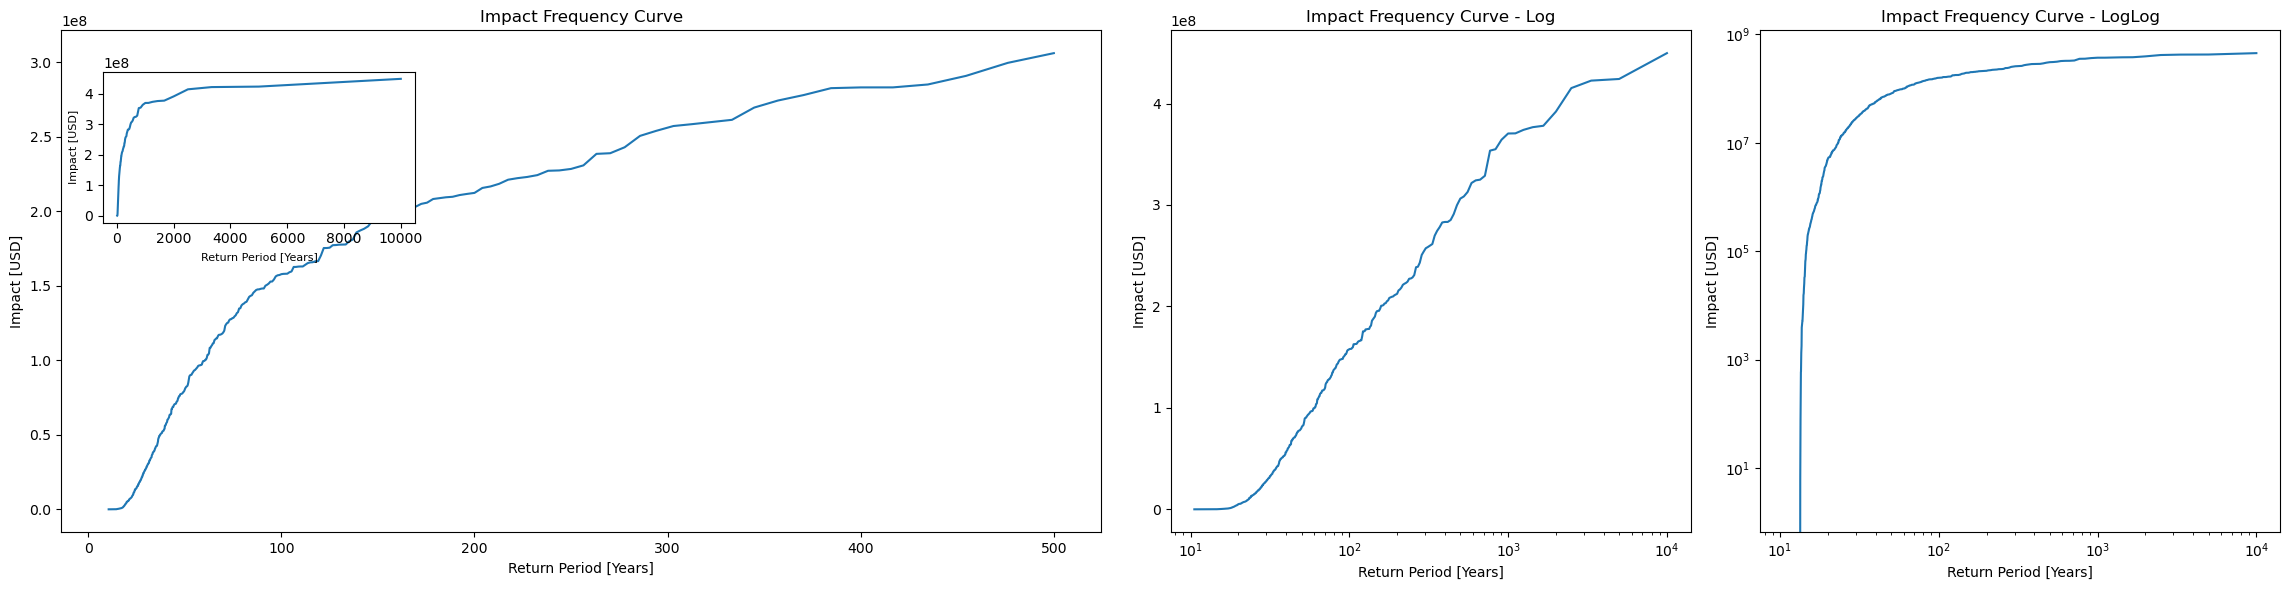

The principal of the cat bond is: 8839222.222222218
Principal as percentage of GDP: 0.010000000000000002
157866730.61501205

{0: (39.358885203131024, 68.16942841312277), 1: (40.2671341354114, 69.4016074143114), 2: (30.0, 45.0), 3: (31.533809336310718, 61.859214985661524), 4: (40.36063539889316, 69.29533056608025), 5: (47.99317185715125, 73.38120041775642), 6: (30.166249326066815, 50.97960556290335), 7: (32.0392583822995, 61.87457696700996), 8: (53.00286004424084, 77.31819155550218), 9: (33.290478903885216, 62.47425018608758), 10: (30.0, 45.0), 11: (33.031767597532195, 63.91226732758462), 12: (43.94907914327195, 72.44582996763371), 13: (37.850884369904044, 67.4994270736195)}


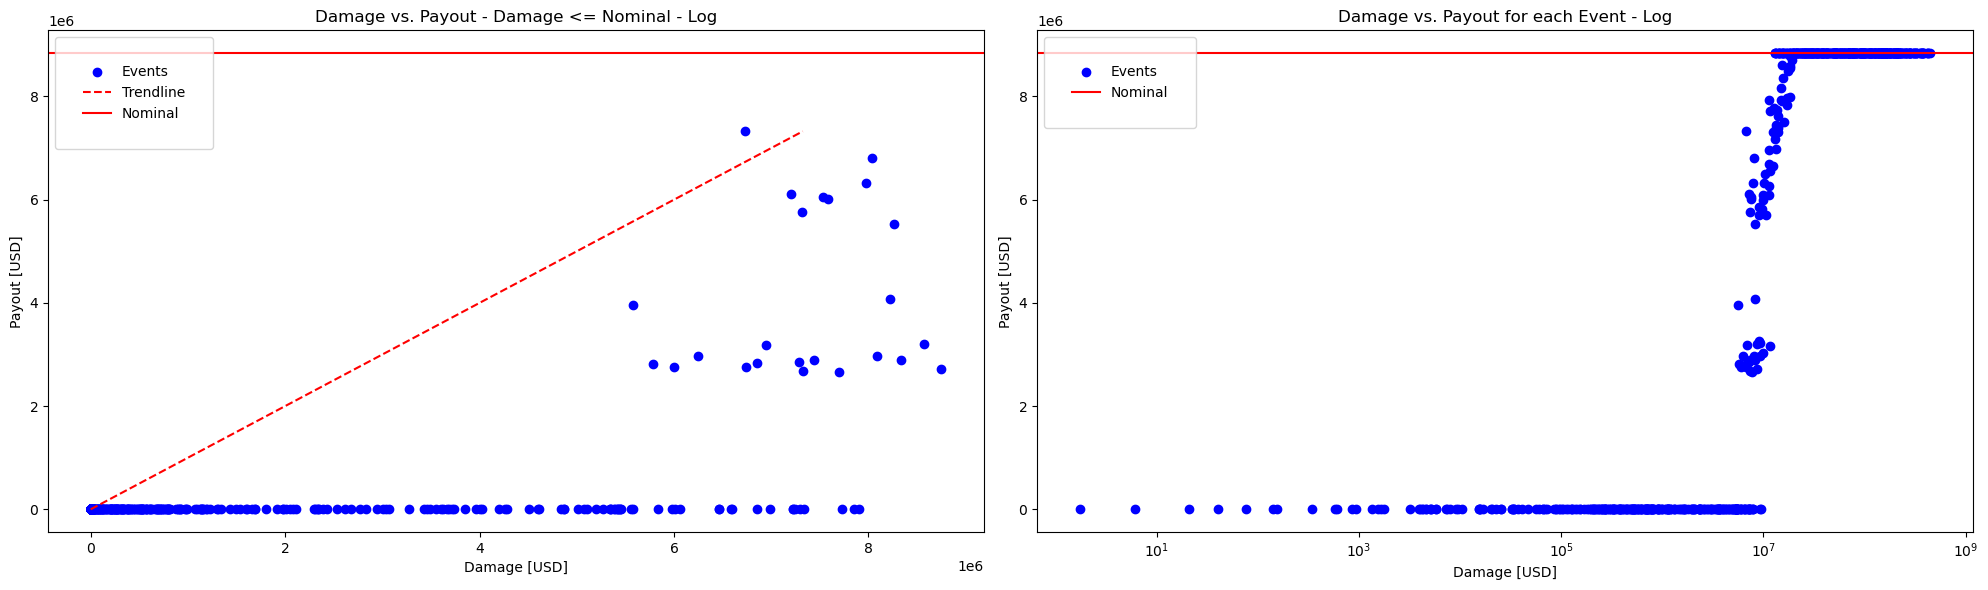

Expected Loss = 0.041146407678881135
Attachment Probability = 0.043342001733680066
The principal of the cat bond is: 17678444.444444437
Principal as percentage of GDP: 0.020000000000000004
157866730.61501205

{0: (44.60311696920208, 71.41750029798722), 1: (45.153862515043485, 72.93309284047184), 2: (30.0, 45.0), 3: (39.15677963282672, 65.57157833812403), 4: (44.31844401399026, 73.90068178451912), 5: (50.09716139726191, 77.48581422590503), 6: (32.90484603178331, 63.342928179558534), 7: (38.63737489976353, 67.79912443678931), 8: (55.69609687272961, 77.37603049231193), 9: (40.021222585167756, 66.1046291708025), 10: (30.979157193605776, 52.45287436614818), 11: (38.64438692518508, 69.25152488504513), 12: (47.5283929108244, 76.8169809649607), 13: (43.04943511992418, 70.82872037871007)}


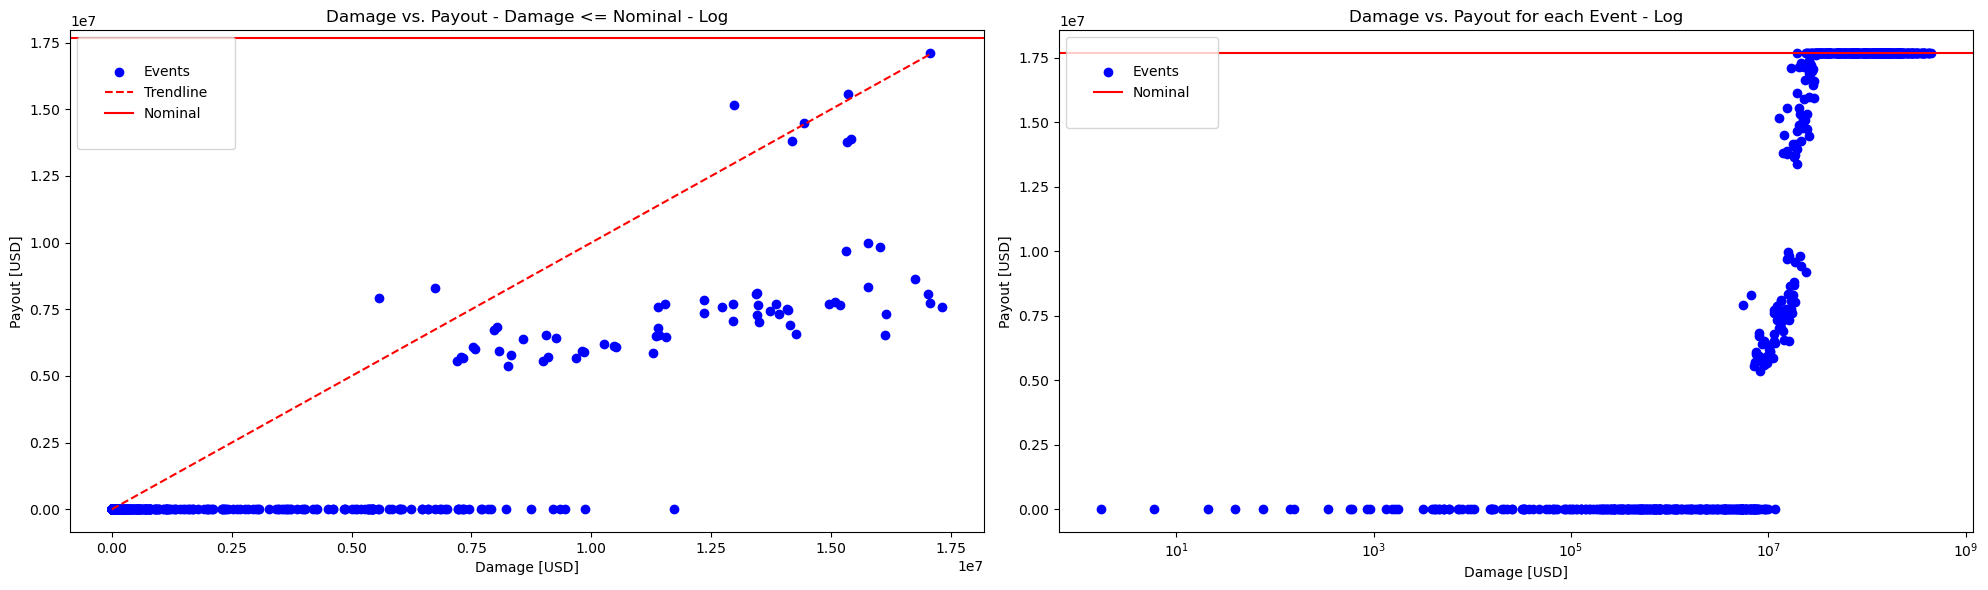

Expected Loss = 0.03800469640601968
Attachment Probability = 0.04230846169233847
The principal of the cat bond is: 26517666.66666665
Principal as percentage of GDP: 0.029999999999999995
157866730.61501205

{0: (47.551262823731044, 71.96391061087179), 1: (47.96344203337541, 73.97961387636694), 2: (30.059639833411197, 52.96693088620804), 3: (41.72878616294506, 68.03258237112732), 4: (46.544431825907026, 75.22496536431322), 5: (52.783108615179586, 78.98161397763114), 6: (35.94454954678097, 67.68892738708665), 7: (41.496983328918816, 70.40336158227251), 8: (57.13806208069358, 77.24331103313463), 9: (42.59650402931228, 69.00385445438786), 10: (31.562787057595656, 61.48087559046542), 11: (42.73159081985298, 70.622874591085), 12: (49.29666050205668, 78.56097596636101), 13: (45.907621230095906, 72.67154511066376)}


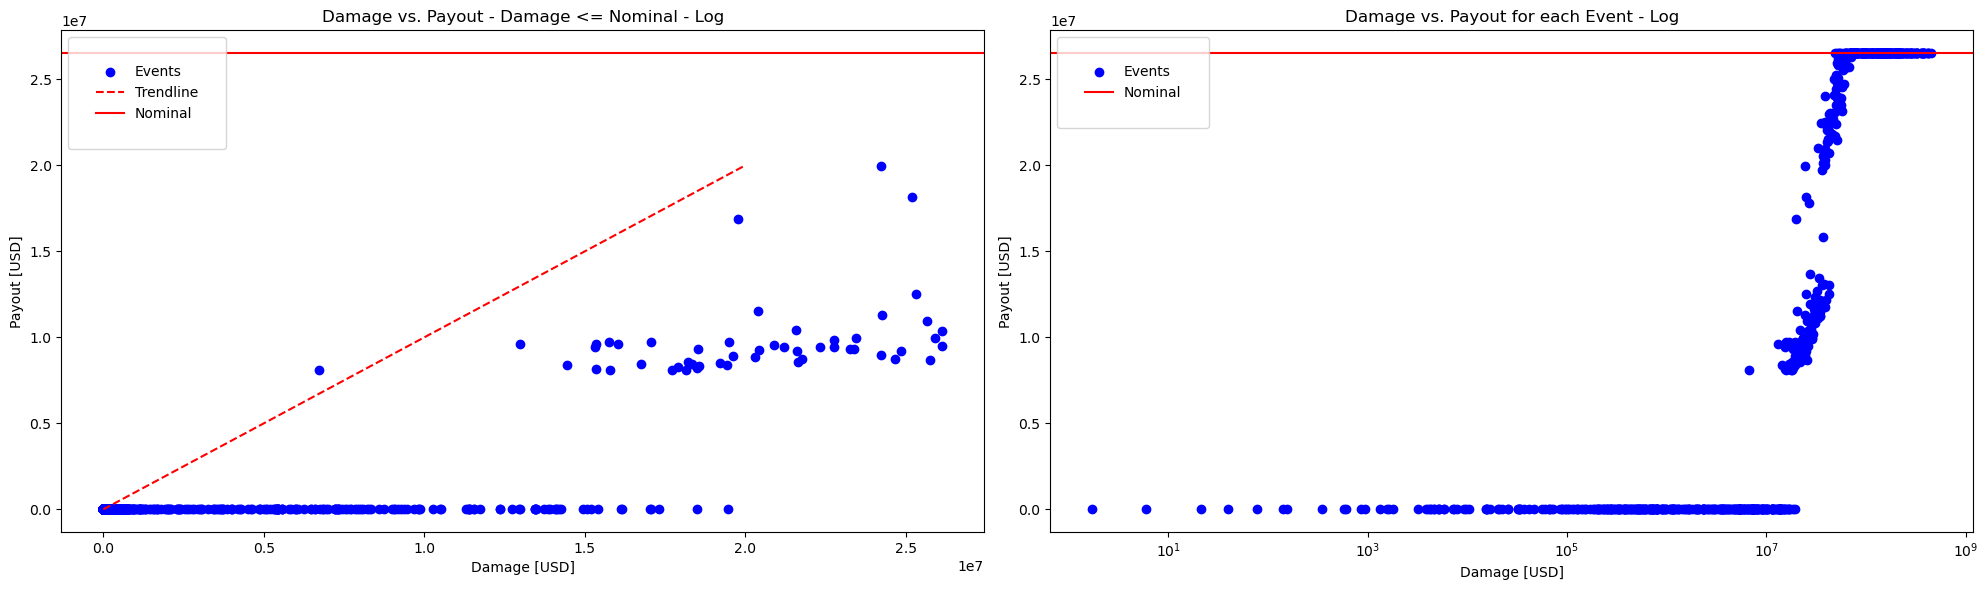

Expected Loss = 0.031670566489454245
Attachment Probability = 0.03740748149629925
The principal of the cat bond is: 35356888.88888887
Principal as percentage of GDP: 0.04000000000000001
157866730.61501205

{0: (49.74377879941054, 72.01322003388802), 1: (50.2906840057392, 73.18077453707127), 2: (30.000199131970607, 60.21692380191534), 3: (43.51131472139972, 69.71269633871853), 4: (48.3377020150809, 76.29418299887598), 5: (53.74608548328793, 79.8236746296217), 6: (38.619160149011186, 68.83273057670903), 7: (43.653402977010096, 71.27650745818482), 8: (58.21935525953346, 76.55299948811867), 9: (44.440768285488225, 69.3665885737098), 10: (34.971447608412305, 64.11338051532346), 11: (44.859355205003055, 70.32646494091641), 12: (51.12958640006283, 79.18696673736957), 13: (47.27008259828732, 73.40483226486606)}


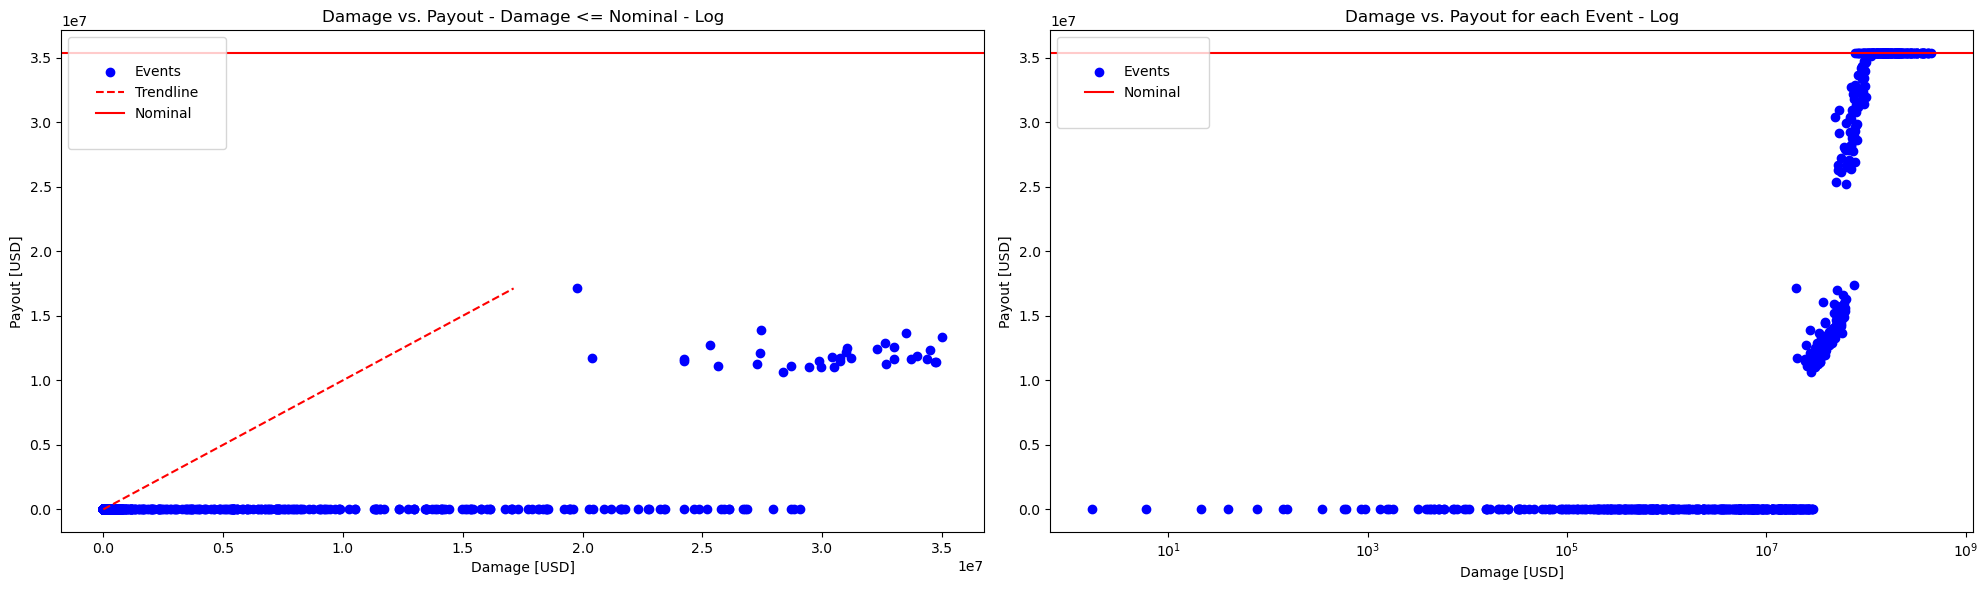

Expected Loss = 0.026356375968584197
Attachment Probability = 0.03300660132026405
The principal of the cat bond is: 44196111.11111109
Principal as percentage of GDP: 0.05
157866730.61501205

{0: (50.64418008673149, 72.98066799448307), 1: (50.79884402609081, 74.87738065423893), 2: (32.5495507628034, 62.706496013290995), 3: (44.705871936297456, 70.51239917680657), 4: (49.217237333240845, 76.7840865395009), 5: (54.07586560819233, 80.79090352518696), 6: (40.68892698459326, 69.98430187962435), 7: (44.85426720130183, 72.22705595497064), 8: (58.559574202813415, 76.72997950449933), 9: (46.110721083173026, 69.6887740101454), 10: (36.23291081686629, 66.96301656215654), 11: (45.56866769085475, 71.95265446082792), 12: (51.71855077520977, 80.87629460485476), 13: (47.61310766635969, 75.92872427655814)}


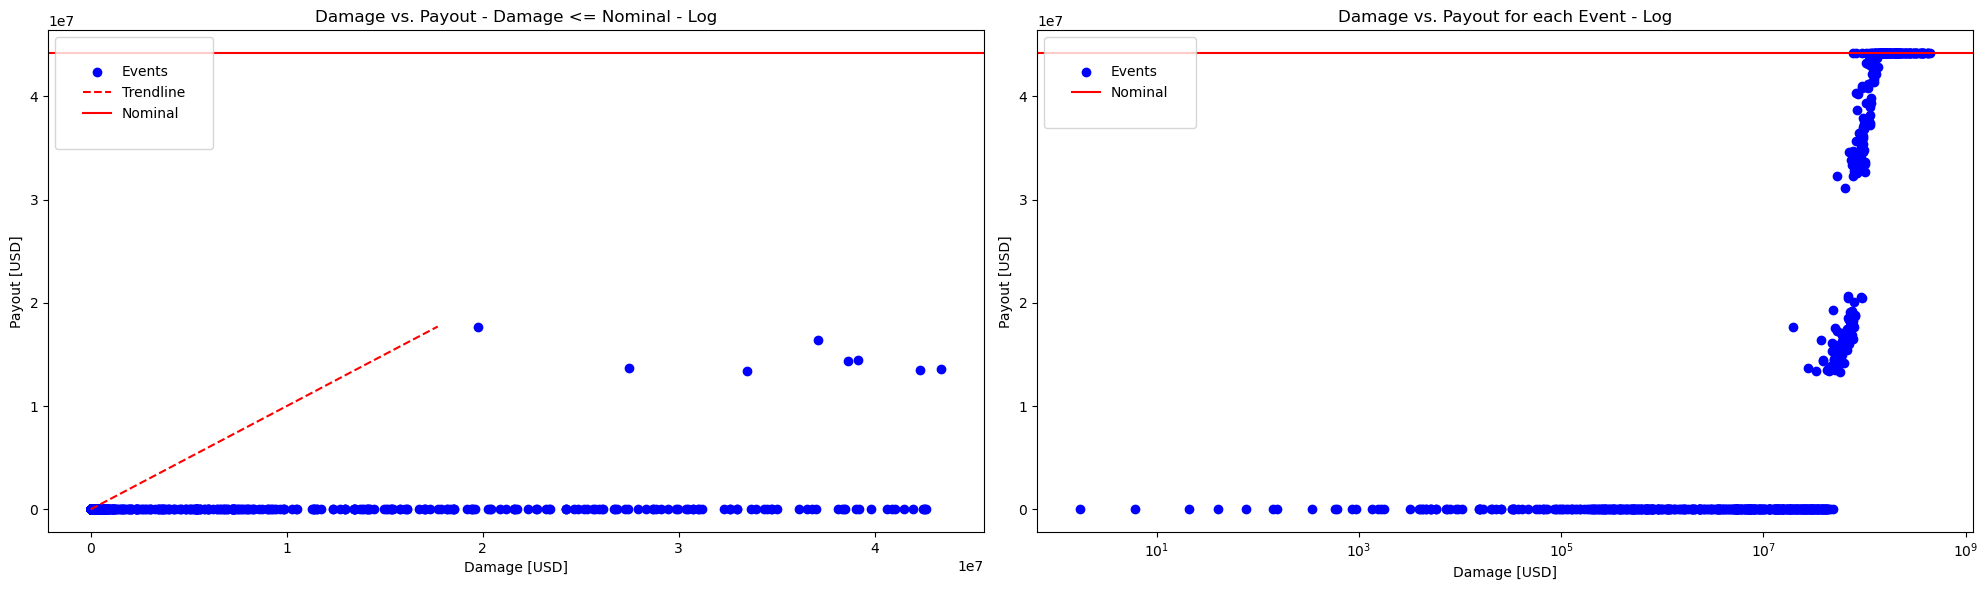

Expected Loss = 0.022049144853229844
Attachment Probability = 0.028038941121557644
The principal of the cat bond is: 53035333.333333306
Principal as percentage of GDP: 0.060000000000000005
157866730.61501205

{0: (51.72247891967482, 73.24631055190538), 1: (52.15867811599884, 75.02434792254577), 2: (34.01784652113684, 65.08526639667983), 3: (45.37558182224359, 72.03819468318443), 4: (49.99199437428744, 77.75348082502948), 5: (55.013258780882396, 81.72757444652206), 6: (40.633370598916066, 72.60504606791459), 7: (45.674699823516754, 73.4606750059071), 8: (58.856519493252776, 76.0807219202137), 9: (46.423232544862245, 71.6073848460548), 10: (37.83210250567277, 68.43752395599452), 11: (47.68079292028685, 71.02157912406793), 12: (53.40223742383612, 80.85491800689044), 13: (48.23955190163168, 77.59111267443011)}


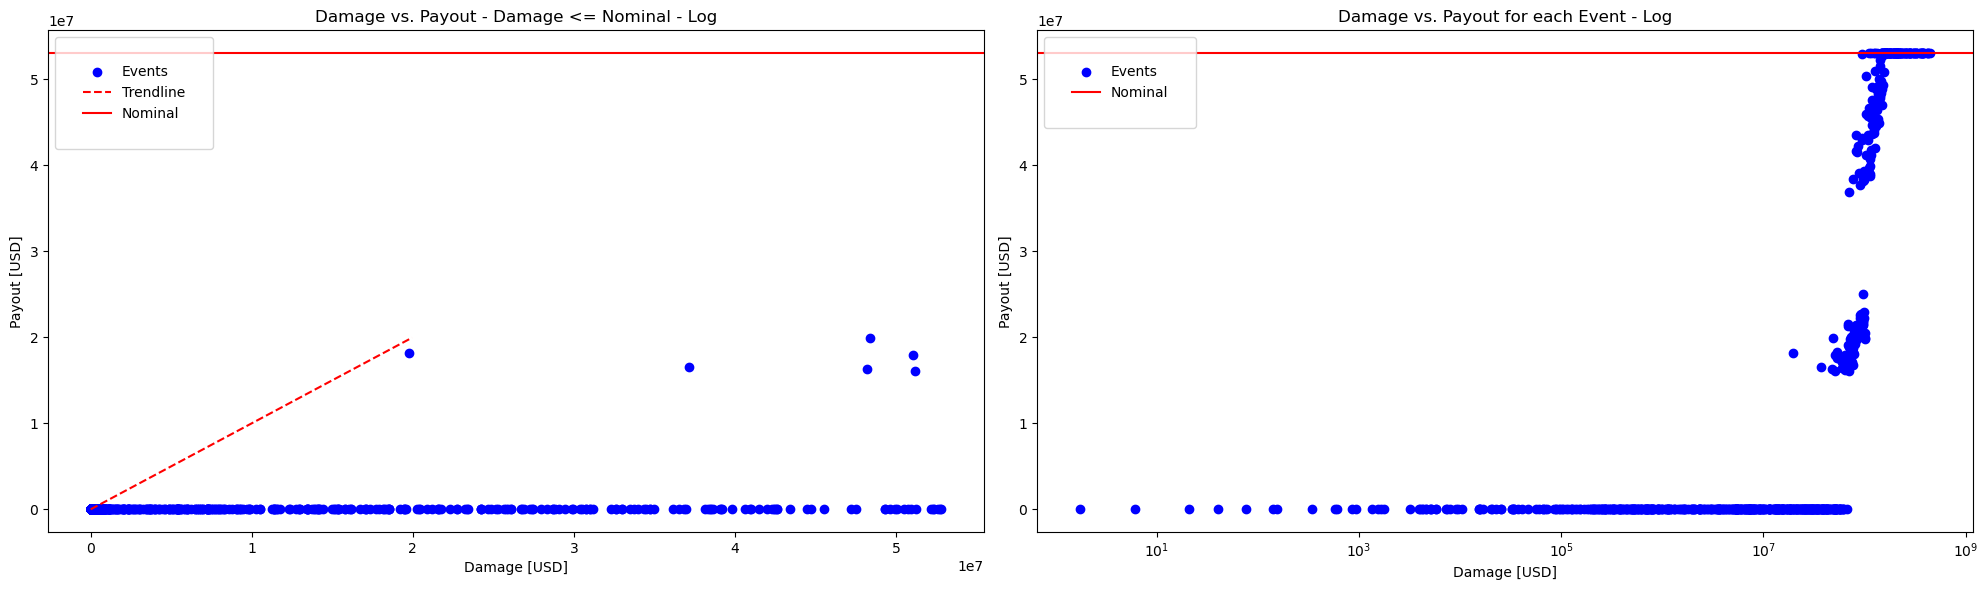

Expected Loss = 0.01900043340645526
Attachment Probability = 0.02447156097886244
The principal of the cat bond is: 61874555.555555515
Principal as percentage of GDP: 0.06999999999999999
157866730.61501205

{0: (52.744825608071714, 73.73301891235548), 1: (52.56583208551477, 76.1202280990589), 2: (35.50389595670496, 66.48110726985988), 3: (46.97682365889586, 70.90186215886128), 4: (50.66889746803446, 79.48827558469398), 5: (55.37085411342232, 81.27147750903687), 6: (42.40085651042354, 72.07828716743295), 7: (46.60726086011964, 73.70365556321083), 8: (58.77061133195197, 76.28132625769005), 9: (47.94830917768535, 70.5606474743723), 10: (38.61653674342294, 70.64567570668626), 11: (47.47456415471537, 73.21816360193993), 12: (53.89742979433493, 80.7862385601336), 13: (48.88271282807086, 79.29073135105126)}


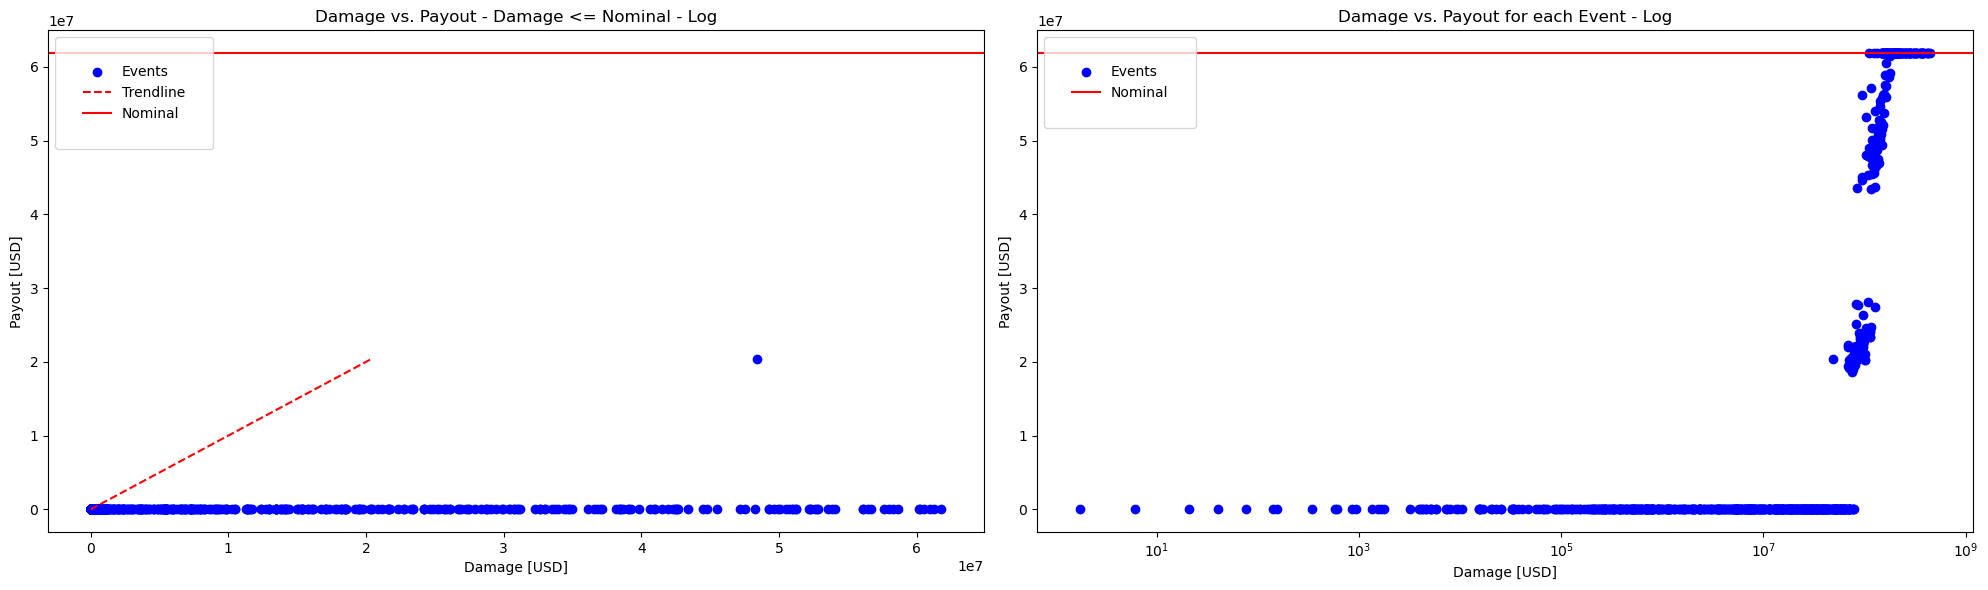

Expected Loss = 0.016773071625069063
Attachment Probability = 0.021637660865506433
The principal of the cat bond is: 70713777.77777775
Principal as percentage of GDP: 0.08000000000000002
157866730.61501205

{0: (53.6194605679261, 73.61925743748026), 1: (53.78680196838358, 75.21346807673393), 2: (36.464595849458156, 67.99760601403426), 3: (47.37847916129336, 70.9471011465708), 4: (51.5047635786721, 79.96089370304544), 5: (55.39435570867099, 81.61328716069661), 6: (43.24465735717384, 71.68155686143008), 7: (46.91114517702953, 73.99783886023266), 8: (59.03760957489861, 76.44008262165619), 9: (48.565203006903964, 71.11315089603778), 10: (38.77248013278957, 73.19674404895126), 11: (48.809289749236015, 72.55373625627857), 12: (53.55133598580338, 82.4562076486686), 13: (49.12320091060765, 79.90476901182214)}


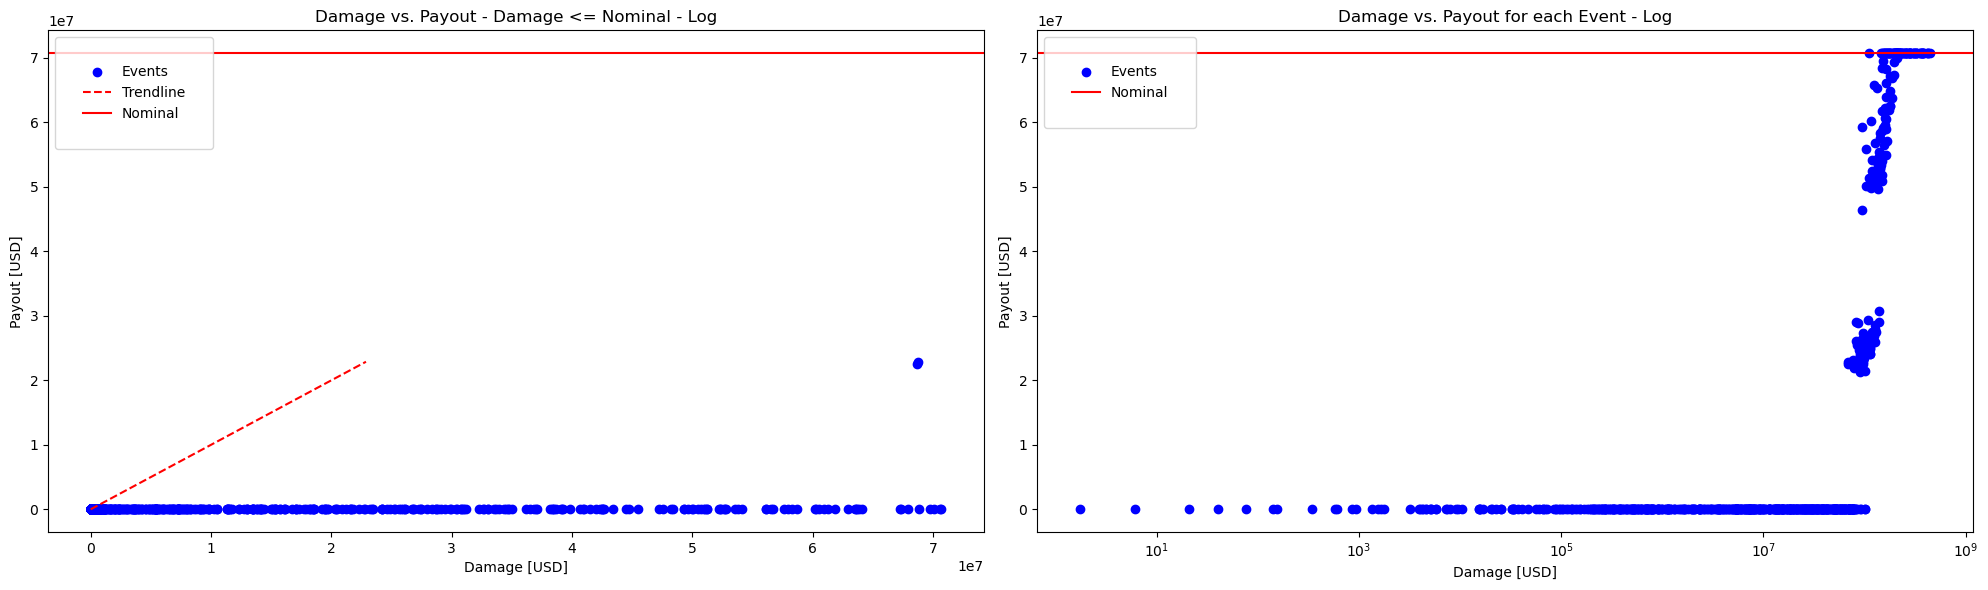

Expected Loss = 0.015069099725618627
Attachment Probability = 0.01957058078282323
The principal of the cat bond is: 79552999.99999996
Principal as percentage of GDP: 0.09
157866730.61501205

{0: (54.399665077494596, 73.72376907257957), 1: (55.224393130265796, 75.70287472503458), 2: (36.70464302372611, 70.10268353625194), 3: (48.328837466427004, 71.62182127423458), 4: (51.3937188598879, 80.45156024513489), 5: (55.37285284806975, 81.73495857426394), 6: (43.89421884923624, 72.50861932908549), 7: (48.48745504875349, 73.74895506769522), 8: (59.01761260200552, 76.48627426049599), 9: (49.30659405540884, 70.98255829796221), 10: (40.039831337092565, 73.27485050788692), 11: (48.794054146554586, 73.87677582450138), 12: (54.31245204581882, 82.75301009108934), 13: (49.65981414670027, 80.97489322567408)}


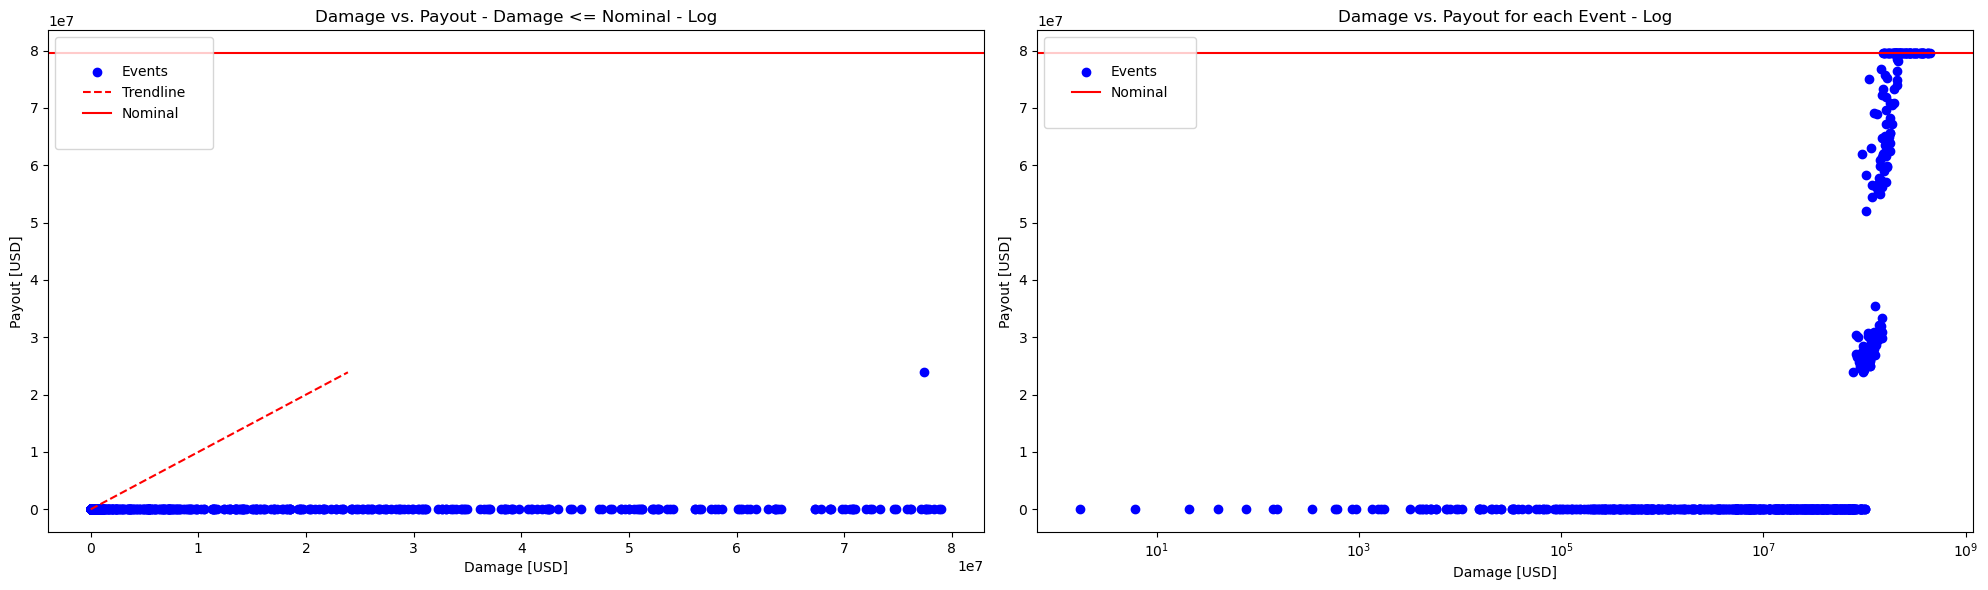

Expected Loss = 0.013673099547978247
Attachment Probability = 0.018236980729479227
The principal of the cat bond is: 88392222.22222216
Principal as percentage of GDP: 0.09999999999999999
157866730.61501205

{0: (55.185753661508365, 73.20131079086367), 1: (55.35229779223622, 75.87536958644868), 2: (38.10434635900917, 70.1081450594504), 3: (49.89851497839066, 70.90390736382783), 4: (52.22739511858162, 80.27079738719489), 5: (55.98218094289829, 82.0292401780906), 6: (43.844047914911286, 74.26074204650648), 7: (48.50812326078733, 75.14154858965931), 8: (59.67454322971895, 74.95431343618617), 9: (49.36960472392283, 71.54727554853885), 10: (40.68649264197654, 73.61193096203053), 11: (49.89868864360665, 73.12625585894278), 12: (54.65773889162427, 81.99878334320931), 13: (50.83032440379318, 80.33768485909208)}


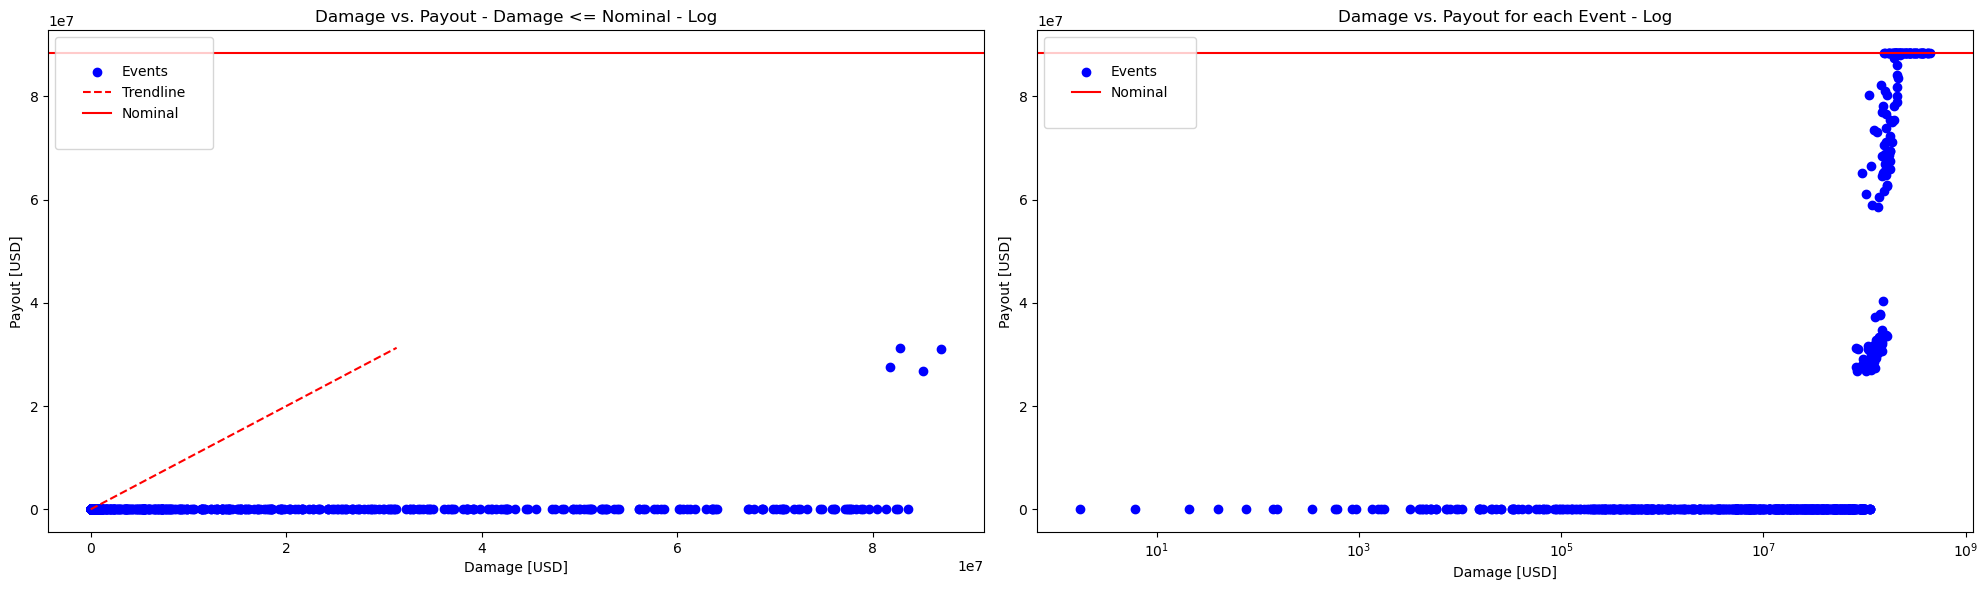

Expected Loss = 0.012294764647361437
Attachment Probability = 0.016336600653464026
The principal of the cat bond is: 97231444.44444439
Principal as percentage of GDP: 0.11
157866730.61501205

{0: (55.12154375235352, 73.66010907898435), 1: (56.082882643640765, 75.73104502346598), 2: (39.00666695620209, 70.87665260911504), 3: (50.371087428709245, 71.68109518874068), 4: (52.04236768877688, 81.50262648538701), 5: (55.94650469260058, 82.1121813542067), 6: (44.88761991746233, 73.76194494954973), 7: (49.11512642792908, 75.43769888525016), 8: (60.030617173950496, 75.03828999203792), 9: (50.17935354096233, 72.32622264353009), 10: (41.18668437780823, 73.81044518622026), 11: (51.03864415213984, 72.38241592632264), 12: (55.72162671895562, 81.97412527515952), 13: (50.853712683973164, 81.23652615535516)}


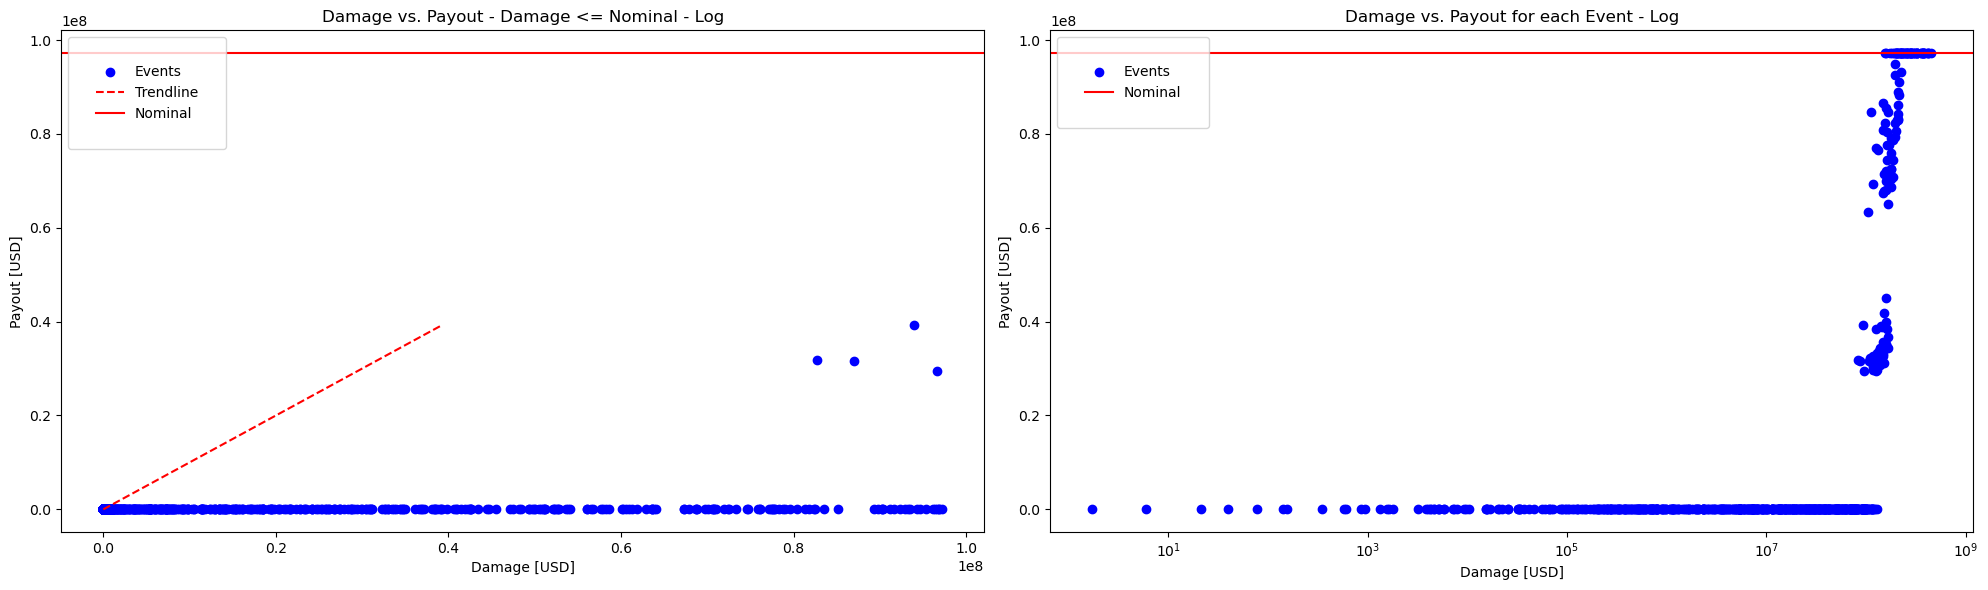

Expected Loss = 0.011280437882133903
Attachment Probability = 0.015236380609455223
The principal of the cat bond is: 106070666.6666666
Principal as percentage of GDP: 0.11999999999999998
157866730.61501205

{0: (55.69440556051193, 74.57217272932245), 1: (56.12752706629064, 76.31232574137653), 2: (40.150286546075925, 70.82816008764121), 3: (50.65020694822908, 71.68092162265609), 4: (52.92425915725153, 80.40283059093849), 5: (55.97396643206637, 82.16389187404441), 6: (45.20941462989757, 74.1165952253523), 7: (49.5522547460308, 75.67340572957228), 8: (60.10691748021055, 76.14977851349846), 9: (50.19989074244763, 72.98718893324698), 10: (42.52702094296425, 73.24848476644564), 11: (50.36994217121465, 73.98033426775567), 12: (55.74876514605986, 82.1800496126882), 13: (51.71186198294049, 81.6476678157865)}


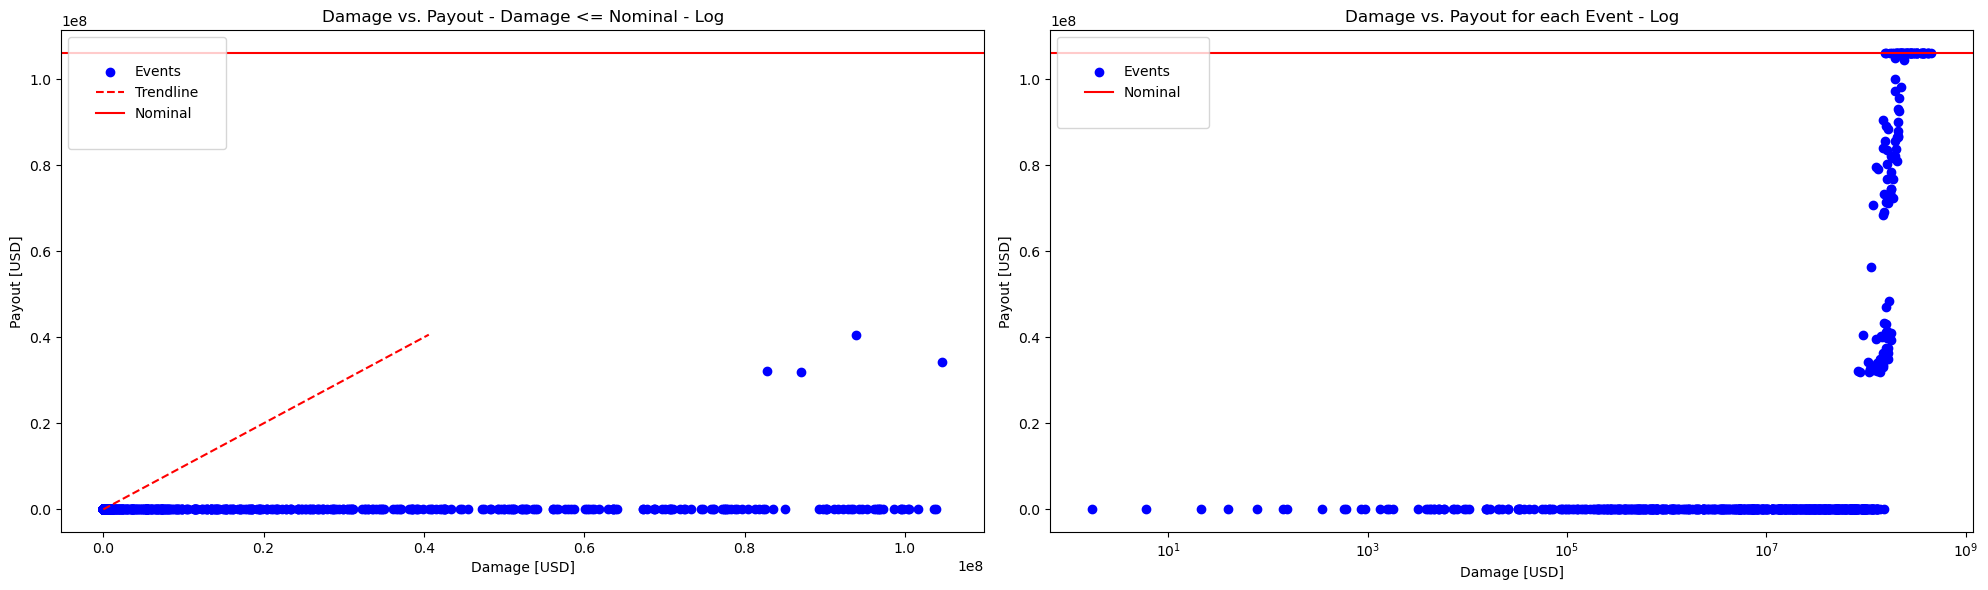

Expected Loss = 0.010397604535988529
Attachment Probability = 0.014169500566780022
The principal of the cat bond is: 114909888.88888884
Principal as percentage of GDP: 0.13
157866730.61501205

{0: (55.81294393032546, 75.38137888228836), 1: (55.56330365305938, 77.7445147076895), 2: (40.57524929221554, 71.25456454032636), 3: (50.30006983494046, 73.13253145600729), 4: (53.477509755781675, 80.14806140038199), 5: (55.91474873697822, 82.30175346555723), 6: (45.4174329367424, 74.51535081376497), 7: (50.09047029733255, 75.90476120908751), 8: (60.15202307728565, 76.04465290099827), 9: (50.005652229974565, 73.72864385532932), 10: (42.20630138300148, 74.72619493866455), 11: (50.97484492563764, 74.83522485420762), 12: (55.30538939364344, 83.40033058546972), 13: (52.46330101839382, 81.02108414160216)}


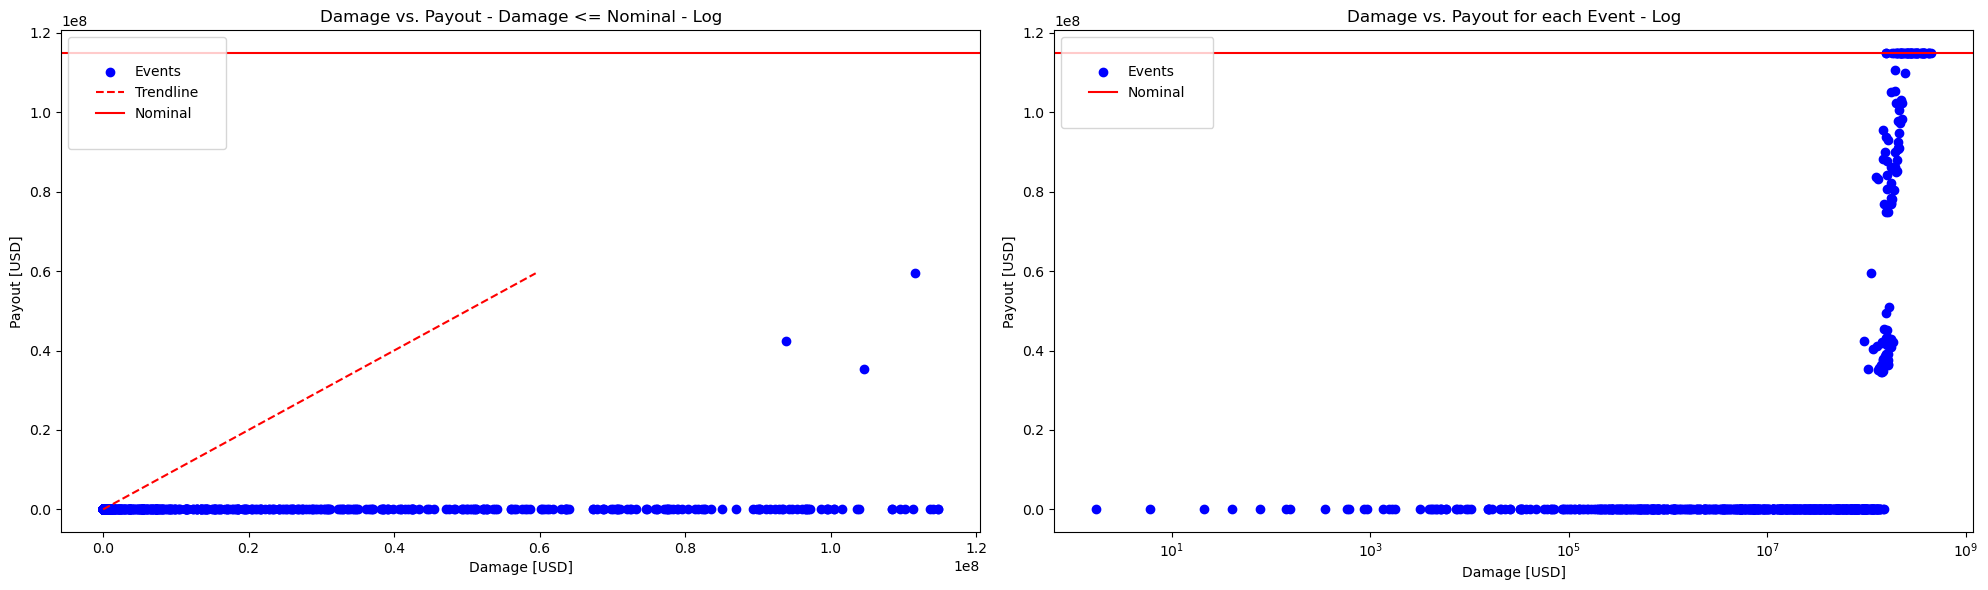

Expected Loss = 0.009715163946284964
Attachment Probability = 0.01296926051877042
The principal of the cat bond is: 123749111.11111106
Principal as percentage of GDP: 0.14
157866730.61501205

{0: (56.70403349499644, 74.02779509977033), 1: (55.743908246131134, 77.65343931771541), 2: (41.62356055342042, 70.65761738165425), 3: (51.251135389735325, 72.87194216691364), 4: (54.36742424245729, 79.86922765034319), 5: (56.295714368104726, 82.3541653330142), 6: (46.03074852501589, 74.47711973507809), 7: (50.386338817922905, 75.77865380125799), 8: (60.15214373506894, 76.0444453551453), 9: (50.865160534528435, 73.69788661592027), 10: (42.92341024278783, 74.4872713610085), 11: (51.20554835228721, 74.53937431608583), 12: (55.40471387166396, 83.49688780198137), 13: (52.050938692940484, 82.79397817912745)}


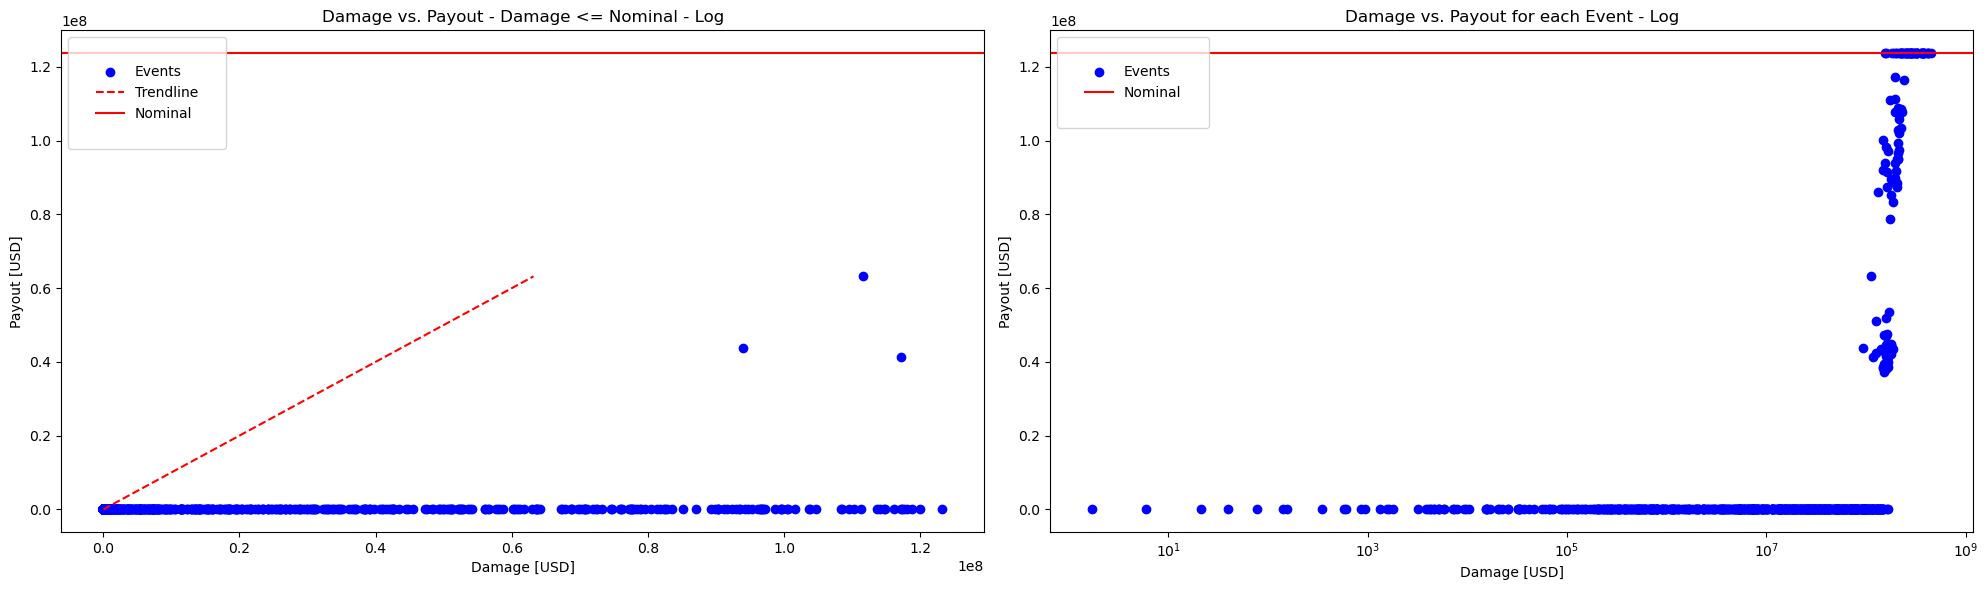

Expected Loss = 0.008915471648217014
Attachment Probability = 0.011769020470760817
The principal of the cat bond is: 132588333.33333328
Principal as percentage of GDP: 0.15000000000000002
157866730.61501205

{0: (57.0383024360926, 73.87547508640806), 1: (56.744352660808296, 77.05378797617345), 2: (41.49203120613622, 72.12020823990616), 3: (52.5239278579221, 72.28689845406609), 4: (53.91950746350961, 81.25806161209188), 5: (56.345674830665224, 82.23727872442107), 6: (45.95526756482815, 75.58498580528773), 7: (51.22413460998893, 75.48213356898837), 8: (59.96517477543458, 76.48100808644277), 9: (51.271632679821835, 74.04162996276247), 10: (43.106746170391084, 75.46601167701141), 11: (51.544043831309295, 74.31289067920213), 12: (55.5479430794008, 83.16241823131142), 13: (52.4670067156232, 82.76493574606815)}


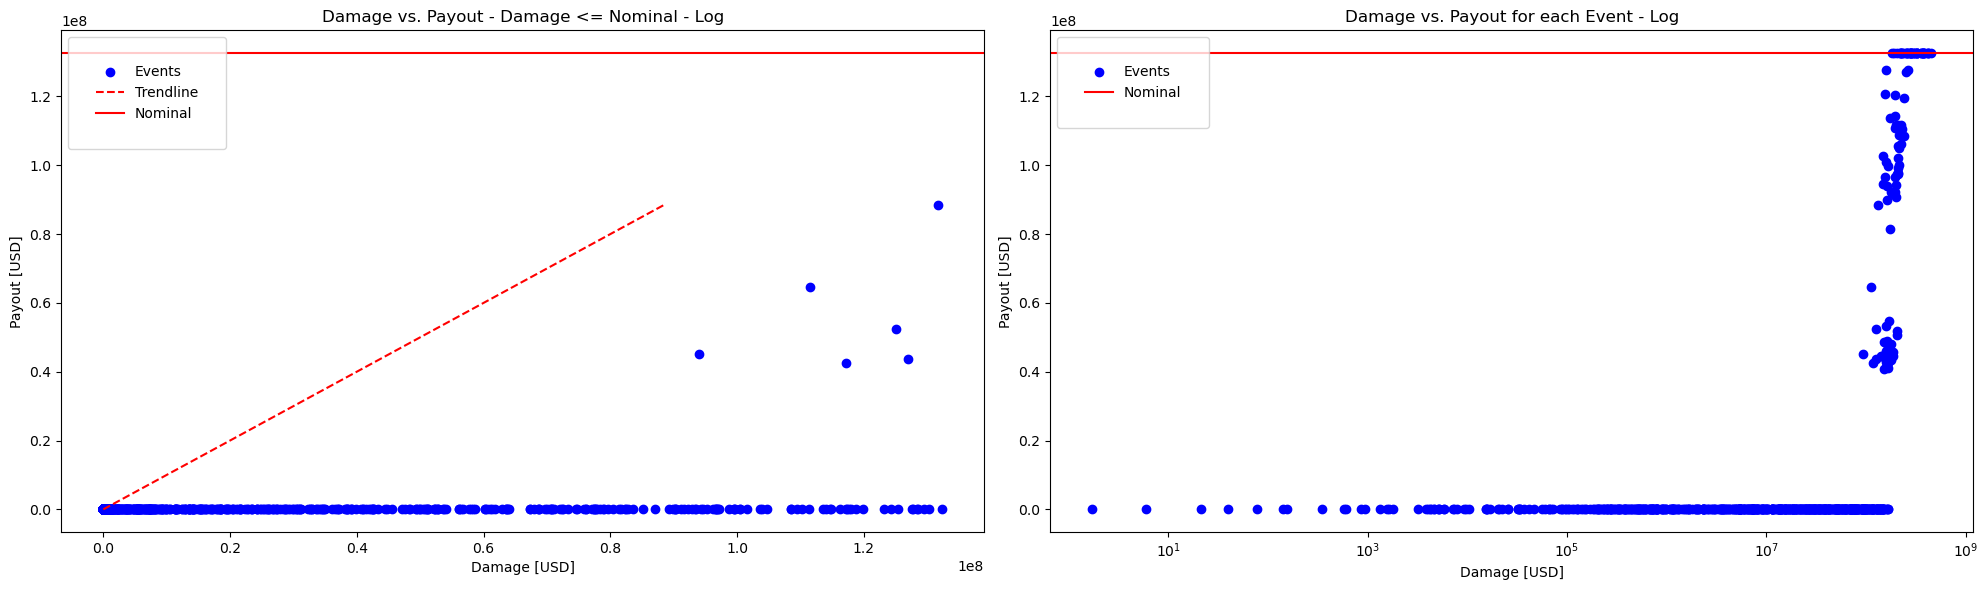

Expected Loss = 0.008433166615990976
Attachment Probability = 0.011268920450756817
The principal of the cat bond is: 141427555.5555555
Principal as percentage of GDP: 0.16000000000000003
157866730.61501205

{0: (57.440579651380816, 73.40910433312406), 1: (57.060403831309614, 76.58078516450323), 2: (42.22648564648835, 72.37089618209653), 3: (52.86828461792343, 73.01772662275181), 4: (53.97347959104869, 81.89534362846146), 5: (56.29813798928924, 82.34863541792105), 6: (47.187570017081036, 74.42458145508823), 7: (51.711768987879296, 75.10672323311356), 8: (60.262056126650165, 75.78813885512497), 9: (52.33865090969685, 73.96060500059818), 10: (43.94638258635693, 74.94927079619045), 11: (50.99647981397445, 76.22831754968126), 12: (55.88655006176881, 83.6052331074179), 13: (52.47126732982488, 83.57312477188691)}


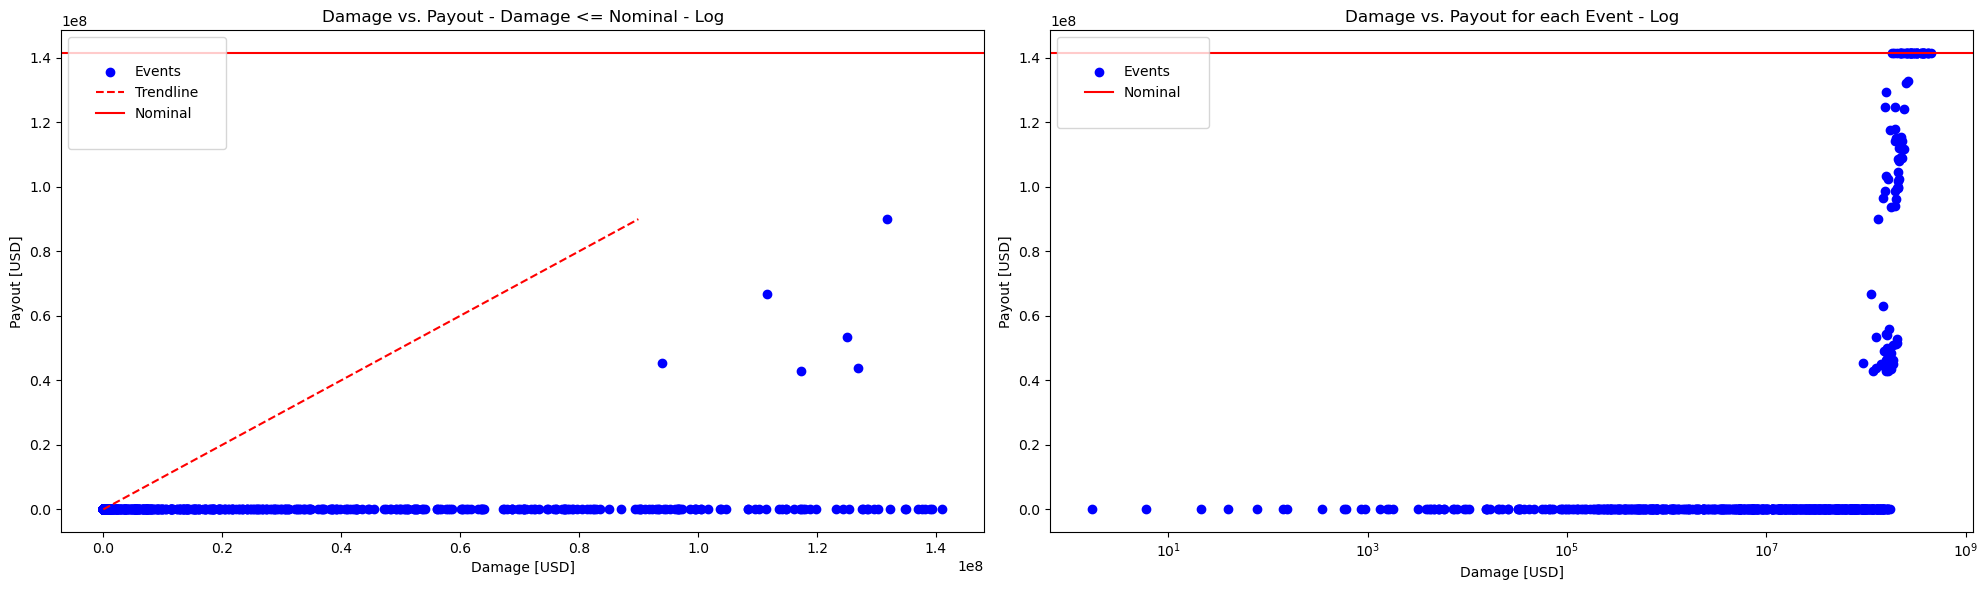

Expected Loss = 0.00794440980301514
Attachment Probability = 0.010868840434753616
The principal of the cat bond is: 150266777.7777777
Principal as percentage of GDP: 0.17
157866730.61501205

{0: (57.8084354768649, 73.47235047413983), 1: (56.01070646929374, 79.02993317062202), 2: (43.224386116904284, 71.66770981841626), 3: (52.98129108270698, 73.20950637972787), 4: (54.62108451440815, 81.0840283863244), 5: (56.33060642339825, 82.36988600783334), 6: (47.12323777753556, 74.93092235806148), 7: (50.881409238317936, 77.2973861233457), 8: (60.26205372853779, 75.78814272819668), 9: (52.11782096829757, 75.37564009251578), 10: (44.161114166088325, 75.18966420862442), 11: (51.23361015111802, 76.597065806771), 12: (56.01464894737804, 83.59096744475083), 13: (53.01623567900107, 83.47977509538958)}


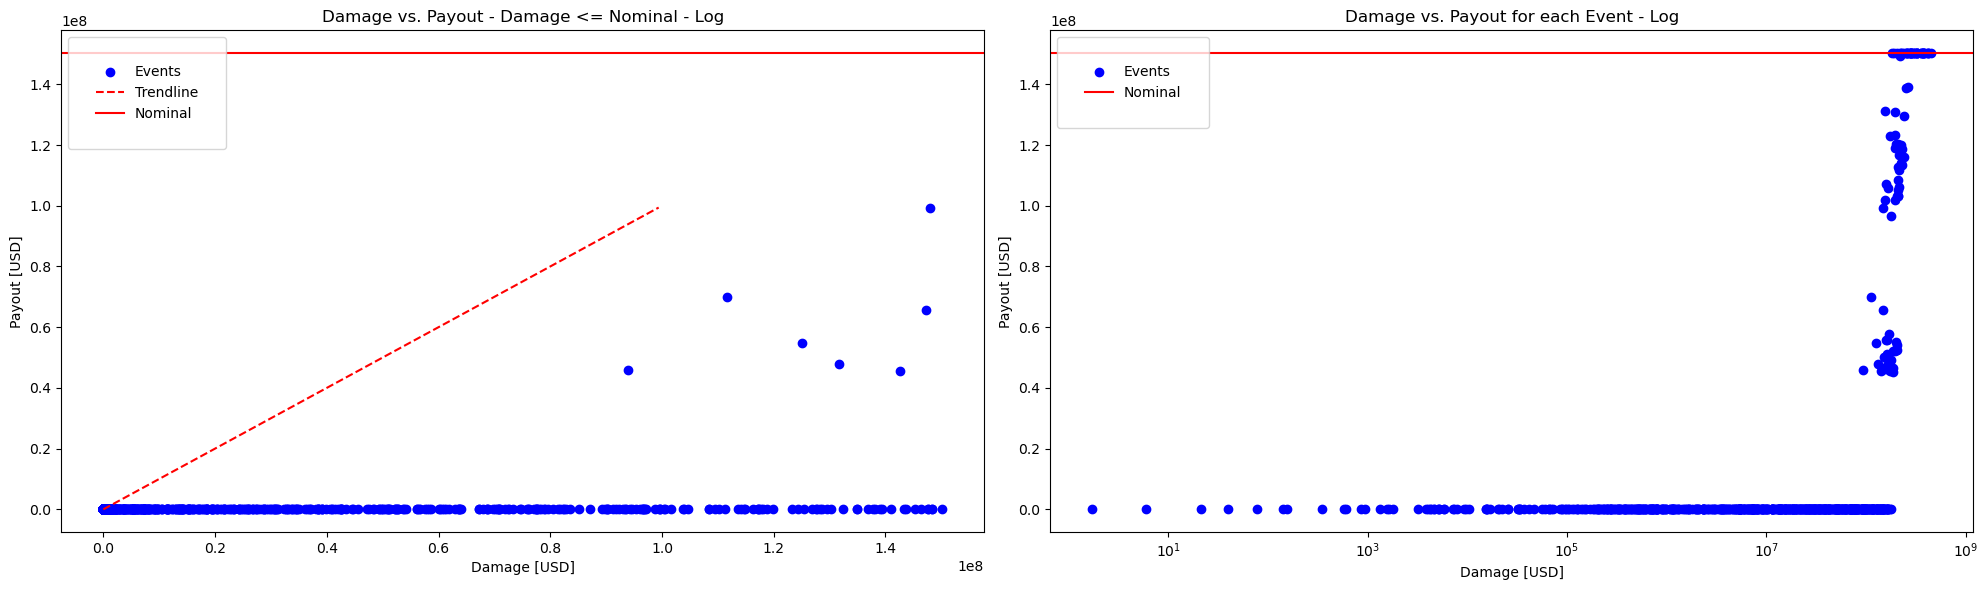

Expected Loss = 0.0074436134188865044
Attachment Probability = 0.010068680402747216
The principal of the cat bond is: 159105999.99999994
Principal as percentage of GDP: 0.18000000000000002
{0: (57.92601406416339, 73.55877926716009), 1: (56.91879763835732, 76.97666244096214), 2: (42.52819612874889, 73.65002651729408), 3: (53.26111152245481, 73.17168716322936), 4: (54.81150186230303, 80.63983189045742), 5: (56.330412939065184, 82.36991433573532), 6: (48.13602761338659, 73.90436992311025), 7: (51.380333887549, 76.90827177502305), 8: (60.26205394709312, 75.7881423781844), 9: (51.78464362154723, 76.3283802056206), 10: (44.68269243717868, 75.09248340850382), 11: (51.738431018669054, 77.4794307643343), 12: (55.8009618140067, 84.08933858810362), 13: (52.26679682716161, 85.2281865584116)}


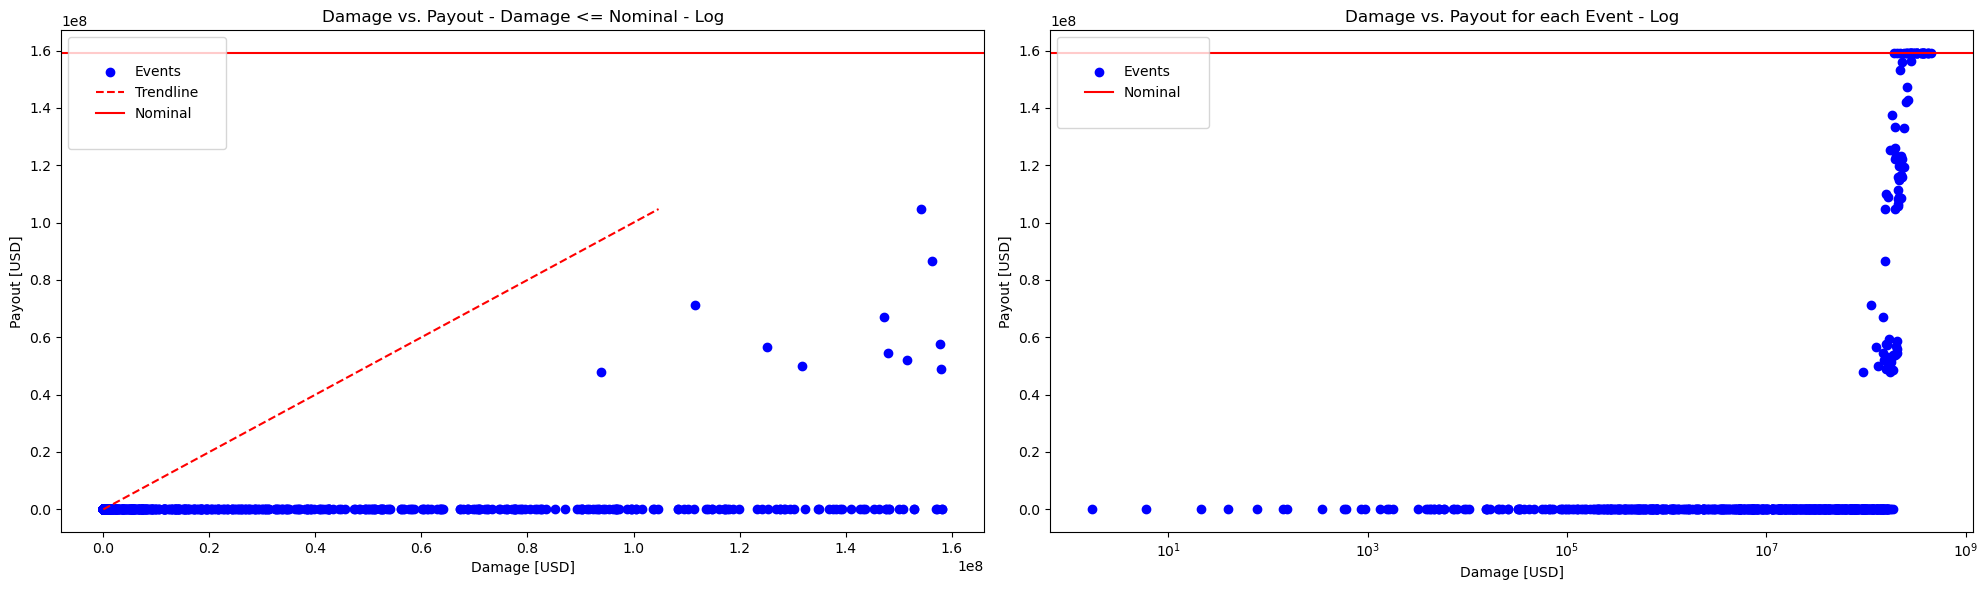

Expected Loss = 0.007080390801896329
Attachment Probability = 0.009768620390744815
The principal of the cat bond is: 167945222.22222212
Principal as percentage of GDP: 0.19
{0: (58.492292080232126, 73.58938482569998), 1: (56.92444765058966, 77.13678861377997), 2: (43.058689630532704, 73.25068736625236), 3: (53.34368476319626, 73.43360278714606), 4: (55.231249267388314, 81.3302007510173), 5: (56.332836907072945, 82.36443798979303), 6: (47.81203087873144, 75.13640345609008), 7: (51.74170307434548, 77.10329130275362), 8: (60.257197801591055, 75.79944022323996), 9: (52.94827119664892, 75.07722508411574), 10: (44.954061230680196, 75.13769533997059), 11: (51.70241071983402, 77.80996322833363), 12: (55.910210284285455, 83.84646922191719), 13: (52.277731854936064, 85.25160902772475)}


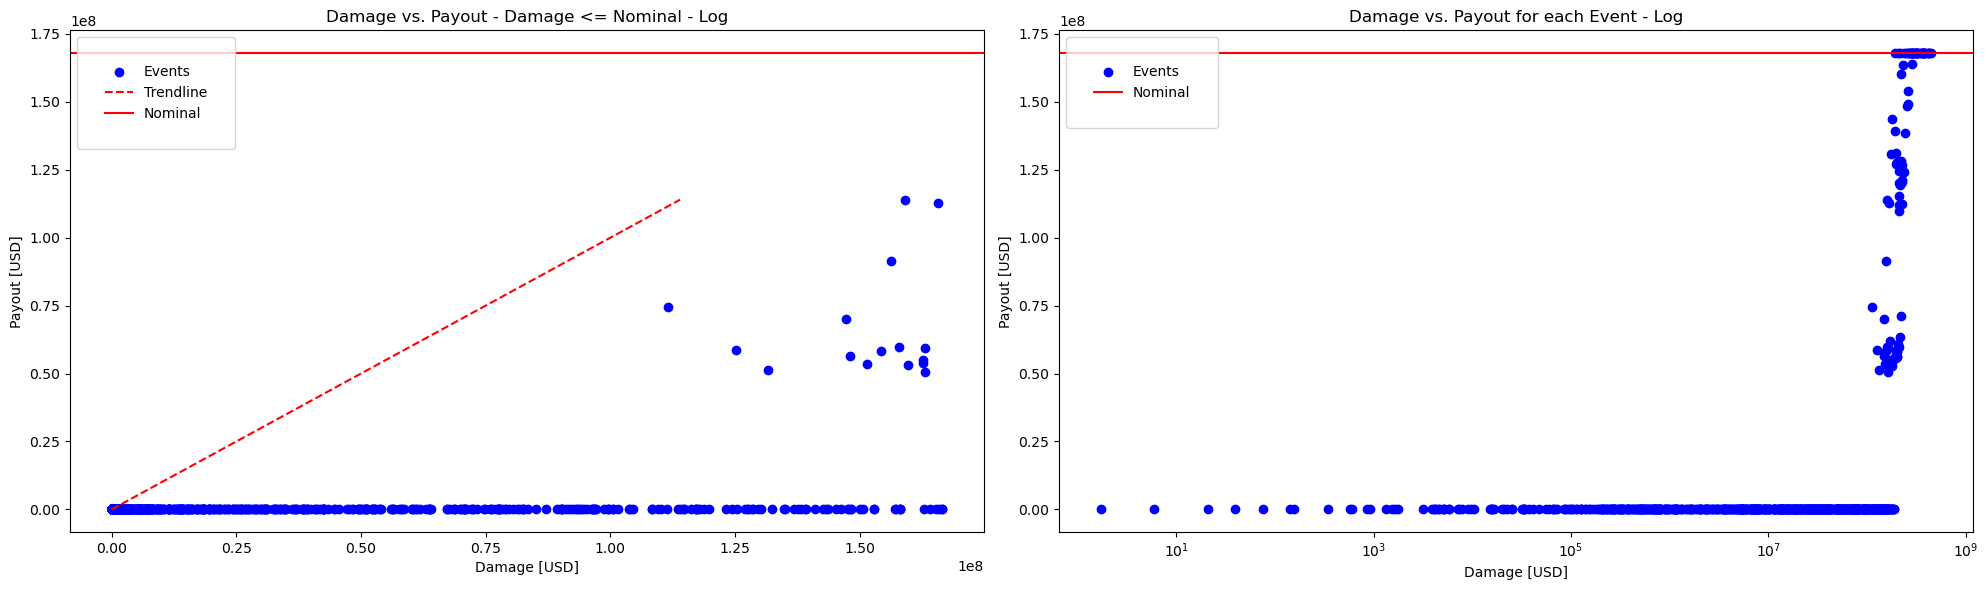

Expected Loss = 0.0066679497120003366
Attachment Probability = 0.009068480362739214
The principal of the cat bond is: 176784444.44444436
Principal as percentage of GDP: 0.2
{0: (58.53115704530381, 73.61935503590239), 1: (56.82988729594782, 78.37085030703696), 2: (43.39893700759525, 73.94921830855662), 3: (54.28039790721626, 72.53395960065224), 4: (55.38266756535835, 81.94670072271344), 5: (56.29063803970965, 82.46273017555114), 6: (47.93496725097872, 76.33191382670111), 7: (51.81740589330617, 77.29458575587127), 8: (60.257111978071684, 75.79956496895436), 9: (52.83772225321451, 75.57458473253047), 10: (45.12055633054235, 75.48822222055945), 11: (51.970744057494386, 77.69120499840386), 12: (55.95924120841963, 83.73181975874571), 13: (53.043766482523104, 84.76873832079457)}


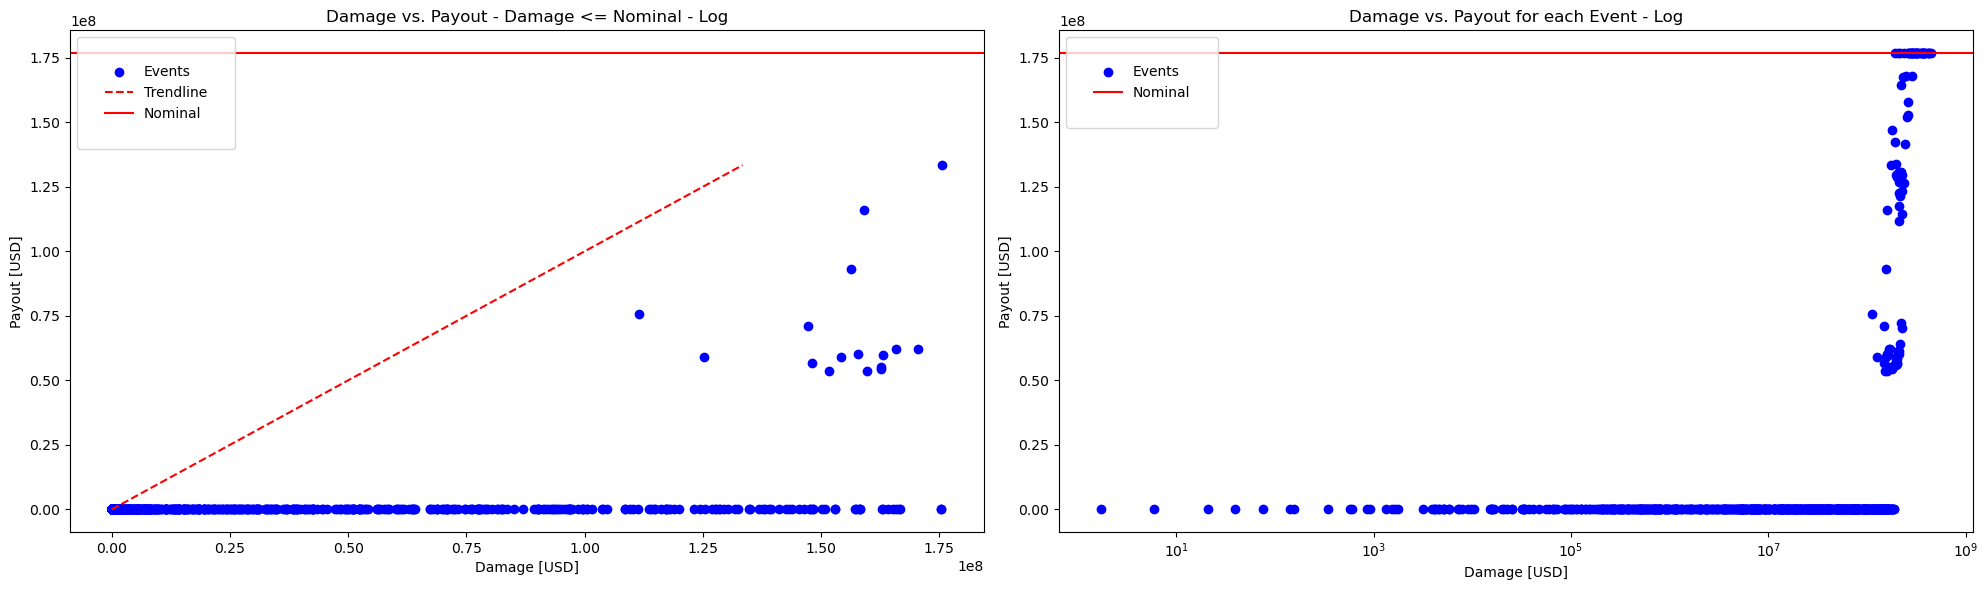

Expected Loss = 0.006376259933282394
Attachment Probability = 0.008768420350736814


In [53]:
premium_simulation_ps_c2, returns_ps_c2, premium_dic_c2, nom_arr_c2, pay_dam_df_ps_c2, es_metrics_ps_c2, int_grid_c2, imp_per_event_flt_c2, imp_admin_evt_flt_c2 = bond_fct.init_sng_cty_bond(country_2, prot_share_arr, lower_rp, rf_rate, requ_sharpe_ratio, True, True)

## Designe Multi-Country Bond
### Set Variables for Multi-Country Bond

In [65]:
nominal_pool = [e1 + e2 for e1, e2 in zip(nom_arr_c1, nom_arr_c2)]
nominal_dic = [nom_arr_c1, nom_arr_c2]
pay_dam_df_dic_ps = {country_1: pay_dam_df_ps_c1,
                     country_2: pay_dam_df_ps_c2}
int_grid_dic = {country_1: int_grid_c1,
                country_2: int_grid_c2}
damages_grid_flt_dic = {country_1: imp_admin_evt_flt_c1,
                        country_2: imp_admin_evt_flt_c2}
damages_evt_flt_dic = {country_1: imp_per_event_flt_c1,
                       country_2: imp_per_event_flt_c2}

### Create Multi-Country bond

In [91]:
premium_simulation_ps_pool, returns_ps_pool, tot_coverage_prem_cty_ps_pool, premium_dic_pool, nominal_arr_pool, es_metrics_ps_pool, MES_cty_ps_pool = bond_fct.init_mlt_cty_bond(countries, pay_dam_df_dic_ps, prot_share_arr, nominal_dic, rf_rate, requ_sharpe_ratio, int_grid_dic, damages_grid_flt_dic, damages_evt_flt_dic, True)

Expected Loss = 3.3340001333600056e-05
Attachment Probability = 0.0001333600053344002
12250391.966109099
Expected Loss = 0.039051427355169484
Attachment Probability = 0.05544442221777688
Expected Loss = 3.3340001333600056e-05
Attachment Probability = 0.0001333600053344002
24500783.932218198
Expected Loss = 0.03592158744468827
Attachment Probability = 0.05317730212709208
Expected Loss = 3.3340001333600056e-05
Attachment Probability = 6.66800026672001e-05
36751175.8983273
Expected Loss = 0.030926882018980303
Attachment Probability = 0.047309461892378474
Expected Loss = 3.3340001333600056e-05
Attachment Probability = 6.66800026672001e-05
49001567.864436395
Expected Loss = 0.026846798810117107
Attachment Probability = 0.04240848169633927
Expected Loss = 3.3340001333600056e-05
Attachment Probability = 0.00010002000400080016
61251959.83054551
Expected Loss = 0.023646490418894366
Attachment Probability = 0.03780756151230246
Expected Loss = 3.3340001333600056e-05
Attachment Probability = 0.000

## Analyze Multi-Country vs. Single-Country Bonds

### Premiums

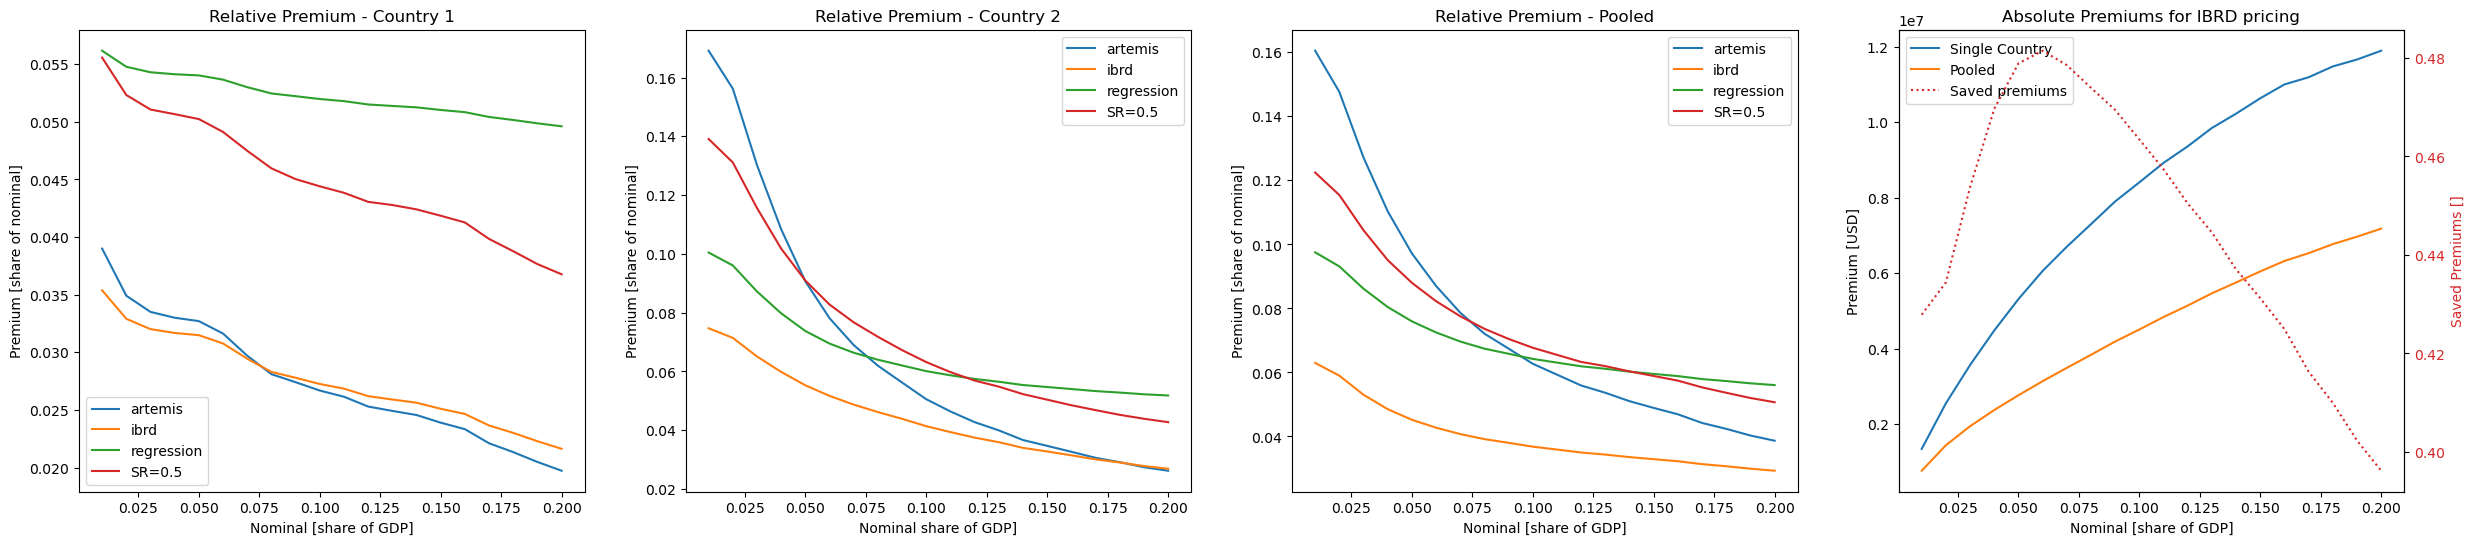

In [176]:
artemis_arr_174 = []
ibrd_arr_174 = []
regression_arr_174 = []
required_arr_174 = []
artemis_arr_662 = []
ibrd_arr_662 = []
regression_arr_662 = []
required_arr_662 = []
requ_prem_pool = []
ibrd_pool = []
artemis_pool = []
regression_pool = []
exp_loss_174 = []
exp_loss_662 = []
exp_loss_pool_arr = []

for ps_share in prot_share_arr:
    ps_str = str(ps_share)

    artemis_arr_174.append(premium_dic_c1[ps_str]['artemis'])
    ibrd_arr_174.append(premium_dic_c1[ps_str]['ibrd'])
    regression_arr_174.append(premium_dic_c1[ps_str]['regression'])
    required_arr_174.append(premium_dic_c1[ps_str]['required'])

    artemis_arr_662.append(premium_dic_c2[ps_str]['artemis'])
    ibrd_arr_662.append(premium_dic_c2[ps_str]['ibrd'])
    regression_arr_662.append(premium_dic_c2[ps_str]['regression'])
    required_arr_662.append(premium_dic_c2[ps_str]['required'])

    requ_prem_pool.append(premium_dic_pool[ps_str]['required'])
    ibrd_pool.append(premium_dic_pool[ps_str]['ibrd'])
    artemis_pool.append(premium_dic_pool[ps_str]['artemis'])
    regression_pool.append(premium_dic_pool[ps_str]['regression'])

    exp_loss_174.append(premium_dic_c1[ps_str]['exp_loss'])
    exp_loss_662.append(premium_dic_c2[ps_str]['exp_loss'])
    exp_loss_pool_arr.append(premium_dic_pool[ps_str])


abs_prem_174  = [e1 * e2 for e1, e2 in zip(required_arr_174, nom_arr_c1)]
abs_prem_662  = [e1 * e2 for e1, e2 in zip(required_arr_662, nom_arr_c1)]
abs_prem_sng  = [e1 + e2 for e1, e2 in zip(abs_prem_174, abs_prem_662)]
abs_prem_pool  = [e1 * e2 for e1, e2 in zip(requ_prem_pool, nominal_arr_pool)]
diff_prem  = [(e1 - e2) / e1 for e1, e2 in zip(abs_prem_sng, abs_prem_pool)]

abs_prem_ibrd_174  = [e1 * e2 for e1, e2 in zip(ibrd_arr_174, nom_arr_c1)]
abs_prem_ibrd_662  = [e1 * e2 for e1, e2 in zip(ibrd_arr_662, nom_arr_c1)]
abs_prem_ibrd_sng  = [e1 + e2 for e1, e2 in zip(abs_prem_ibrd_174, abs_prem_ibrd_662)]
abs_prem_ibrd_pool  = [e1 * e2 for e1, e2 in zip(ibrd_pool, nominal_arr_pool)]
diff_prem_ibrd  = [(e1 - e2) / e1 for e1, e2 in zip(abs_prem_ibrd_sng, abs_prem_ibrd_pool)]



fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 6))

ax1.plot(prot_share_arr, artemis_arr_174, label='artemis')
ax1.plot(prot_share_arr, ibrd_arr_174, label='ibrd')
ax1.plot(prot_share_arr, regression_arr_174, label='regression')
ax1.plot(prot_share_arr, required_arr_174, label=f'SR={requ_sharpe_ratio}')
ax1.set_xlabel('Nominal [share of GDP]')
ax1.set_ylabel('Premium [share of nominal]')
ax1.set_title('Relative Premium - Country 1')
ax1.legend()

ax2.plot(prot_share_arr, artemis_arr_662, label='artemis')
ax2.plot(prot_share_arr, ibrd_arr_662, label='ibrd')
ax2.plot(prot_share_arr, regression_arr_662, label='regression')
ax2.plot(prot_share_arr, required_arr_662, label=f'SR={requ_sharpe_ratio}')
ax2.set_xlabel('Nominal [share of GDP]')
ax2.set_ylabel('Premium [share of nominal]')
ax2.set_title('Relative Premium - Country 2')
ax2.legend()

ax3.plot(prot_share_arr, artemis_pool, label='artemis')
ax3.plot(prot_share_arr, ibrd_pool, label='ibrd')
ax3.plot(prot_share_arr, regression_pool, label='regression')
ax3.plot(prot_share_arr, requ_prem_pool, label=f'SR={requ_sharpe_ratio}')
ax3.set_xlabel('Nominal [share of GDP]')
ax3.set_ylabel('Premium [share of nominal]')
ax3.set_title('Relative Premium - Pooled')
ax3.legend()

ax4.plot(prot_share_arr, abs_prem_ibrd_sng, label='Single Country')
ax4.plot(prot_share_arr, abs_prem_ibrd_pool, label='Pooled')
ax4.set_xlabel('Nominal [share of GDP]')
ax4.set_ylabel('Premium [USD]')
ax4.set_title('Absolute Premiums for IBRD pricing')
ax4.legend()

color='tab:red'
ax5 = ax4.twinx()  # instantiate a second Axes that shares the same x-axis
ax5.set_ylabel('Saved Premiums []', color=color)  # we already handled the x-label with ax1
ax5.plot(prot_share_arr, diff_prem_ibrd, linestyle='dotted', label='Saved premiums', color=color)
ax5.tick_params(axis='y', labelcolor=color)

lines1, labels1 = ax4.get_legend_handles_labels()  
lines2, labels2 = ax5.get_legend_handles_labels()  

ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

### Coverage

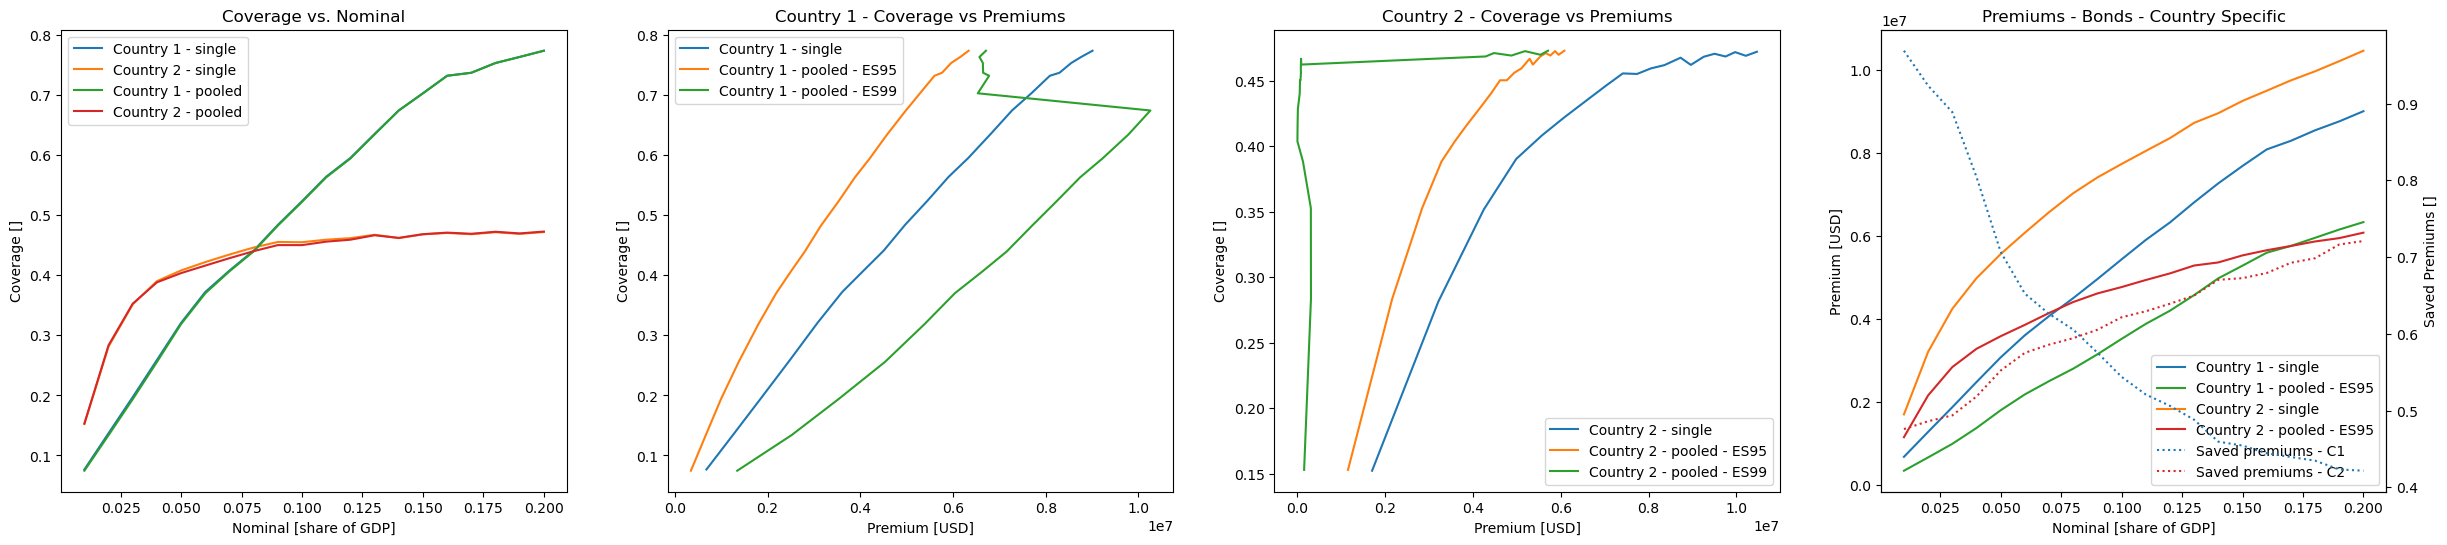

In [167]:
cov_174 = []
cov_662 = []
cov_pool_174 = []
cov_pool_662 = []
abs_prem_pool_99_174 = []
abs_prem_pool_99_662 = []
abs_prem_pool_95_174 = []
abs_prem_pool_95_662 = []


for i in range(len(prot_share_arr)):
    ps_str = str(prot_share_arr[i])

    cov_174.append(np.mean(premium_simulation_ps_c1[ps_str]['Coverage']))
    cov_662.append(np.mean(premium_simulation_ps_c2[ps_str]['Coverage']))    
    cov_pool_174.append(np.mean(tot_coverage_prem_cty_ps_pool[ps_str]['174']['coverage']))
    cov_pool_662.append(np.mean(tot_coverage_prem_cty_ps_pool[ps_str]['659']['coverage']))

    abs_prem_pool_95_174.append(MES_cty_ps_pool[ps_str][0]['95'] / es_metrics_ps_pool[ps_str]['ES_95_ann'] * premium_dic_pool[ps_str]['required'] * nominal_arr_pool[i])
    abs_prem_pool_95_662.append(MES_cty_ps_pool[ps_str][1]['95'] / es_metrics_ps_pool[ps_str]['ES_95_ann'] * premium_dic_pool[ps_str]['required'] * nominal_arr_pool[i])
    abs_prem_pool_99_174.append(MES_cty_ps_pool[ps_str][0]['99'] / es_metrics_ps_pool[ps_str]['ES_99_ann'] * premium_dic_pool[ps_str]['required'] * nominal_arr_pool[i])
    abs_prem_pool_99_662.append(MES_cty_ps_pool[ps_str][1]['99'] / es_metrics_ps_pool[ps_str]['ES_99_ann'] * premium_dic_pool[ps_str]['required'] * nominal_arr_pool[i])

diff_prem_c1  = [(e1 - e2) / e2 for e1, e2 in zip(abs_prem_174, abs_prem_pool_95_174)]
diff_prem_c2  = [(e1 - e2) / e2 for e1, e2 in zip(abs_prem_662, abs_prem_pool_95_662)]


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 6))

ax1.plot(prot_share_arr, cov_174, label='Country 1 - single')
ax1.plot(prot_share_arr, cov_662, label='Country 2 - single')
ax1.plot(prot_share_arr, cov_pool_174, label='Country 1 - pooled')
ax1.plot(prot_share_arr, cov_pool_662, label='Country 2 - pooled')
ax1.set_xlabel('Nominal [share of GDP]')
ax1.set_ylabel('Coverage []')
ax1.set_title('Coverage vs. Nominal')
ax1.legend()

ax2.plot(abs_prem_174, cov_174, label='Country 1 - single')
ax2.plot(abs_prem_pool_95_174, cov_pool_174, label='Country 1 - pooled - ES95')
ax2.plot(abs_prem_pool_99_174, cov_pool_174, label='Country 1 - pooled - ES99')
ax2.set_xlabel('Premium [USD]')
ax2.set_ylabel('Coverage []')
ax2.set_title('Country 1 - Coverage vs Premiums')
ax2.legend()

ax3.plot(abs_prem_662, cov_662, label='Country 2 - single')
ax3.plot(abs_prem_pool_95_662, cov_pool_662, label='Country 2 - pooled - ES95')
ax3.plot(abs_prem_pool_99_662, cov_pool_662, label='Country 2 - pooled - ES99')
ax3.set_xlabel('Premium [USD]')
ax3.set_ylabel('Coverage []')
ax3.set_title('Country 2 - Coverage vs Premiums')
ax3.legend()

ax4.plot(prot_share_arr, abs_prem_174, color='tab:blue', label='Country 1 - single')
ax4.plot(prot_share_arr, abs_prem_pool_95_174, color='tab:green', label='Country 1 - pooled - ES95')
ax4.plot(prot_share_arr, abs_prem_662, color='tab:orange', label='Country 2 - single')
ax4.plot(prot_share_arr, abs_prem_pool_95_662, color='tab:red', label='Country 2 - pooled - ES95')
ax4.set_xlabel('Nominal [share of GDP]')
ax4.set_ylabel('Premium [USD]')
ax4.set_title('Premiums - Bonds - Country Specific')

ax5 = ax4.twinx()  # instantiate a second Axes that shares the same x-axis
ax5.set_ylabel('Saved Premiums []')  # we already handled the x-label with ax1
ax5.plot(prot_share_arr, diff_prem_c1, linestyle='dotted', label='Saved premiums - C1', color='tab:blue')
ax5.plot(prot_share_arr, diff_prem_c2, linestyle='dotted', label='Saved premiums - C2', color='tab:red')
ax5.tick_params(axis='y')

lines1, labels1 = ax4.get_legend_handles_labels()  
lines2, labels2 = ax5.get_legend_handles_labels()  

ax4.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

plt.show()

### Performance

In [97]:
shp_rat_requ_prem_prot = []
shp_rat_ibrd_prem_prot = []
shp_rat_c1 = []
shp_rat_c2 = []
requ_prem_returns_pool = {}

for i in range(len(prot_share_arr)):
    ps_str = str(prot_share_arr[i])
    ps_ibrd_prem_174, ret_ibrd_prem_174 = sb.init_bond_simulation(pay_dam_df_ps_c1[ps_str], ibrd_arr_174[i], rf_rate, nom_arr_c1[i]) #simulate cat bond using a Monte Carlo simulation
    ps_ibrd_prem_662, ret_ibrd_prem_662 = sb.init_bond_simulation(pay_dam_df_ps_c2[ps_str], ibrd_arr_662[i], rf_rate, nom_arr_c2[i]) #simulate cat bond using a Monte Carlo simulation
    ann_returns_requ_prem_sng = ((returns_ps_c1[ps_str]['Annual'][0] * nom_arr_c1[i]) + (returns_ps_c2[ps_str]['Annual'][0] * nom_arr_c2[i])) / (nom_arr_c1[i] + nom_arr_c2[i])
    ann_returns_ibrd_prem_sng = ((ret_ibrd_prem_174['Annual'][0] * nom_arr_c1[i]) + (ret_ibrd_prem_662['Annual'][0] * nom_arr_c2[i])) / (nom_arr_c1[i] + nom_arr_c2[i])
    shp_rat_requ_prem_prot.append(sb.init_sharpe_ratio(ann_returns_requ_prem_sng, rf_rate))
    shp_rat_ibrd_prem_prot.append(sb.init_sharpe_ratio(ann_returns_ibrd_prem_sng, rf_rate))
    shp_rat_c1.append(sb.init_sharpe_ratio(returns_ps_c1[ps_str]['Annual'][0], rf_rate))
    shp_rat_c2.append(sb.init_sharpe_ratio(returns_ps_c2[ps_str]['Annual'][0], rf_rate))

    pay_dam_df_dic = {country_1: pay_dam_df_ps_c1[ps_str],
                      country_2: pay_dam_df_ps_c2[ps_str]}
    requ_prem_metrics_pool, requ_prem_returns_pool[ps_str], requ_prem_tot_coverage_pool_cty = smcb.init_bond_simulation(pay_dam_df_dic, requ_prem_pool[i], rf_rate, nominal_pool[i], countries)

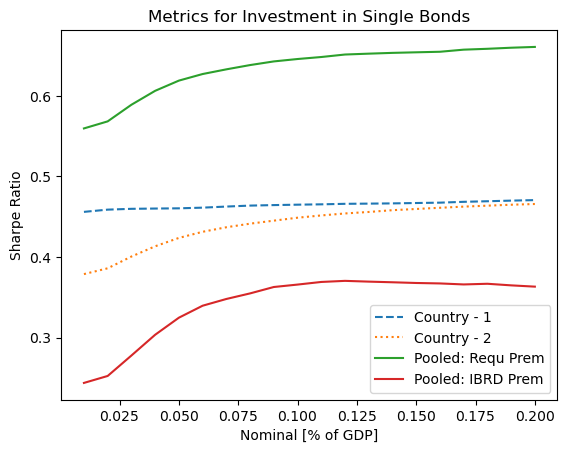

In [98]:
plt.plot(prot_share_arr, shp_rat_c1, linestyle='dashed', label='Country - 1')
plt.plot(prot_share_arr, shp_rat_c2, linestyle='dotted', label='Country - 2')
plt.plot(prot_share_arr, shp_rat_requ_prem_prot, label='Pooled: Requ Prem')
plt.plot(prot_share_arr, shp_rat_ibrd_prem_prot, label='Pooled: IBRD Prem')
plt.xlabel('Nominal [% of GDP]')
plt.ylabel('Sharpe Ratio')
plt.title('Metrics for Investment in Single Bonds')
plt.legend()
plt.show()

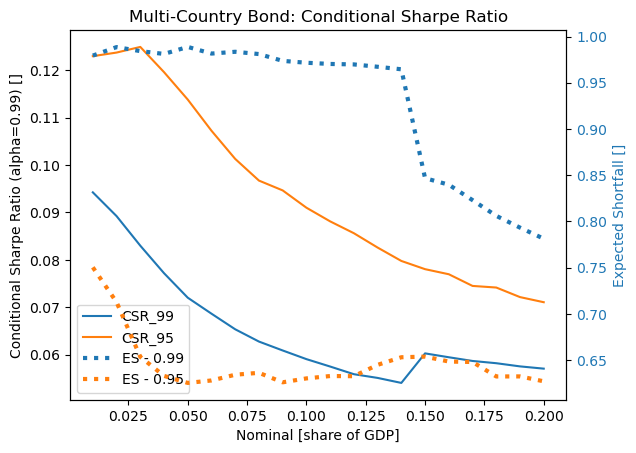

In [116]:
CSR_99 = []
CSR_95 = []
es_99_pool = []
es_95_pool = []

for ps_share in prot_share_arr:
    ps_str = str(ps_share) 
    ES_99_nom = es_metrics_ps_pool[ps_str]['ES_99_ann']
    ES_95_nom = es_metrics_ps_pool[ps_str]['ES_95_ann']

    es_99_pool.append(ES_99_nom)
    es_95_pool.append(ES_95_nom)
    
    CSR_99.append(smcb.init_sharpe_ratio(requ_prem_returns_pool[ps_str]['Annual'][0], rf_rate, ES_99_nom))
    CSR_95.append(smcb.init_sharpe_ratio(requ_prem_returns_pool[ps_str]['Annual'][0], rf_rate, ES_95_nom))

fig, ax1 = plt.subplots()

ax1.plot(prot_share_arr, CSR_99, label='CSR_99')
ax1.plot(prot_share_arr, CSR_95, label='CSR_95')
ax1.set_title('Multi-Country Bond: Conditional Sharpe Ratio')
ax1.set_xlabel('Nominal [share of GDP]')
ax1.set_ylabel('Conditional Sharpe Ratio (alpha=0.99) []')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color = 'tab:blue'
color1 = 'tab:orange'
ax2.set_ylabel('Expected Shortfall []', color=color) 
ax2.plot(prot_share_arr, es_99_pool, color=color, linestyle='dotted', linewidth='3.0', label='ES - 0.99')
ax2.plot(prot_share_arr, es_95_pool, color=color1, linestyle='dotted', linewidth='3.0', label='ES - 0.95')
ax2.tick_params(axis='y', labelcolor=color)

lines1, labels1 = ax1.get_legend_handles_labels()  
lines2, labels2 = ax2.get_legend_handles_labels()  

ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left')
plt.show()

### Cost-Benefit

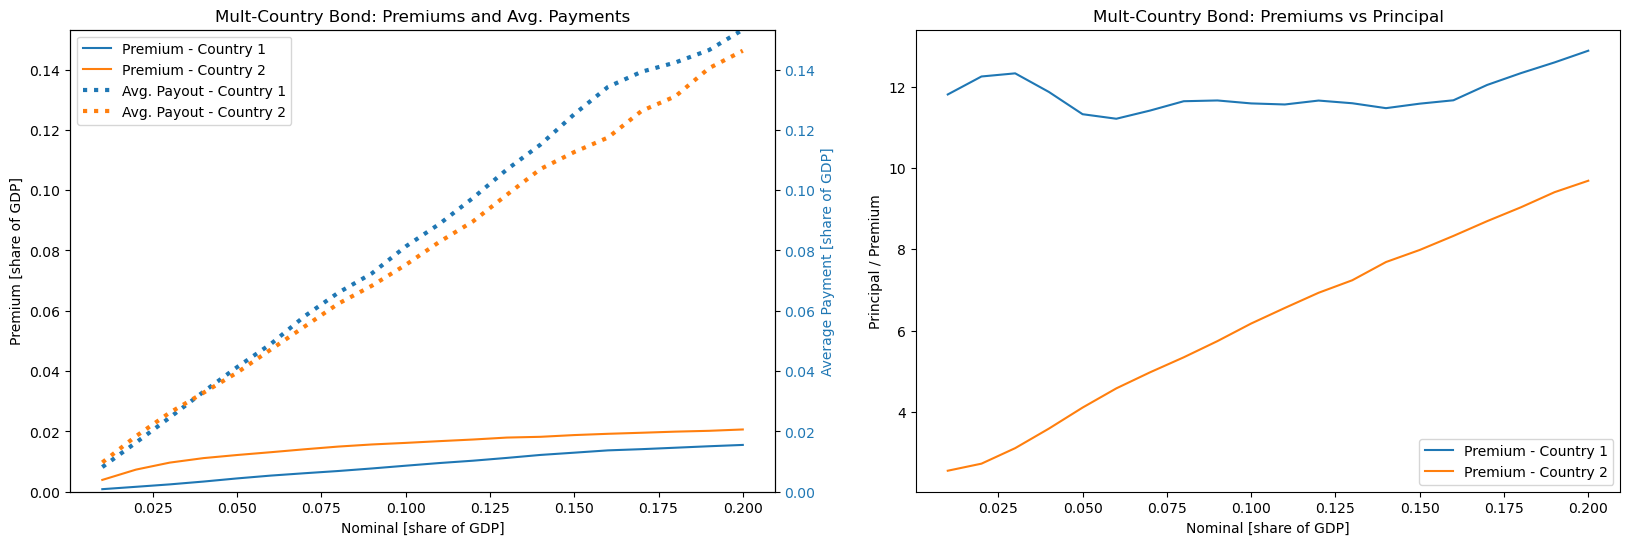

In [153]:
tot_exp_174 = nom_arr_c1[19] / prot_share_arr[19] 
tot_exp_662 = nom_arr_c2[19] / prot_share_arr[19] 


avg_pay_rel_gdp_174 = []
avg_pay_rel_gdp_662 = []
avg_pay_abs_174 = []
avg_pay_abs_662 = []
avg_pay_prot = []


for i in range(len(prot_share_arr)):
    ps_str = str(prot_share_arr[i])
    avg_pay_prot.append(premium_simulation_ps_pool[ps_str]['Average Payments'].mean())
    avg_pay_rel_gdp_174.append(np.sum(tot_coverage_prem_cty_ps_pool[ps_str]['174']['payout']) / (num_simulations - tot_coverage_prem_cty_ps_pool[ps_str]['174']['count_zero']) / tot_exp_174)
    avg_pay_rel_gdp_662.append(np.sum(tot_coverage_prem_cty_ps_pool[ps_str]['659']['payout']) / (num_simulations - tot_coverage_prem_cty_ps_pool[ps_str]['659']['count_zero']) / tot_exp_662)
    avg_pay_abs_174.append(np.sum(tot_coverage_prem_cty_ps_pool[ps_str]['174']['payout']) / (num_simulations - tot_coverage_prem_cty_ps_pool[ps_str]['174']['count_zero']))
    avg_pay_abs_662.append(np.sum(tot_coverage_prem_cty_ps_pool[ps_str]['659']['payout']) / (num_simulations - tot_coverage_prem_cty_ps_pool[ps_str]['659']['count_zero']))

rel_prem_pool_95_174 = (np.array(abs_prem_pool_95_174)*3/tot_exp_174)
rel_prem_pool_95_662 = (np.array(abs_prem_pool_95_662)*3/tot_exp_662)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(prot_share_arr, rel_prem_pool_95_174, label='Premium - Country 1')
ax1.plot(prot_share_arr, rel_prem_pool_95_662, label='Premium - Country 2')
ax1.set_xlabel('Nominal [share of GDP]')
ax1.set_ylabel('Premium [share of GDP]')
ax1.set_title('Mult-Country Bond: Premiums and Avg. Payments')
ax1.set_ylim(0,np.max(avg_pay_rel_gdp_174))
ax1.tick_params(axis='y')

ax1_1 = ax1.twinx() 

color = 'tab:blue'
color1 = 'tab:orange'
ax1_1.set_ylabel('Average Payment [share of GDP]', color=color) 
ax1_1.plot(prot_share_arr, avg_pay_rel_gdp_174, color=color, linestyle='dotted', linewidth='3.0', label='Avg. Payout - Country 1')
ax1_1.plot(prot_share_arr, avg_pay_rel_gdp_662, color=color1, linestyle='dotted', linewidth='3.0', label='Avg. Payout - Country 2')
ax1_1.set_ylim(0,np.max(avg_pay_rel_gdp_174))
ax1_1.tick_params(axis='y', labelcolor=color)

lines1, labels1 = ax1.get_legend_handles_labels()  
lines2, labels2 = ax1_1.get_legend_handles_labels()  

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax2.plot(prot_share_arr, prot_share_arr/rel_prem_pool_95_174, label='Premium - Country 1')
ax2.plot(prot_share_arr, prot_share_arr/rel_prem_pool_95_662, label='Premium - Country 2')
ax2.set_xlabel('Nominal [share of GDP]')
ax2.set_ylabel('Principal / Premium')
ax2.set_title('Mult-Country Bond: Premiums vs Principal')

ax2.legend()

plt.show()

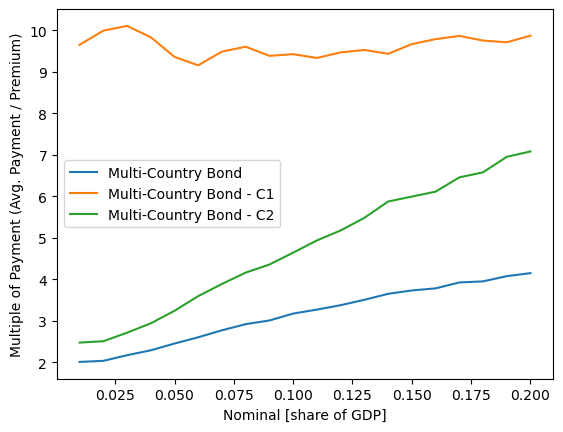

In [106]:
pay_multip  = [e1 / e2 for e1, e2 in zip(avg_pay_prot, np.array(abs_prem_pool)*3)]
pay_multip_174  = [e1 / e2 for e1, e2 in zip(avg_pay_abs_174, np.array(abs_prem_pool_95_174)*3)]
pay_multip_662  = [e1 / e2 for e1, e2 in zip(avg_pay_abs_662, np.array(abs_prem_pool_95_662)*3)]


plt.plot(prot_share_arr, pay_multip, label='Multi-Country Bond')
plt.plot(prot_share_arr, pay_multip_174, label='Multi-Country Bond - C1')
plt.plot(prot_share_arr, pay_multip_662, label='Multi-Country Bond - C2')

plt.xlabel('Nominal [share of GDP]')
plt.ylabel('Multiple of Payment (Avg. Payment / Premium)')
plt.legend()
plt.show()

In [107]:
#save session varibales in database file
dill.dump_session('C:/Users/kaibe/Documents/ETH_Zurich/Thesis/Data/sessions/pooled_bond_100124.db')